In [1]:
# Import pandas for manipulating numerical tables
import pandas as pd

from pandas import Series, DataFrame

# Import numpy for numerical calculations
import numpy as np

# Import matplotlib for plotting data
import matplotlib.pyplot as plt
#%matplotlib inline

# Import scipy-stats for statistical aFnalysis and outlier detection
from scipy import stats as st

# Import for plotting
import plotnine as p9

# Import missingno for visualizations
import missingno as msno

import seaborn as sns

#from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn import linear_model

#from sklearn.metrics import classification_report

from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm

#from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the churn dataset
df = pd.read_csv('C:/users/eric7/D208/D208_churn.csv')

In [3]:
# Just checking to see if the data is there
df.head()

CaseOrder Customer_id                           Interaction  \
0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

                                UID         City State                 County  \
0  e885b299883d4f9fb18e39c75155d990  Point Baker    AK  Prince of Wales-Hyder   
1  f2de8bef964785f41a2959829830fb8a  West Branch    MI                 Ogemaw   
2  f1784cfa9f6d92ae816197eb175d3c71      Yamhill    OR                Yamhill   
3  dc8a365077241bb5cd5ccd305136b05e      Del Mar    CA              San Diego   
4  aabb64a116e83fdc4befc1fbab1663f9    Needville    TX              Fort Bend   

     Zip       Lat        Lng  ...  MonthlyCharge Bandwidth_GB_Year Item1  \
0  99927  56.25100 -133.37571  ...     172.455519        904.536110     5   
1  48661  44.32893  -84.24080  ...     242.632554        800.982766     3   
2  97148  45.35589 -123.24657  ...     159.947583       2054.706961     4   
3  92014  32.96687 -117.24798  ...     119.956840       2164.579412     4   
4  77461  29.38012  -95.80673  ...     149.948316        271.493436     4   

  Item2  Item3  Item4  Item5 Item6 Item7 Item8  
0     5      5      3      4     4     3     4  
1     4      3      3      4     3     4     4  
2     4      2      4      4     3     3     3  
3     4      4      2      5     4     3     3  
4     4      4      3      4     4     4     5  

[5 rows x 50 columns]

In [4]:
# Check shape of df
print(df.shape)
# 10000 rows or instances and 52 columns or variables

(10000, 50)


In [5]:
# Check df info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

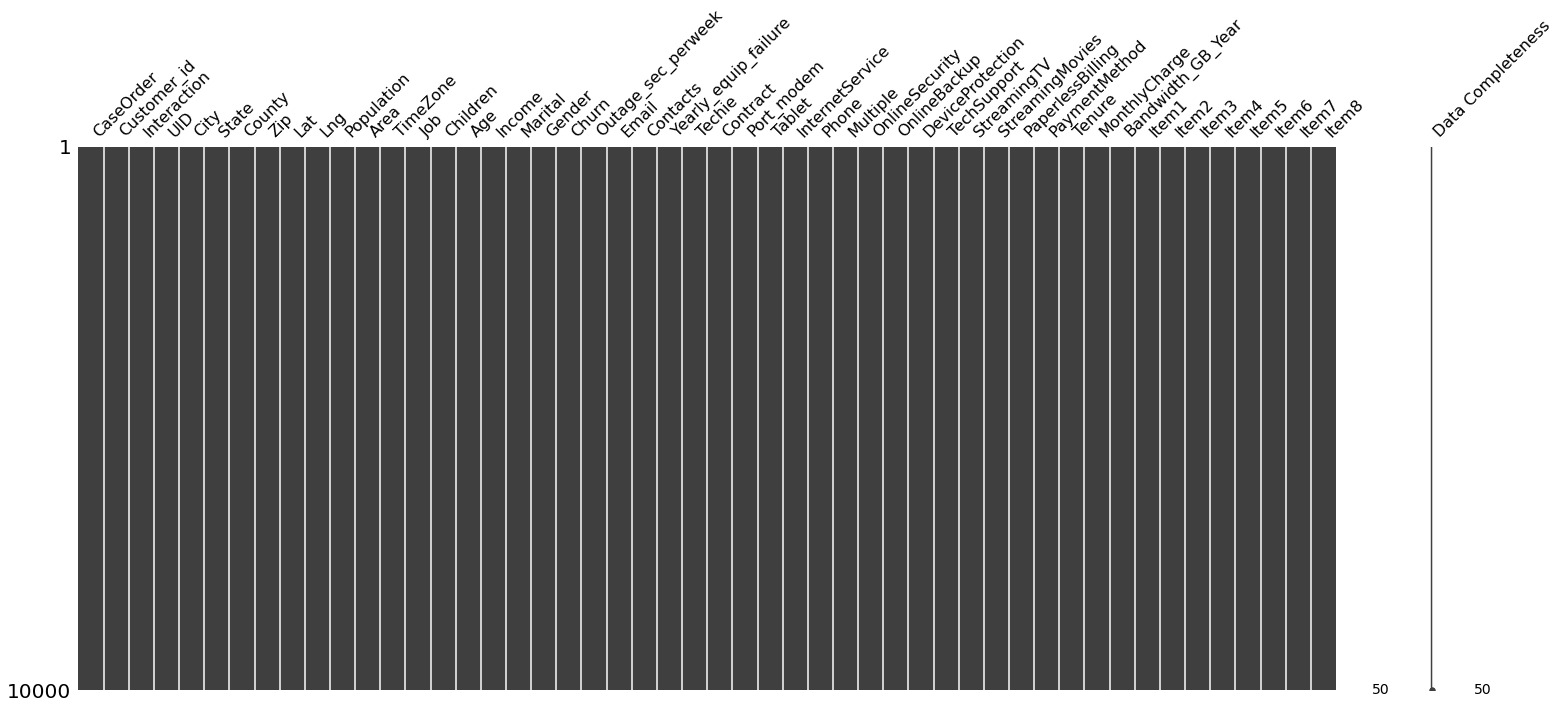

In [6]:
# Visualize df for missingness
msno.matrix(df, labels = True)
plt.show()

In [7]:
# Check for duplicates
df.duplicated().sum()

0

In [8]:
# Create a copy of df to preserve original
df1 = df.copy()

In [9]:
# Create df1 for initial model--
# Dropping columns CaseOrder, Customer_id, Interaction_UID, City,
# State, County, Zip, Lat, Lng, TimeZone, Job, and Item1 thru Item8
df1 = df1[['Population', 'Area', 'Children', 'Age', 'Income', 'Marital', 
           'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 
           'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem',
           'Tablet', 'InternetService', 'Phone', 'Multiple', 
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport', 'StreamingTV', 'StreamingMovies', 
           'PaperlessBilling', 'PaymentMethod', 'Tenure', 
           'MonthlyCharge', 'Bandwidth_GB_Year']]

In [10]:
# Check the info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            10000 non-null  int64  
 1   Area                  10000 non-null  object 
 2   Children              10000 non-null  int64  
 3   Age                   10000 non-null  int64  
 4   Income                10000 non-null  float64
 5   Marital               10000 non-null  object 
 6   Gender                10000 non-null  object 
 7   Churn                 10000 non-null  object 
 8   Outage_sec_perweek    10000 non-null  float64
 9   Email                 10000 non-null  int64  
 10  Contacts              10000 non-null  int64  
 11  Yearly_equip_failure  10000 non-null  int64  
 12  Techie                10000 non-null  object 
 13  Contract              10000 non-null  object 
 14  Port_modem            10000 non-null  object 
 15  Tablet              

In [11]:
# Checking shape for initial model--38 independent and 1 dependent
df1.shape

(10000, 38)

### Check unique values for all variables being used
### And get the statistics for each

In [12]:
# Checking variables unique values for validity
print(df1['Population'].sort_values().unique())

[     0      2      4 ... 102433 103732 111850]


In [13]:
# Check before replacement
df1['Population'].describe()

count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64

In [14]:
# Checking variables unique values for validity
print(df1['Area'].sort_values().unique())

['Rural' 'Suburban' 'Urban']


In [15]:
# Check before replacement
df1['Area'].describe()

count        10000
unique           3
top       Suburban
freq          3346
Name: Area, dtype: object

In [16]:
# Get the counts for each
df1['Area'].value_counts()

Suburban    3346
Urban       3327
Rural       3327
Name: Area, dtype: int64

In [17]:
# Checking variables unique values for validity
print(df1['Children'].sort_values().unique())

[ 0  1  2  3  4  5  6  7  8  9 10]


In [18]:
# Get statistics of the variable
df1['Children'].describe()

count    10000.0000
mean         2.0877
std          2.1472
min          0.0000
25%          0.0000
50%          1.0000
75%          3.0000
max         10.0000
Name: Children, dtype: float64

In [19]:
# Checking variables unique values for validity
print(df1['Age'].sort_values().unique())

[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]


In [20]:
# Get statistics of the variable
df1['Age'].describe()

count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [21]:
# Checking variables unique values for validity
print(df1['Income'].sort_values().unique())

[   348.67    368.5     630.24 ... 231252.   256998.4  258900.7 ]


In [22]:
# Get statistics of the variable
df1['Income'].describe()

count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64

In [23]:
# Checking variables unique values for validity
print(df1['Marital'].sort_values().unique())

['Divorced' 'Married' 'Never Married' 'Separated' 'Widowed']


In [24]:
# Get statistics of the variable
df1['Marital'].describe()

count        10000
unique           5
top       Divorced
freq          2092
Name: Marital, dtype: object

In [25]:
# Get the counts for each
df1['Marital'].value_counts()

Divorced         2092
Widowed          2027
Separated        2014
Never Married    1956
Married          1911
Name: Marital, dtype: int64

In [26]:
# Checking variables unique values for validity
print(df1['Gender'].sort_values().unique())

['Female' 'Male' 'Nonbinary']


In [27]:
# Get statistics of the variable
df1['Gender'].describe()

count      10000
unique         3
top       Female
freq        5025
Name: Gender, dtype: object

In [28]:
# Get the counts for each
df1['Gender'].value_counts()

Female       5025
Male         4744
Nonbinary     231
Name: Gender, dtype: int64

In [29]:
# Checking variables unique values for validity
print(df1['Churn'].sort_values().unique())

['No' 'Yes']


In [30]:
# Get statistics of the variable
df1['Churn'].describe()

count     10000
unique        2
top          No
freq       7350
Name: Churn, dtype: object

In [31]:
# Get the counts for each
df1['Churn'].value_counts()

No     7350
Yes    2650
Name: Churn, dtype: int64

In [32]:
# Checking variables unique values for validity
print(df1['Outage_sec_perweek'].sort_values().unique())

[ 0.09974694  0.12005772  0.2322795  ... 20.30462    20.62504
 21.20723   ]


In [33]:
# Get statistics of the variable
df1['Outage_sec_perweek'].describe()

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64

In [34]:
# Checking variables unique values for validity
print(df1['Email'].sort_values().unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [35]:
# Get statistics of the variable
df1['Email'].describe()

count    10000.000000
mean        12.016000
std          3.025898
min          1.000000
25%         10.000000
50%         12.000000
75%         14.000000
max         23.000000
Name: Email, dtype: float64

In [36]:
# Checking variables unique values for validity
print(df1['Contacts'].sort_values().unique())

[0 1 2 3 4 5 6 7]


In [37]:
# Get statistics of the variable
df1['Contacts'].describe()

count    10000.000000
mean         0.994200
std          0.988466
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Contacts, dtype: float64

In [38]:
# Checking variables unique values for validity
print(df1['Yearly_equip_failure'].sort_values().unique())

[0 1 2 3 4 6]


In [39]:
# Get statistics of the variable
df1['Yearly_equip_failure'].describe()

count    10000.000000
mean         0.398000
std          0.635953
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: Yearly_equip_failure, dtype: float64

In [40]:
# Checking variables unique values for validity
print(df1['Techie'].sort_values().unique())

['No' 'Yes']


In [41]:
# Get statistics of the variable
df1['Techie'].describe()

count     10000
unique        2
top          No
freq       8321
Name: Techie, dtype: object

In [42]:
# Get the counts for each
df1['Techie'].value_counts()

No     8321
Yes    1679
Name: Techie, dtype: int64

In [43]:
# Checking variables unique values for validity
print(df1['Contract'].sort_values().unique())

['Month-to-month' 'One year' 'Two Year']


In [44]:
# Get statistics of the variable
df1['Contract'].describe()

count              10000
unique                 3
top       Month-to-month
freq                5456
Name: Contract, dtype: object

In [45]:
# Get the counts for each
df1['Contract'].value_counts()

Month-to-month    5456
Two Year          2442
One year          2102
Name: Contract, dtype: int64

In [46]:
# Checking variables unique values for validity
print(df1['Port_modem'].sort_values().unique())

['No' 'Yes']


In [47]:
# Get statistics of the variable
df1['Port_modem'].describe()

count     10000
unique        2
top          No
freq       5166
Name: Port_modem, dtype: object

In [48]:
# Get the counts for each
df1['Port_modem'].value_counts()

No     5166
Yes    4834
Name: Port_modem, dtype: int64

In [49]:
# Checking variables unique values for validity
print(df1['Tablet'].sort_values().unique())

['No' 'Yes']


In [50]:
# Get statistics of the variable
df1['Tablet'].describe()

count     10000
unique        2
top          No
freq       7009
Name: Tablet, dtype: object

In [51]:
# Get the counts for each
df1['Tablet'].value_counts()

No     7009
Yes    2991
Name: Tablet, dtype: int64

In [52]:
# Checking variables unique values for validity
print(df1['InternetService'].sort_values().unique())

['DSL' 'Fiber Optic' 'None']


In [53]:
# Get statistics of the variable
df1['InternetService'].describe()

count           10000
unique              3
top       Fiber Optic
freq             4408
Name: InternetService, dtype: object

In [54]:
# Get the counts for each
df1['InternetService'].value_counts()

Fiber Optic    4408
DSL            3463
None           2129
Name: InternetService, dtype: int64

In [55]:
# Checking variables unique values for validity
print(df1['Phone'].sort_values().unique())

['No' 'Yes']


In [56]:
# Get statistics of the variable
df1['Phone'].describe()

count     10000
unique        2
top         Yes
freq       9067
Name: Phone, dtype: object

In [57]:
# Get the counts for each
df1['Phone'].value_counts()

Yes    9067
No      933
Name: Phone, dtype: int64

In [58]:
# Checking variables unique values for validity
print(df1['Multiple'].sort_values().unique())

['No' 'Yes']


In [59]:
# Get statistics of the variable
df1['Multiple'].describe()

count     10000
unique        2
top          No
freq       5392
Name: Multiple, dtype: object

In [60]:
# Get the counts for each
df1['Multiple'].value_counts()

No     5392
Yes    4608
Name: Multiple, dtype: int64

In [61]:
# Checking variables unique values for validity
print(df1['OnlineSecurity'].sort_values().unique())

['No' 'Yes']


In [62]:
# Get statistics of the variable
df1['OnlineSecurity'].describe()

count     10000
unique        2
top          No
freq       6424
Name: OnlineSecurity, dtype: object

In [63]:
# Get the counts for each
df1['OnlineSecurity'].value_counts()

No     6424
Yes    3576
Name: OnlineSecurity, dtype: int64

In [64]:
# Checking variables unique values for validity
print(df1['DeviceProtection'].sort_values().unique())

['No' 'Yes']


In [65]:
# Get statistics of the variable
df1['DeviceProtection'].describe()

count     10000
unique        2
top          No
freq       5614
Name: DeviceProtection, dtype: object

In [66]:
# Get the counts for each
df1['DeviceProtection'].value_counts()

No     5614
Yes    4386
Name: DeviceProtection, dtype: int64

In [67]:
# Checking variables unique values for validity
print(df1['TechSupport'].sort_values().unique())

['No' 'Yes']


In [68]:
# Get statistics of the variable
df1['TechSupport'].describe()

count     10000
unique        2
top          No
freq       6250
Name: TechSupport, dtype: object

In [69]:
# Get the counts for each
df1['TechSupport'].value_counts()

No     6250
Yes    3750
Name: TechSupport, dtype: int64

In [70]:
# Checking variables unique values for validity
print(df1['StreamingTV'].sort_values().unique())

['No' 'Yes']


In [71]:
# Get statistics of the variable
df1['StreamingTV'].describe()

count     10000
unique        2
top          No
freq       5071
Name: StreamingTV, dtype: object

In [72]:
# Get the counts for each
df1['StreamingTV'].value_counts()

No     5071
Yes    4929
Name: StreamingTV, dtype: int64

In [73]:
# Checking variables unique values for validity
print(df1['StreamingMovies'].sort_values().unique())

['No' 'Yes']


In [74]:
# Get statistics of the variable
df1['StreamingMovies'].describe()

count     10000
unique        2
top          No
freq       5110
Name: StreamingMovies, dtype: object

In [75]:
# Get the counts for each
df1['StreamingMovies'].value_counts()

No     5110
Yes    4890
Name: StreamingMovies, dtype: int64

In [76]:
# Checking variables unique values for validity
print(df1['PaperlessBilling'].sort_values().unique())

['No' 'Yes']


In [77]:
# Get statistics of the variable
df1['PaperlessBilling'].describe()

count     10000
unique        2
top         Yes
freq       5882
Name: PaperlessBilling, dtype: object

In [78]:
# Get the counts for each
df1['PaperlessBilling'].value_counts()

Yes    5882
No     4118
Name: PaperlessBilling, dtype: int64

In [79]:
# Checking variables unique values for validity
print(df1['PaymentMethod'].sort_values().unique())

['Bank Transfer(automatic)' 'Credit Card (automatic)' 'Electronic Check'
 'Mailed Check']


In [80]:
# Get statistics of the variable
df1['PaymentMethod'].describe()

count                10000
unique                   4
top       Electronic Check
freq                  3398
Name: PaymentMethod, dtype: object

In [81]:
# Get the counts for each
df1['PaymentMethod'].value_counts()

Electronic Check            3398
Mailed Check                2290
Bank Transfer(automatic)    2229
Credit Card (automatic)     2083
Name: PaymentMethod, dtype: int64

In [82]:
# Checking variables unique values for validity
print(df1['Tenure'].sort_values().unique())

[ 1.00025934  1.005104    1.0185196  ... 71.99373    71.99418
 71.99928   ]


In [83]:
# Get statistics of the variable
df1['Tenure'].describe()

count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure, dtype: float64

In [84]:
# Checking variables unique values for validity
print(df1['MonthlyCharge'].sort_values().unique())

[ 79.97886   79.978861  82.496547  82.49655   92.45514   92.455141
  92.48802   92.488023  92.5018    94.972827  94.97283   95.005709
  95.00571   95.019486  95.01949  102.4746   102.474625 104.962874
 104.9629   104.9643   104.964303 104.97808  104.9781   104.9923
 104.992311 105.010962 105.011    107.48056  107.4806   107.481989
 107.482    107.495766 107.4958   107.5286   107.528648 112.4551
 112.455141 112.484375 112.4844   114.9509   114.950905 114.965789
 114.9658   114.9728   114.972827 114.983787 114.9838   114.997564
 114.9976   115.002061 115.0021   117.439154 117.4392   117.468591
 117.4686   117.472    117.472036 117.483475 117.4835   117.4858
 117.485813 117.4872   117.487242 117.5015   117.5152   117.51525
 119.9568   119.95684  119.9897   119.989722 120.003499 120.0035
 120.0049   120.004928 124.960655 124.9607   124.9643   124.964303
 124.97808  124.9781   124.9935   124.993537 125.0073   125.007314
 127.442069 127.4421   127.4586   127.458638 127.460067 127.4601
 127.4

In [85]:
# Get statistics of the variable
df1['MonthlyCharge'].describe()

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

In [86]:
# Checking variables unique values for validity
print(df1['Bandwidth_GB_Year'].sort_values().unique())

[ 155.5067148  169.3992798  223.4765826 ... 7096.494932  7138.308718
 7158.98153  ]


In [87]:
# Get statistics of the variable
df1['Bandwidth_GB_Year'].describe()

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

In [88]:
# Checking variables unique values for validity
print(df1['Item1'].sort_values().unique())

[1 2 3 4 5 6 7]


In [89]:
# Get statistics of the variable
df1['Item1'].describe()

count    10000.000000
mean         3.490800
std          1.037797
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Item1, dtype: float64

In [90]:
# Checking variables unique values for validity
print(df1['Item2'].sort_values().unique())

[1 2 3 4 5 6 7]


In [91]:
# Get statistics of the variable
df1['Item2'].describe()

count    10000.000000
mean         3.505100
std          1.034641
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          7.000000
Name: Item2, dtype: float64

In [92]:
# Checking variables unique values for validity
print(df1['Item3'].sort_values().unique())

[1 2 3 4 5 6 7 8]


In [93]:
# Get statistics of the variable
df1['Item3'].describe()

count    10000.000000
mean         3.487000
std          1.027977
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: Item3, dtype: float64

In [94]:
# Checking variables unique values for validity
print(df1['Item4'].sort_values().unique())

[1 2 3 4 5 6 7]


In [95]:
# Get statistics of the variable
df1['Item4'].describe()

count    10000.000000
mean         3.497500
std          1.025816
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Item4, dtype: float64

In [96]:
# Checking variables unique values for validity
print(df1['Item5'].sort_values().unique())

[1 2 3 4 5 6 7]


In [97]:
# Get statistics of the variable
df1['Item5'].describe()

count    10000.000000
mean         3.492900
std          1.024819
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Item5, dtype: float64

In [98]:
# Checking variables unique values for validity
print(df1['Item6'].sort_values().unique())

[1 2 3 4 5 6 7 8]


In [99]:
# Get statistics of the variable
df1['Item6'].describe()

count    10000.000000
mean         3.497300
std          1.033586
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: Item6, dtype: float64

In [100]:
# Checking variables unique values for validity
print(df1['Item7'].sort_values().unique())

[1 2 3 4 5 6 7]


In [101]:
# Get statistics of the variable
df1['Item7'].describe()

count    10000.000000
mean         3.509500
std          1.028502
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          7.000000
Name: Item7, dtype: float64

In [102]:
# Checking variables unique values for validity
print(df1['Item8'].sort_values().unique())

[1 2 3 4 5 6 7 8]


In [103]:
# Get statistics of the variable
df1['Item8'].describe()

count    10000.000000
mean         3.495600
std          1.028633
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: Item8, dtype: float64

### Check for outliers on continuous variables using Z-scores

In [104]:
# Checking for ouliers using Z-scores--stats
df1['Z_population'] = st.zscore(df1['Population'])
df1[['Population', 'Z_population']].head()

Population  Z_population
0          38     -0.673405
1       10446      0.047772
2        3735     -0.417238
3       13863      0.284537
4       11352      0.110549

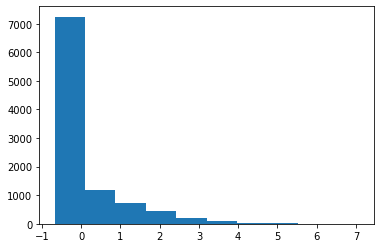

In [105]:
# Check it on the histogram...We can see we have outliers
plt.hist(df1['Z_population'])
plt.show()

In [106]:
# Check before replacement
df1['Population'].describe()

count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64

In [107]:
# Check how many instances are greater than 3 == 219 instances
df1[df1['Z_population']>3]

Population      Area  Children  Age     Income    Marital  Gender Churn  \
57         58431     Rural         1   33   15690.25    Widowed  Female    No   
90         55519     Rural         0   75   58482.90  Separated  Female   Yes   
100        55122     Urban         0   69   58077.38  Separated    Male   Yes   
157        86926     Rural         1   39   20624.31   Divorced    Male    No   
203        90517  Suburban         3   83   44223.58    Widowed  Female    No   
...          ...       ...       ...  ...        ...        ...     ...   ...   
9647       54540     Urban         0   39   29732.28  Separated  Female   Yes   
9728       54507     Urban         1   61   24614.25   Divorced  Female    No   
9905       54413  Suburban         1   30   21246.03   Divorced    Male    No   
9987       87509     Urban         3   61  102629.60    Married  Female    No   
9996       77168     Rural         4   48   34129.34   Divorced    Male    No   

      Outage_sec_perweek  Email  ...  Bandwidth_GB_Year  Item1 Item2 Item3  \
57             11.448751     11  ...         958.139706      4     5     5   
90              8.294186     13  ...         409.748666      3     3     3   
100            10.683118     12  ...        1806.135733      3     2     3   
157             6.985590      9  ...         967.981914      4     5     4   
203             7.352534     15  ...        1430.761492      2     3     1   
...                  ...    ...  ...                ...    ...   ...   ...   
9647            5.790541     11  ...        6023.656633      3     3     3   
9728            5.982889     17  ...        6016.376448      5     4     5   
9905            4.759083     15  ...        6599.191565      4     3     3   
9987            8.373844      8  ...        5135.575997      4     4     3   
9996            6.740547     15  ...        5695.951810      4     5     5   

     Item4 Item5 Item6 Item7 Item8 Z_population  
57       5     4     4     4     5     3.372680  
90       3     3     4     3     3     3.170906  
100      5     3     4     4     3     3.143397  
157      4     3     3     3     5     5.347115  
203      3     3     1     4     3     5.595937  
...    ...   ...   ...   ...   ...          ...  
9647     4     4     4     3     3     3.103070  
9728     2     5     3     4     4     3.100784  
9905     3     5     3     3     3     3.094270  
9987     5     3     3     3     3     5.387511  
9996     4     4     5     2     5     4.670977  

[219 rows x 39 columns]

In [108]:
# Check after replacement
df1['Population'].describe()

count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64

In [109]:
#Make a new df for median imputation
df_pop = df1[['Population', 'Z_population']]

In [110]:
# Check the shape
df_pop.shape

(10000, 2)

In [111]:
# Make the outliers equal to Nan
df_pop[(df_pop.Z_population > 3)] = np.nan

In [112]:
# Check before replacement
df_pop['Population'].describe()

count     9781.000000
mean      8504.807791
std      11755.975009
min          0.000000
25%        718.000000
50%       2737.000000
75%      11850.000000
max      52967.000000
Name: Population, dtype: float64

In [113]:
# Replace with median values--219
df_pop['Population'].fillna(df_pop['Population'].median(), inplace=True)

In [114]:
# Check the original
df['Population'].describe()

count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64

In [115]:
# Check stats
df_pop['Population'].describe()

count    10000.000000
mean      8378.492800
std      11657.129901
min          0.000000
25%        738.000000
50%       2737.000000
75%      11365.750000
max      52967.000000
Name: Population, dtype: float64

In [116]:
# Replace with no outliers
df1['Population'] = df_pop['Population']

In [117]:
# Check stats after median imputation
df1['Population'].describe()

count    10000.000000
mean      8378.492800
std      11657.129901
min          0.000000
25%        738.000000
50%       2737.000000
75%      11365.750000
max      52967.000000
Name: Population, dtype: float64

In [118]:
# Check df info
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            10000 non-null  float64
 1   Area                  10000 non-null  object 
 2   Children              10000 non-null  int64  
 3   Age                   10000 non-null  int64  
 4   Income                10000 non-null  float64
 5   Marital               10000 non-null  object 
 6   Gender                10000 non-null  object 
 7   Churn                 10000 non-null  object 
 8   Outage_sec_perweek    10000 non-null  float64
 9   Email                 10000 non-null  int64  
 10  Contacts              10000 non-null  int64  
 11  Yearly_equip_failure  10000 non-null  int64  
 12  Techie                10000 non-null  object 
 13  Contract              10000 non-null  object 
 14  Port_modem            10000 non-null  object 
 15  Tablet              

In [119]:
# Checking for ouliers using Z-scores--stats
df1['Z_children'] = st.zscore(df1['Children'])
df1[['Children', 'Z_children']].head()

Children  Z_children
0         0   -0.972338
1         1   -0.506592
2         4    0.890646
3         1   -0.506592
4         0   -0.972338

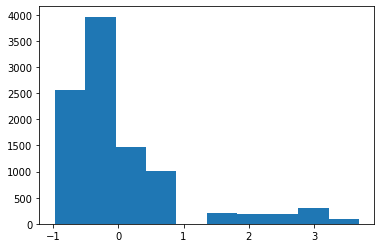

In [120]:
# Check it on the histogram...We can see we have outliers
plt.hist(df1['Z_children'])
plt.show()


In [121]:
# Check how many instances are greater than 3
df1[df1['Z_children']>3]

Population      Area  Children  Age    Income        Marital  Gender  \
30       11268.0     Urban         9   45  43383.54        Married    Male   
97         521.0  Suburban        10   23  64816.84       Divorced    Male   
144      15171.0  Suburban        10   76  35954.77        Married    Male   
329      26381.0     Urban         9   19  40902.49        Married  Female   
334       5978.0  Suburban         9   79  11179.42  Never Married  Female   
...          ...       ...       ...  ...       ...            ...     ...   
9623      2737.0     Urban        10   79  42222.25        Married  Female   
9676      3738.0     Rural         9   30  29388.05        Married    Male   
9790      1995.0     Rural        10   31  23693.22        Married    Male   
9871      1691.0     Urban        10   18  19351.19        Widowed  Female   
9901      1359.0  Suburban         9   72  77625.49        Married  Female   

     Churn  Outage_sec_perweek  Email  ...  Item1  Item2 Item3 Item4 Item5  \
30      No            6.613071     14  ...      3      2     1     5     3   
97     Yes            5.271229     14  ...      3      2     2     4     3   
144    Yes           13.715554     14  ...      4      4     3     3     2   
329    Yes            8.816498      8  ...      4      3     4     2     5   
334     No           10.494952     11  ...      3      2     2     3     4   
...    ...                 ...    ...  ...    ...    ...   ...   ...   ...   
9623    No            9.315470     14  ...      4      5     5     3     5   
9676    No            9.784614      8  ...      3      2     4     4     2   
9790    No           12.947090     13  ...      3      4     4     3     4   
9871    No            7.845888     13  ...      3      3     3     3     4   
9901   Yes            6.826295     10  ...      4      4     4     4     3   

     Item6 Item7 Item8 Z_population Z_children  
30       3     3     2     0.104728   3.219376  
97       2     3     2    -0.639937   3.685122  
144      3     4     2     0.375169   3.685122  
329      3     4     3     1.151917   3.219376  
334      4     4     5    -0.261819   3.219376  
...    ...   ...   ...          ...        ...  
9623     3     4     2     3.014794   3.685122  
9676     3     3     2    -0.417030   3.219376  
9790     4     4     2    -0.537803   3.685122  
9871     3     4     4    -0.558867   3.685122  
9901     4     3     4    -0.581872   3.219376  

[191 rows x 40 columns]

In [122]:
#Make a new df for median imputation
df_child = df1[['Children', 'Z_children']]

In [123]:
# Make the outliers equal to Nan
df_child[(df_child.Z_children > 3)] = np.nan

In [124]:
# Check before replacement
df_child['Children'].describe()

count    9809.000000
mean        1.943012
std         1.897161
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max         8.000000
Name: Children, dtype: float64

In [125]:
# Replace with median values--219
df_child['Children'].fillna(df_child['Children'].median(), inplace=True)

In [126]:
# Check stats
df_child['Children'].describe()

count    10000.000000
mean         1.925000
std          1.883383
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max          8.000000
Name: Children, dtype: float64

In [127]:
# Replace with no outliers
df1['Children'] = df_child['Children']

In [128]:
# Check stats after median imputation
df1['Children'].describe()

count    10000.000000
mean         1.925000
std          1.883383
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max          8.000000
Name: Children, dtype: float64

In [129]:
# Checking for ouliers using Z-scores--stats
df1['Z_age'] = st.zscore(df1['Age'])
df1[['Age', 'Z_age']].head()

Age     Z_age
0   68  0.720925
1   27 -1.259957
2   50 -0.148730
3   48 -0.245359
4   83  1.445638

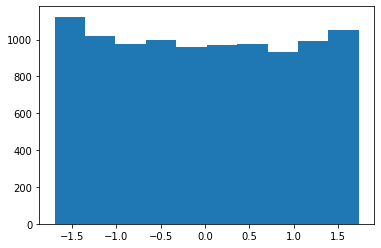

In [130]:
# Check it on the histogram--no outliers
plt.hist(df1['Z_age'])
plt.show()

In [131]:
# Checking for ouliers using Z-scores--stats
df1['Z_income'] = st.zscore(df1['Income'])
df1[['Income', 'Z_income']].head()

Income  Z_income
0  28561.99 -0.398778
1  21704.77 -0.641954
2   9609.57 -1.070885
3  18925.23 -0.740525
4  40074.19  0.009478

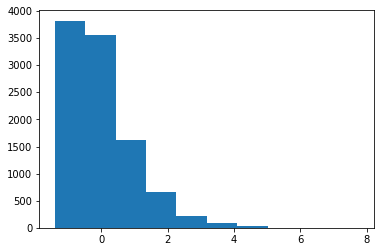

In [132]:
# Check it on the histogram
plt.hist(df1['Z_income'])
plt.show()

In [133]:
# Make a new df for median imputation
df_income = df1[['Income', 'Z_income']]

In [134]:
# Make the outliers equal to Nan
df_income[(df_income.Z_income > 3)] = np.nan

In [135]:
# Check before replacement
df_income['Income'].describe()

count      9855.000000
mean      38224.438163
std       25025.572424
min         348.670000
25%       19014.020000
50%       32738.970000
75%       52133.845000
max      124025.100000
Name: Income, dtype: float64

In [136]:
# Replace with mean values--145
df_income['Income'].fillna(df_income['Income'].mean(), inplace=True)

In [137]:
# Check the original
df['Income'].describe()

count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64

In [138]:
# Check stats
df_income['Income'].describe()

count     10000.000000
mean      38224.438163
std       24843.456231
min         348.670000
25%       19224.717500
50%       33170.605000
75%       51669.637500
max      124025.100000
Name: Income, dtype: float64

In [139]:
# Replace with no outliers
df1['Income'] = df_income['Income']

In [140]:
# Check after replacement
df1['Income'].describe()

count     10000.000000
mean      38224.438163
std       24843.456231
min         348.670000
25%       19224.717500
50%       33170.605000
75%       51669.637500
max      124025.100000
Name: Income, dtype: float64

In [141]:
# Check df info
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            10000 non-null  float64
 1   Area                  10000 non-null  object 
 2   Children              10000 non-null  float64
 3   Age                   10000 non-null  int64  
 4   Income                10000 non-null  float64
 5   Marital               10000 non-null  object 
 6   Gender                10000 non-null  object 
 7   Churn                 10000 non-null  object 
 8   Outage_sec_perweek    10000 non-null  float64
 9   Email                 10000 non-null  int64  
 10  Contacts              10000 non-null  int64  
 11  Yearly_equip_failure  10000 non-null  int64  
 12  Techie                10000 non-null  object 
 13  Contract              10000 non-null  object 
 14  Port_modem            10000 non-null  object 
 15  Tablet              

In [142]:
# Checking for ouliers using Z-scores--stats
df1['Z_outage_sec_perweek'] = st.zscore(df1['Outage_sec_perweek'])
df1[['Outage_sec_perweek', 'Z_outage_sec_perweek']].head()

Outage_sec_perweek  Z_outage_sec_perweek
0            7.978323             -0.679978
1           11.699080              0.570331
2           10.752800              0.252347
3           14.913540              1.650506
4            8.147417             -0.623156

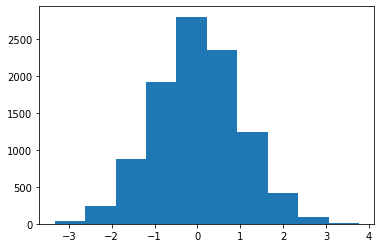

In [143]:
# Check it on the histogram
plt.hist(df1['Z_outage_sec_perweek'])
plt.show()

In [144]:
# Make a new df for median imputation
df_outage = df1[['Outage_sec_perweek', 'Z_outage_sec_perweek']]

In [145]:
# Make the outliers equal to Nan
df_outage[(df_outage.Z_outage_sec_perweek > 3)] = np.nan
df_outage[(df_outage.Z_outage_sec_perweek <- 3)] = np.nan

In [146]:
# Check before replacement
df_outage['Outage_sec_perweek'].describe()

count    9972.000000
mean        9.999789
std         2.937432
min         1.144796
25%         8.026650
50%        10.017165
75%        11.959240
max        18.851730
Name: Outage_sec_perweek, dtype: float64

In [147]:
# Replace with mean values--28
df_outage['Outage_sec_perweek'].fillna(df_outage['Outage_sec_perweek'].mean(), inplace=True)

In [148]:
# Check the original
df['Outage_sec_perweek'].describe()

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64

In [149]:
# Check stats
df_outage['Outage_sec_perweek'].describe()

count    10000.000000
mean         9.999789
std          2.933316
min          1.144796
25%          8.033911
50%         10.002880
75%         11.955480
max         18.851730
Name: Outage_sec_perweek, dtype: float64

In [150]:
# Replace with no outliers
df1['Outage_sec_perweek'] = df_outage['Outage_sec_perweek']

In [151]:
# Check after replacement
df1['Outage_sec_perweek'].describe()

count    10000.000000
mean         9.999789
std          2.933316
min          1.144796
25%          8.033911
50%         10.002880
75%         11.955480
max         18.851730
Name: Outage_sec_perweek, dtype: float64

In [152]:
# Checking for ouliers using Z-scores--stats
df1['Z_email'] = st.zscore(df1['Email'])
df1[['Email', 'Z_email']].head()

Email   Z_email
0     10 -0.666282
1     12 -0.005288
2      9 -0.996779
3     15  0.986203
4     16  1.316700

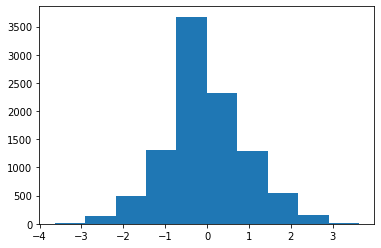

In [153]:
# Check it on the histogram
plt.hist(df1['Z_email'])
plt.show()

In [154]:
#Make a new df for median imputation
df_email = df1[['Email', 'Z_email']]

In [155]:
# Make the outliers equal to Nan
df_email[(df_email.Z_email > 3)] = np.nan
df_email[(df_email.Z_email <- 3)] = np.nan

In [156]:
# Check before replacement
df_email['Email'].describe()

count    9988.000000
mean       12.022227
std         3.006369
min         3.000000
25%        10.000000
50%        12.000000
75%        14.000000
max        21.000000
Name: Email, dtype: float64

In [157]:
# Replace with median values--219
df_email['Email'].fillna(df_email['Email'].median(), inplace=True)

In [158]:
# Check stats
df_email['Email'].describe()

count    10000.000000
mean        12.022200
std          3.004565
min          3.000000
25%         10.000000
50%         12.000000
75%         14.000000
max         21.000000
Name: Email, dtype: float64

In [159]:
# Replace with no outliers
df1['Email'] = df_email['Email']

In [160]:
# Check stats after mean imputation
df1['Email'].describe()

count    10000.000000
mean        12.022200
std          3.004565
min          3.000000
25%         10.000000
50%         12.000000
75%         14.000000
max         21.000000
Name: Email, dtype: float64

In [161]:
# Checking for ouliers using Z-scores--stats
df1['Z_contacts'] = st.zscore(df1['Contacts'])
df1[['Contacts', 'Z_contacts']].head()

Contacts  Z_contacts
0         0   -1.005852
1         0   -1.005852
2         0   -1.005852
3         2    1.017588
4         2    1.017588

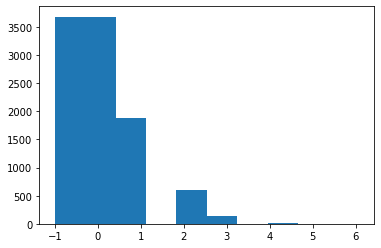

In [162]:
# Check it on the histogram
plt.hist(df1['Z_contacts'])
plt.show()

In [163]:
# Make a new df for median imputation
df_contacts = df1[['Contacts', 'Z_contacts']]

In [164]:
# Make the outliers equal to Nan
df_contacts[(df_contacts.Z_contacts > 3)] = np.nan

In [165]:
# Check before replacement
df_contacts['Contacts'].describe()

count    9835.000000
mean        0.939807
std         0.899029
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: Contacts, dtype: float64

In [166]:
# Replace with median values--165
df_contacts['Contacts'].fillna(df_contacts['Contacts'].median(), inplace=True)

In [167]:
# Check the original
df['Contacts'].describe()

count    10000.000000
mean         0.994200
std          0.988466
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Contacts, dtype: float64

In [168]:
# Check stats
df_contacts['Contacts'].describe()

count    10000.000000
mean         0.940800
std          0.891614
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: Contacts, dtype: float64

In [169]:
# Replace with no outliers
df1['Contacts'] = df_contacts['Contacts']

In [170]:
# Check after replacement
df1['Contacts'].describe()

count    10000.000000
mean         0.940800
std          0.891614
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: Contacts, dtype: float64

In [171]:
# Checking for ouliers using Z-scores--stats
df1['Z_yearly_equip_fail'] = st.zscore(df1['Yearly_equip_failure'])
df1[['Yearly_equip_failure', 'Z_yearly_equip_fail']].head()

Yearly_equip_failure  Z_yearly_equip_fail
0                     1             0.946658
1                     1             0.946658
2                     1             0.946658
3                     0            -0.625864
4                     1             0.946658

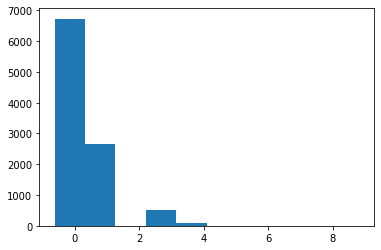

In [172]:
# Check it on the histogram
plt.hist(df1['Z_yearly_equip_fail'])
plt.show()

In [173]:
# Make a new df for median imputation
df_yearly = df1[['Yearly_equip_failure', 'Z_yearly_equip_fail']]

In [174]:
# Make the outliers equal to Nan
df_yearly[(df_yearly.Z_yearly_equip_fail > 3)] = np.nan

In [175]:
# Check before replacement
df_yearly['Yearly_equip_failure'].describe()

count    9906.00000
mean        0.37230
std         0.58008
min         0.00000
25%         0.00000
50%         0.00000
75%         1.00000
max         2.00000
Name: Yearly_equip_failure, dtype: float64

In [176]:
# Replace with median values--94
df_yearly['Yearly_equip_failure'].fillna(df_yearly['Yearly_equip_failure'].median(), inplace=True)

In [177]:
# Check the original
df['Yearly_equip_failure'].describe()

count    10000.000000
mean         0.398000
std          0.635953
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: Yearly_equip_failure, dtype: float64

In [178]:
# Check stats
df_yearly['Yearly_equip_failure'].describe()

count    10000.000000
mean         0.368800
std          0.578464
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: Yearly_equip_failure, dtype: float64

In [179]:
# Replace with no outliers
df1['Yearly_equip_failure'] = df_yearly['Yearly_equip_failure']

In [180]:
# Check after replacement
df1['Yearly_equip_failure'].describe()

count    10000.000000
mean         0.368800
std          0.578464
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: Yearly_equip_failure, dtype: float64

In [181]:
# Checking for ouliers using Z-scores--stats
df1['Z_tenure'] = st.zscore(df1['Tenure'])
df1[['Tenure', 'Z_tenure']].head()

Tenure  Z_tenure
0   6.795513 -1.048746
1   1.156681 -1.262001
2  15.754144 -0.709940
3  17.087227 -0.659524
4   1.670972 -1.242551

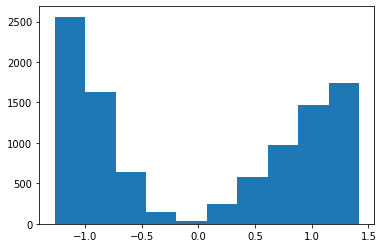

In [182]:
# Check it on the histogram
plt.hist(df1['Z_tenure'])
plt.show()

In [183]:
# Checking for ouliers using Z-scores--stats
df1['Z_monthly_charge'] = st.zscore(df1['MonthlyCharge'])
df1[['MonthlyCharge', 'Z_monthly_charge']].head()

MonthlyCharge  Z_monthly_charge
0     172.455519         -0.003943
1     242.632554          1.630326
2     159.947583         -0.295225
3     119.956840         -1.226521
4     149.948316         -0.528086

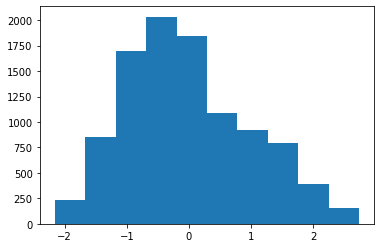

In [184]:
# Check it on the histogram
plt.hist(df1['Z_monthly_charge'])
plt.show()

In [185]:
# Checking for ouliers using Z-scores--stats
df1['Z_bandwidth_gb_year'] = st.zscore(df1['Bandwidth_GB_Year'])
df1[['Bandwidth_GB_Year', 'Z_bandwidth_gb_year']].head()

Bandwidth_GB_Year  Z_bandwidth_gb_year
0         904.536110            -1.138487
1         800.982766            -1.185876
2        2054.706961            -0.612138
3        2164.579412            -0.561857
4         271.493436            -1.428184

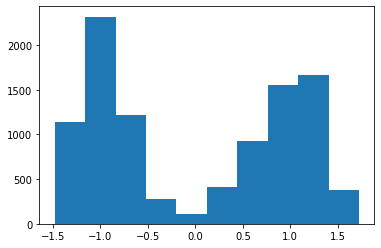

In [186]:
# Check it on the histogram
plt.hist(df1['Z_bandwidth_gb_year'])
plt.show()

In [187]:
# Checking for ouliers using Z-scores--stats
df1['Z_item1'] = st.zscore(df1['Item1'])
df1[['Item1', 'Z_item1']].head()

Item1   Z_item1
0      5  1.454307
1      3 -0.472948
2      4  0.490679
3      4  0.490679
4      4  0.490679

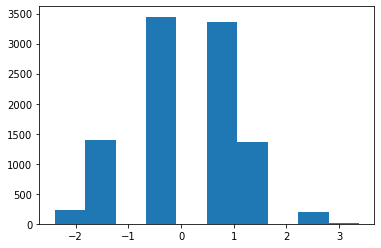

In [188]:
# Check it on the histogram
plt.hist(df1['Z_item1'])
plt.show()

In [189]:
# Check how many instances are greater than 3
df1[df1['Z_item1']>3]

Population      Area  Children  Age    Income        Marital     Gender  \
397       8303.0     Urban       1.0   73  37149.40        Married       Male   
1510      1353.0     Urban       3.0   31  34179.49        Married     Female   
2134     37122.0     Rural       4.0   31  14048.76        Married       Male   
2264      3649.0     Urban       4.0   63  39653.80       Divorced     Female   
2558       771.0     Urban       3.0   46  49535.29        Married     Female   
2740       200.0  Suburban       2.0   72  20465.98        Widowed     Female   
4483       729.0  Suburban       1.0   88  14821.76  Never Married     Female   
4751         0.0     Rural       0.0   83  19271.85        Widowed     Female   
5128      1948.0  Suburban       3.0   48  23447.42      Separated     Female   
5447      1868.0  Suburban       0.0   83  54073.62      Separated     Female   
5981       540.0     Rural       1.0   27  30943.33       Divorced     Female   
7296       979.0     Urban       2.0   41  43271.39        Married     Female   
7301     21519.0  Suburban       3.0   23  36537.40      Separated     Female   
7487      1285.0     Rural       2.0   84   9273.52        Widowed  Nonbinary   
8205     43208.0  Suburban       0.0   54  53517.26       Divorced     Female   
8905       357.0     Rural       2.0   39  43029.53  Never Married       Male   
9070     20338.0  Suburban       1.0   79  40909.60       Divorced     Female   
9322       782.0     Rural       0.0   37   4242.16      Separated       Male   
9730       324.0  Suburban       3.0   49  57050.83  Never Married     Female   

     Churn  Outage_sec_perweek  Email  ...     Z_age  Z_income  \
397     No           10.481232   17.0  ...  0.962496 -0.094244   
1510    No            8.925221   14.0  ... -1.066700 -0.199565   
2134   Yes            6.210987   13.0  ... -1.066700 -0.913459   
2264    No            6.966168   17.0  ...  0.479354 -0.005430   
2558   Yes           13.563550   18.0  ... -0.341987  0.344996   
2740   Yes           10.108860   10.0  ...  0.914182 -0.685885   
4483    No           11.142080   13.0  ...  1.687209 -0.886046   
4751   Yes           12.225140   15.0  ...  1.445638 -0.728233   
5128    No            6.719404   13.0  ... -0.245359 -0.580155   
5447    No           11.160390   11.0  ...  1.445638  0.505938   
5981    No           16.939200   17.0  ... -1.259957 -0.314329   
7296    No            6.444829   11.0  ... -0.583558  0.122860   
7301    No            9.270473   10.0  ... -1.453214 -0.115947   
7487    No            8.497383   16.0  ...  1.493953 -1.082802   
8205    No            5.083439   12.0  ...  0.044526  0.486208   
8905    No           14.224770   11.0  ... -0.680187  0.114283   
9070    No           13.036660   14.0  ...  1.252381  0.039104   
9322    No           10.316480   14.0  ... -0.776815 -1.261229   
9730    No            9.601905   11.0  ... -0.197045  0.611518   

     Z_outage_sec_perweek   Z_email Z_contacts Z_yearly_equip_fail  Z_tenure  \
397              0.161090  1.647197  -1.005852           -0.625864 -0.935217   
1510            -0.361786  0.655706   0.005868           -0.625864 -0.570760   
2134            -1.273866  0.325209   0.005868            0.946658 -0.941278   
2264            -1.020098  1.647197   0.005868           -0.625864 -1.127250   
2558             1.196861  1.977694  -1.005852           -0.625864 -1.044573   
2740             0.035960 -0.666282   0.005868            0.946658 -0.993445   
4483             0.383159  0.325209   2.029307           -0.625864 -1.028670   
4751             0.747106  0.986203  -1.005852           -0.625864 -1.086688   
5128            -1.103020  0.325209   0.005868           -0.625864  1.361339   
5447             0.389312 -0.335785   0.005868           -0.625864  1.014070   
5981             2.331201  1.647197   0.005868           -0.625864  0.884572   
7296            -1.195287 -0.335785   0.005868           -0.625864  0.945931   
7301            -0.24576

In [190]:
#Make a new df for imputation
df_i1 = df1[['Item1', 'Z_item1']]

In [191]:
# Make the outliers equal to Nan
df_i1[(df_i1.Z_item1 > 3)] = np.nan

In [192]:
# Check before replacement
df_i1['Item1'].describe()

count    9981.000000
mean        3.484120
std         1.027416
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: Item1, dtype: float64

In [193]:
# Replace with values
df_i1['Item1'].fillna(df_i1['Item1'].median(), inplace=True)

In [194]:
# Check stats
df_i1['Item1'].describe()

count    10000.000000
mean         3.483200
std          1.026656
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: Item1, dtype: float64

In [195]:
# Replace with no outliers
df1['Item1'] = df_i1['Item1']

In [196]:
# Check stats after median imputation
df1['Item1'].describe()

count    10000.000000
mean         3.483200
std          1.026656
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: Item1, dtype: float64

In [197]:
# Checking for ouliers using Z-scores--stats
df1['Z_item2'] = st.zscore(df1['Item2'])
df1[['Item2', 'Z_item2']].head()

Item2   Z_item2
0      5  1.444922
1      4  0.478354
2      4  0.478354
3      4  0.478354
4      4  0.478354

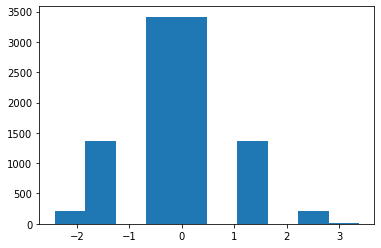

In [198]:
# Check it on the histogram
plt.hist(df1['Z_item2'])
plt.show()

In [199]:
# Check how many instances are greater than 3
df1[df1['Z_item2']>3]

Population      Area  Children  Age     Income        Marital  \
2356      1090.0  Suburban       4.0   49   64697.57      Separated   
2558       771.0     Urban       3.0   46   49535.29        Married   
2743     16350.0  Suburban       1.0   24   24700.60        Married   
5965     11174.0  Suburban       1.0   22   32064.16       Divorced   
6615      2353.0  Suburban       1.0   43   37634.23        Married   
7055      2285.0  Suburban       0.0   88   44678.29        Married   
7167      5553.0     Urban       8.0   26   58434.60        Widowed   
7296       979.0     Urban       2.0   41   43271.39        Married   
7564     19237.0     Rural       0.0   55   66342.21        Married   
8011       365.0     Urban       0.0   80   44608.56       Divorced   
8117       635.0     Rural       6.0   61   68395.96        Married   
8244      5115.0     Rural       3.0   45   12616.30  Never Married   
8829      1920.0  Suburban       1.0   54  110343.80      Separated   

         Gender Churn  Outage_sec_perweek  Email  ...  Z_income  \
2356     Female    No            9.326198   15.0  ...  0.882694   
2558     Female   Yes           13.563550   18.0  ...  0.344996   
2743  Nonbinary    No            6.162241   12.0  ... -0.535714   
5965       Male    No            2.920273    8.0  ... -0.274581   
6615     Female    No           10.117650   16.0  ... -0.077050   
7055     Female    No            7.228880   10.0  ...  0.172753   
7167     Female    No            6.928805   10.0  ...  0.660591   
7296     Female    No            6.444829   11.0  ...  0.122860   
7564       Male    No           10.543470   10.0  ...  0.941017   
8011       Male   Yes           17.034410   15.0  ...  0.170280   
8117       Male    No           13.886530   19.0  ...  1.013849   
8244     Female    No           10.203160   13.0  ... -0.964258   
8829       Male    No           11.280430   17.0  ...  2.501440   

      Z_outage_sec_perweek   Z_email Z_contacts Z_yearly_equip_fail  Z_tenure  \
2356             -0.227043  0.986203   0.005868           -0.625864 -0.990800   
2558              1.196861  1.977694  -1.005852           -0.625864 -1.044573   
2743             -1.290247 -0.005288  -1.005852           -0.625864 -0.857938   
5965             -2.379665 -1.327276   0.005868            2.519179  1.216552   
6615              0.038914  1.316700  -1.005852           -0.625864  0.328386   
7055             -0.931818 -0.666282  -1.005852            0.946658  0.753322   
7167             -1.032654 -0.666282   0.005868           -0.625864  1.113440   
7296             -1.195287 -0.335785   0.005868           -0.625864  0.945931   
7564              0.182005 -0.666282  -1.005852           -0.625864  1.212966   
8011              2.363195  0.986203   0.005868           -0.625864  1.189548   
8117              1.305393  2.308190   0.005868           -0.625864  1.138383   
8244              0.067648  0.325209  -1.005852           -0.625864  1.375522   
8829              0.429650  1.647197   1.017588           -0.625864  0.923845   

     Z_monthly_charge Z_bandwidth_gb_year   Z_item1   Z_item2  
2356        -1.109228           -1.149427  1.454307  3.378057  
2558         0.637279           -0.817101  3.381562  3.378057  
2743        -0.469454           -0.949228  2.417934  3.378057  
5965         2.445835            1.382585  2.417934  3.378057  
6615        -0.120361            0.166298  2.417934  3.378057  
7055         1.044672            0.652464  2.417934  3.378057  
7167        -0.992754            1.123403  2.417934  3.378057  
7296         1.164145            1.163214  3.381562  3.378057  
7564        -0.760575            1.274236  2.417934  3.378057  
8011         0.641355            1.146325  2.417934  3.378057  
8117        -0.236861            1.272165  1.454307  3.378057  
8244         2.387204            1.477921  2.417934  3.378057  
8829        -1.866209            0.703878  1.454307  3.378057  

[13 rows x 51 columns]

In [200]:
# Make a new df for imputation
df_i2 = df1[['Item2', 'Z_item2']]

In [201]:
# Make the outliers equal to Nan
df_i2[(df_i2.Z_item2 > 3)] = np.nan

In [202]:
# Check before replacement
df_i2['Item2'].describe()

count    9987.000000
mean        3.500551
std         1.027596
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: Item2, dtype: float64

In [203]:
# Replace with values
df_i2['Item2'].fillna(df_i2['Item2'].median(), inplace=True)

In [204]:
# Replace with no outliers
df1['Item2'] = df_i2['Item2']

In [205]:
# Check stats after median imputation
df1['Item2'].describe()

count    10000.000000
mean         3.501200
std          1.027085
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          6.000000
Name: Item2, dtype: float64

In [206]:
# Check stats
df_i2['Item2'].describe()

count    10000.000000
mean         3.501200
std          1.027085
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          6.000000
Name: Item2, dtype: float64

In [207]:
# Checking for ouliers using Z-scores--stats
df1['Z_item3'] = st.zscore(df1['Item3'])
df1[['Item3', 'Z_item3']].head()

Item3   Z_item3
0      5  1.471896
1      3 -0.473770
2      2 -1.446603
3      4  0.499063
4      4  0.499063

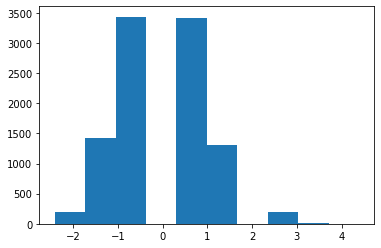

In [208]:
# Check it on the histogram
plt.hist(df1['Z_item3'])
plt.show()

In [209]:
# Check how many instances are greater than 3
df1[df1['Z_item3']>3]

Population      Area  Children  Age    Income        Marital     Gender  \
944       1655.0     Rural       2.0   54  17773.11      Separated     Female   
1813       201.0  Suburban       0.0   25  21795.90        Married       Male   
2743     16350.0  Suburban       1.0   24  24700.60        Married  Nonbinary   
3578     39090.0     Rural       2.0   43  15584.37        Married       Male   
4137      1264.0  Suburban       3.0   24  28683.49        Widowed       Male   
5134       923.0  Suburban       2.0   84  24149.71  Never Married     Female   
5527       467.0     Urban       0.0   87  34209.19  Never Married       Male   
7296       979.0     Urban       2.0   41  43271.39        Married     Female   
8244      5115.0     Rural       3.0   45  12616.30  Never Married     Female   
8764     11195.0     Rural       1.0   44  12558.05  Never Married       Male   
8997      1991.0     Urban       0.0   83  33855.49  Never Married       Male   
9070     20338.0  Suburban       1.0   79  40909.60       Divorced     Female   
9764      4495.0     Rural       1.0   71  13467.60       Divorced       Male   

     Churn  Outage_sec_perweek  Email  ...  Z_outage_sec_perweek   Z_email  \
944    Yes            9.846700   12.0  ...             -0.052135 -0.005288   
1813    No            7.456656   10.0  ...             -0.855277 -0.666282   
2743    No            6.162241   12.0  ...             -1.290247 -0.005288   
3578   Yes           10.729760   15.0  ...              0.244605  0.986203   
4137    No           10.350520   12.0  ...              0.117166 -0.005288   
5134    No            8.245283   13.0  ...             -0.590269  0.325209   
5527    No            6.413823   14.0  ...             -1.205706  0.655706   
7296    No            6.444829   11.0  ...             -1.195287 -0.335785   
8244    No           10.203160   13.0  ...              0.067648  0.325209   
8764    No            9.257433   17.0  ...             -0.250150  1.647197   
8997    No           14.247100   12.0  ...              1.426558 -0.005288   
9070    No           13.036660   14.0  ...              1.019806  0.655706   
9764    No           14.470010   11.0  ...              1.501464 -0.335785   

     Z_contacts Z_yearly_equip_fail  Z_tenure Z_monthly_charge  \
944   -1.005852           -0.625864 -0.926283         0.872834   
1813   0.005868            0.946658 -0.825224         1.107025   
2743  -1.005852           -0.625864 -0.857938        -0.469454   
3578   2.029307           -0.625864 -0.986420         1.106023   
4137  -1.005852           -0.625864 -0.925375        -0.644236   
5134   0.005868           -0.625864  1.338296        -0.003175   
5527   0.005868           -0.625864  1.177001        -0.644236   
7296   0.005868           -0.625864  0.945931         1.164145   
8244  -1.005852           -0.625864  1.375522         2.387204   
8764  -1.005852            0.946658  0.608744         1.106345   
8997  -1.005852           -0.625864  1.408393         0.346054   
9070   1.017588           -0.625864  1.401427        -1.284467   
9764  -1.005852           -0.625864  0.442992        -0.818361   

     Z_bandwidth_gb_year   Z_item1   Z_item2   Z_item3  
944            -0.714542  1.454307  1.444922  3.417563  
1813           -0.737822  2.417934  1.444922  3.417563  
2743           -0.949228  2.417934  3.378057  3.417563  
3578           -0.966390  1.454307  2.411489  3.417563  
4137           -1.025460  2.417934  1.444922  3.417563  
5134            1.350350  0.490679  1.444922  3.417563  
5527            0.922226  2.417934  1.444922  3.417563  
7296            1.163214  3.381562  3.378057  4.390396  
8244            1.477921  2.417934  3.378057  3.417563  
8764            0.636590  2.417934  2.411489  3.417563  
8997            1.316581  2.417934  1.444922  3.417563  
9070            1.366903  3.381562  2.411489  3.417563  
9764            0.460752  1.454307  1.444922  3.417563  

[13 rows x 52 columns]

In [210]:
# Make a new df for imputation
df_i3 = df1[['Item3', 'Z_item3']]

In [211]:
# Make the outliers equal to Nan
df_i3[(df_i3.Z_item3 > 3)] = np.nan

In [212]:
# Check before replacement
df_i3['Item3'].describe()

count    9987.000000
mean        3.482327
std         1.020402
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: Item3, dtype: float64

In [213]:
# Replace with values
df_i3['Item3'].fillna(df_i3['Item3'].median(), inplace=True)

In [214]:
# Check stats
df_i3['Item3'].describe()

count    10000.000000
mean         3.481700
std          1.019887
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: Item3, dtype: float64

In [215]:
# Replace with no outliers
df1['Item3'] = df_i3['Item3']

In [216]:
# Check stats after median imputation
df1['Item3'].describe()

count    10000.000000
mean         3.481700
std          1.019887
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: Item3, dtype: float64

In [217]:
# Checking for ouliers using Z-scores--stats
df1['Z_item4'] = st.zscore(df1['Item4'])
df1[['Item4', 'Z_item4']].head()

Item4   Z_item4
0      3 -0.485004
1      3 -0.485004
2      4  0.489878
3      2 -1.459886
4      3 -0.485004

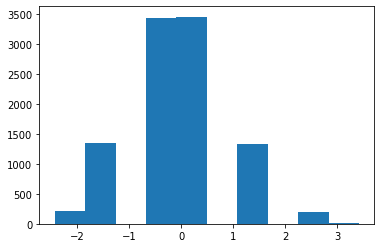

In [218]:
# Check it on the histogram
plt.hist(df1['Z_item4'])
plt.show()

In [219]:
# Check how many instances are greater than 3
df1[df1['Z_item4']>3]

Population      Area  Children  Age    Income        Marital     Gender  \
10         555.0     Urban       7.0   23  22580.70      Separated     Female   
533        722.0     Urban       0.0   44  24202.12       Divorced  Nonbinary   
559      26448.0     Urban       0.0   88  33165.90  Never Married       Male   
2284      8854.0     Rural       0.0   60  20029.65       Divorced     Female   
3225      2656.0     Urban       1.0   71  12457.30        Widowed     Female   
3658      4654.0  Suburban       1.0   63  17570.65        Widowed     Female   
5757      2086.0     Urban       0.0   24  21531.39      Separated       Male   
5866      4852.0     Rural       0.0   54  38613.42       Divorced       Male   
9069        18.0  Suburban       0.0   33  42921.65        Married       Male   

     Churn  Outage_sec_perweek  Email  ...   Z_email  Z_contacts  \
10      No            9.341632    9.0  ... -0.996779   -1.005852   
533     No           10.360036   14.0  ...  0.655706   -1.005852   
559     No           10.918580   14.0  ...  0.655706    1.017588   
2284    No           10.385330   12.0  ... -0.005288    0.005868   
3225    No           10.563620   12.0  ... -0.005288    0.005868   
3658   Yes           11.753050   10.0  ... -0.666282   -1.005852   
5757    No            8.289386   15.0  ...  0.986203    0.005868   
5866    No           12.628450    7.0  ... -1.657773    0.005868   
9069    No           10.463630   13.0  ...  0.325209   -1.005852   

     Z_yearly_equip_fail  Z_tenure Z_monthly_charge Z_bandwidth_gb_year  \
10              2.519179 -0.577077         0.054337           -0.303669   
533            -0.625864 -0.969968         0.579159           -1.032509   
559             0.946658 -1.078330         1.044350           -1.162922   
2284           -0.625864 -0.619784        -0.003782           -0.732381   
3225           -0.625864 -1.082531        -0.295141           -1.275502   
3658           -0.625864 -1.216736        -0.061294           -1.397744   
5757           -0.625864  1.040796        -1.343098            1.081017   
5866            0.946658  0.787607         0.171272            0.667639   
9069           -0.625864  1.190640         1.863326            1.248874   

       Z_item1   Z_item2   Z_item3   Z_item4  
10    0.490679  0.478354  0.499063  3.414525  
533  -1.436576 -0.488213 -0.473770  3.414525  
559   1.454307  1.444922 -0.473770  3.414525  
2284  0.490679 -0.488213 -0.473770  3.414525  
3225 -1.436576  0.478354 -1.446603  3.414525  
3658  1.454307  1.444922  1.471896  3.414525  
5757 -1.436576 -1.454781 -2.419436  3.414525  
5866 -1.436576 -0.488213 -0.473770  3.414525  
9069 -0.472948 -0.488213 -0.473770  3.414525  

[9 rows x 53 columns]

In [220]:
# Make a new df for imputation
df_i4 = df1[['Item4', 'Z_item4']]

In [221]:
# Make the outliers equal to Nan
df_i4[(df_i4.Z_item4 > 3)] = np.nan

In [222]:
# Check before replacement
df_i4['Item4'].describe()

count    9991.000000
mean        3.494345
std         1.020875
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: Item4, dtype: float64

In [223]:
# Replace with values
df_i4['Item4'].fillna(df_i4['Item4'].median(), inplace=True)

In [224]:
# Check stats
df_i4['Item4'].describe()

count    10000.000000
mean         3.493900
std          1.020523
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: Item4, dtype: float64

In [225]:
# Replace with no outliers
df1['Item4'] = df_i4['Item4']

In [226]:
# Check stats after median imputation
df1['Item4'].describe()

count    10000.000000
mean         3.493900
std          1.020523
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: Item4, dtype: float64

In [227]:
# Checking for ouliers using Z-scores--stats
df1['Z_item5'] = st.zscore(df1['Item5'])
df1[['Item5', 'Z_item5']].head()

Item5   Z_item5
0      4  0.494844
1      4  0.494844
2      4  0.494844
3      5  1.470674
4      4  0.494844

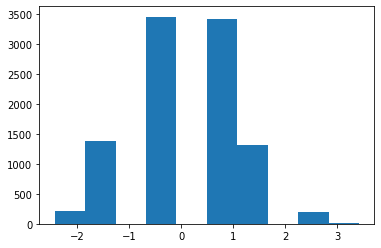

In [228]:
# Check it on the histogram
plt.hist(df1['Z_item5'])
plt.show()

In [229]:
# Check how many instances are greater than 3
df1[df1['Z_item5']>3]

Population      Area  Children  Age    Income        Marital     Gender  \
137       1135.0     Urban       1.0   89  31600.92        Widowed       Male   
170        902.0  Suburban       0.0   53  32653.51        Married       Male   
295      12478.0     Urban       2.0   48  42469.81  Never Married  Nonbinary   
778       1363.0     Urban       2.0   87  18455.86  Never Married     Female   
2197       138.0     Urban       3.0   19  44080.00        Married     Female   
2445     29903.0     Rural       1.0   29  50968.30  Never Married     Female   
2622      1034.0  Suburban       3.0   40  21334.55        Widowed       Male   
6258       266.0  Suburban       6.0   38  21714.62  Never Married     Female   
6684       206.0     Urban       1.0   36  44501.99        Widowed       Male   
8375       360.0     Urban       8.0   46  17847.64       Divorced       Male   
8588      1068.0  Suburban       0.0   23  41709.72      Separated       Male   
8769       158.0  Suburban       1.0   78  17583.94      Separated     Female   

     Churn  Outage_sec_perweek  Email  ...  Z_contacts  Z_yearly_equip_fail  \
137     No            4.978546   12.0  ...    1.017588            -0.625864   
170    Yes            4.372035    7.0  ...    0.005868            -0.625864   
295     No           11.870421   14.0  ...    0.005868            -0.625864   
778     No           10.857988   14.0  ...    0.005868            -0.625864   
2197    No           16.892850    7.0  ...    0.005868            -0.625864   
2445    No           10.391030    7.0  ...   -1.005852            -0.625864   
2622    No            8.568261   16.0  ...    0.005868            -0.625864   
6258    No           16.237380    8.0  ...    3.041027            -0.625864   
6684    No            9.056021    8.0  ...    1.017588             0.946658   
8375    No           12.497170   13.0  ...    0.005868             2.519179   
8588    No           15.030230    7.0  ...    0.005868            -0.625864   
8769    No           14.387030    9.0  ...    1.017588             2.519179   

      Z_tenure Z_monthly_charge Z_bandwidth_gb_year   Z_item1   Z_item2  \
137  -1.031505         0.578649           -0.909720  0.490679  2.411489   
170  -0.719417        -0.177908           -0.570938 -0.472948 -0.488213   
295  -0.998109        -0.293974           -1.113701  0.490679  0.478354   
778  -1.060258        -0.992755           -1.207838 -0.472948 -1.454781   
2197 -1.124253        -1.051440           -1.210673 -0.472948  0.478354   
2445 -1.243264         0.170531           -1.340902 -0.472948 -0.488213   
2622 -0.985269        -0.235827           -0.999383  0.490679  0.478354   
6258  1.242362        -1.575664            1.265699  1.454307  1.444922   
6684  0.935807         0.520794            0.920148  0.490679 -0.488213   
8375  1.323898        -0.644236            1.242092  2.417934  1.444922   
8588  1.375968         1.863326            1.447629  0.490679  0.478354   
8769  1.384582         0.579160            1.282943  0.490679 -0.488213   

       Z_item3   Z_item4   Z_item5  
137   2.444730 -2.434768  3.422335  
170  -0.473770 -1.459886  3.422335  
295   0.499063 -2.434768  3.422335  
778  -0.473770 -1.459886  3.422335  
2197 -0.473770 -2.434768  3.422335  
2445 -0.473770 -1.459886  3.422335  
2622  1.471896 -0.485004  3.422335  
6258  0.499063 -1.459886  3.422335  
6684 -0.473770 -1.459886  3.422335  
8375  0.499063 -1.459886  3.422335  
8588 -0.473770 -1.459886  3.422335  
8769  0.499063 -1.459886  3.422335  

[12 rows x 54 columns]

In [230]:
# Make a new df for imputation
df_i5 = df1[['Item5', 'Z_item5']]

In [231]:
# Make the outliers equal to Nan
df_i5[(df_i5.Z_item5 > 3)] = np.nan

In [232]:
# Check before replacement
df_i5['Item5'].describe()

count    9988.000000
mean        3.488686
std         1.018194
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: Item5, dtype: float64

In [233]:
# Replace with values
df_i5['Item5'].fillna(df_i5['Item5'].median(), inplace=True)

In [234]:
# Check stats
df_i5['Item5'].describe()

count    10000.000000
mean         3.488100
std          1.017724
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: Item5, dtype: float64

In [235]:
# Replace with no outliers
df1['Item5'] = df_i5['Item5']

In [236]:
# Check stats after median imputation
df1['Item5'].describe()

count    10000.000000
mean         3.488100
std          1.017724
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: Item5, dtype: float64

In [237]:
# Checking for ouliers using Z-scores--stats
df1['Z_item6'] = st.zscore(df1['Item6'])
df1[['Item6', 'Z_item6']].head()

Item6   Z_item6
0      4  0.486389
1      3 -0.481165
2      3 -0.481165
3      4  0.486389
4      4  0.486389

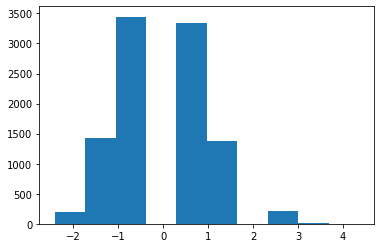

In [238]:
# Check it on the histogram
plt.hist(df1['Z_item6'])
plt.show()

In [239]:
# Check how many instances are greater than 3
df1[df1['Z_item6']>3]

Population      Area  Children  Age    Income        Marital  Gender  \
70       20269.0     Urban       4.0   60  42784.82        Married  Female   
1415      3431.0  Suburban       3.0   49  46183.90        Married  Female   
2273      2759.0     Urban       8.0   81  50836.65      Separated    Male   
2508     12407.0     Rural       1.0   77  62989.06        Married  Female   
4913      2231.0     Rural       3.0   69  87277.75        Widowed  Female   
5833     14429.0     Urban       5.0   43  32669.61        Widowed    Male   
6211        85.0  Suburban       0.0   31  28218.54       Divorced  Female   
6797      5633.0     Rural       4.0   80  19171.71        Widowed    Male   
7017     13168.0  Suburban       1.0   80  49761.98  Never Married    Male   
7428     52802.0     Rural       0.0   59  50956.85        Widowed  Female   
7815      4395.0     Urban       0.0   70  37394.14        Married  Female   
8244      5115.0     Rural       3.0   45  12616.30  Never Married  Female   
8764     11195.0     Rural       1.0   44  12558.05  Never Married    Male   

     Churn  Outage_sec_perweek  Email  ...  Z_yearly_equip_fail  Z_tenure  \
70     Yes            6.129509   12.0  ...            -0.625864 -0.401065   
1415    No            6.399634   14.0  ...             2.519179 -1.166244   
2273   Yes            8.740627   17.0  ...             4.091701 -0.704831   
2508    No            2.094319    9.0  ...            -0.625864 -0.267376   
4913   Yes           13.353510   10.0  ...            -0.625864 -1.143050   
5833    No            4.866722   13.0  ...            -0.625864  1.289861   
6211    No            7.784659   12.0  ...             0.946658  1.113893   
6797    No            5.713769   15.0  ...            -0.625864  0.951057   
7017    No            7.917411   11.0  ...            -0.625864  0.968106   
7428    No            6.436661   14.0  ...             0.946658  1.113038   
7815    No            6.744374   10.0  ...            -0.625864  1.234461   
8244    No           10.203160   13.0  ...            -0.625864  1.375522   
8764    No            9.257433   17.0  ...             0.946658  0.608744   

     Z_monthly_charge Z_bandwidth_gb_year   Z_item1   Z_item2   Z_item3  \
70           0.932231           -0.327456  1.454307  1.444922  2.444730   
1415        -0.295140           -1.297319  1.454307  0.478354 -0.473770   
2273         1.571695           -0.628738  2.417934  1.444922  2.444730   
2508        -0.237019           -0.244053  0.490679  1.444922 -0.473770   
4913         0.055457           -1.038858  2.417934  2.411489  2.444730   
5833        -1.343098            1.369894  2.417934  0.478354  0.499063   
6211         0.407587            1.305999  2.417934  0.478354  0.499063   
6797        -1.284467            0.998788  1.454307  1.444922  0.499063   
7017        -1.109587            0.745739  1.454307  0.478354  0.499063   
7428         0.462581            0.947119  1.454307  0.478354  0.499063   
7815        -0.236698            1.278398  2.417934  1.444922  2.444730   
8244         2.387204            1.477921  2.417934  3.378057  3.417563   
8764         1.106345            0.636590  2.417934  2.411489  3.417563   

       Z_item4   Z_item5   Z_item6  
70    1.464761 -0.480987  3.389051  
1415  1.464761 -1.456817  4.356605  
2273  0.489878  0.494844  3.389051  
2508  1.464761 -0.480987  3.389051  
4913  2.439643 -0.480987  3.389051  
5833  0.489878 -0.480987  3.389051  
6211  1.464761 -1.456817  3.389051  
6797  0.489878 -1.456817  3.389051  
7017  2.439643 -2.432648  3.389051  
7428 -0.485004 -1.456817  3.389051  
7815  0.489878 -2.432648  3.389051  
8244  0.489878  1.470674  3.389051  
8764  0.489878  0.494844  3.389051  

[13 rows x 55 columns]

In [240]:
# Make a new df for imputation
df_i6 = df1[['Item6', 'Z_item6']]

In [241]:
# Make the outliers equal to Nan
df_i6[(df_i6.Z_item6 > 3)] = np.nan

In [242]:
# Check before replacement
df_i6['Item6'].describe()

count    9987.000000
mean        3.492640
std         1.026107
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: Item6, dtype: float64

In [243]:
# Replace with values
df_i6['Item6'].fillna(df_i6['Item6'].median(), inplace=True)

In [244]:
# Check stats
df_i6['Item6'].describe()

count    10000.000000
mean         3.492000
std          1.025593
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: Item6, dtype: float64

In [245]:
# Replace with no outliers
df1['Item6'] = df_i6['Item6']

In [246]:
# Check stats after median imputation
df1['Item6'].describe()

count    10000.000000
mean         3.492000
std          1.025593
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: Item6, dtype: float64

In [247]:
# Checking for ouliers using Z-scores--stats
df1['Z_item7'] = st.zscore(df1['Item7'])
df1[['Item7', 'Z_item7']].head()

Item7   Z_item7
0      3 -0.495406
1      4  0.476931
2      3 -0.495406
3      3 -0.495406
4      4  0.476931

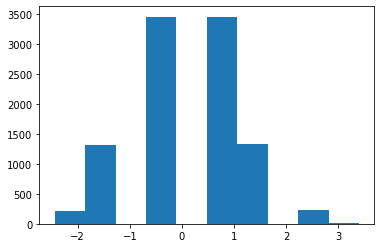

In [248]:
# Check it on the histogram
plt.hist(df1['Z_item7'])
plt.show()

In [249]:
# Check how many instances are greater than 3
df1[df1['Z_item7']>3]

Population      Area  Children  Age    Income        Marital  Gender  \
67       13547.0     Urban       1.0   78  22365.28        Widowed    Male   
1615      1052.0  Suburban       1.0   25  63134.48        Married    Male   
1675       637.0     Urban       2.0   72  31203.12  Never Married  Female   
2835      1132.0     Rural       4.0   65   9612.82       Divorced  Female   
2952      2737.0  Suburban       3.0   87  15469.00        Married    Male   
3331       253.0     Rural       2.0   43  28284.38        Married    Male   
5170       209.0     Rural       5.0   51  52233.68       Divorced  Female   
6032       197.0  Suburban       8.0   68  27289.75  Never Married  Female   
6921       101.0     Rural       0.0   74  58425.91       Divorced    Male   
7408       330.0  Suburban       0.0   49  12958.74        Widowed  Female   
9898     39065.0     Rural       0.0   68  46803.94       Divorced    Male   

     Churn  Outage_sec_perweek  Email  ...  Z_tenure  Z_monthly_charge  \
67     Yes           10.803937   19.0  ... -0.897668          0.814713   
1615    No           12.735175   15.0  ... -1.028270         -0.819397   
1675   Yes           13.229049    7.0  ... -0.988150          2.387203   
2835    No            9.329583    7.0  ... -0.830148         -1.109587   
2952    No            9.593637    5.0  ... -1.055688          0.520473   
3331    No           17.513120   17.0  ... -0.428909         -0.003594   
5170    No            7.356317   11.0  ...  1.103620         -1.226522   
6032    No            5.796239   12.0  ...  1.301179         -0.178334   
6921    No           10.921950   10.0  ...  1.022135          0.229217   
7408    No            2.783453   12.0  ...  0.768416         -0.003782   
9898    No           11.662170    8.0  ...  0.916877          1.630222   

     Z_bandwidth_gb_year   Z_item1   Z_item2   Z_item3   Z_item4   Z_item5  \
67             -0.946974  0.490679  0.478354 -0.473770  2.439643 -1.456817   
1615           -1.116596  2.417934  2.411489  1.471896 -0.485004 -0.480987   
1675           -0.920224  2.417934  2.411489  2.444730  0.489878 -1.456817   
2835           -1.010090 -0.472948  0.478354 -0.473770  2.439643 -1.456817   
2952           -1.139721  0.490679 -0.488213 -0.473770 -0.485004 -0.480987   
3331           -0.274552  1.454307  1.444922  1.471896  1.464761 -2.432648   
5170            1.216591  2.417934  2.411489  0.499063  1.464761  1.470674   
6032            1.478766  1.454307  0.478354  2.444730  0.489878 -1.456817   
6921            0.900635  1.454307  0.478354  1.471896  1.464761 -1.456817   
7408            0.660503  1.454307  1.444922  0.499063  0.489878 -0.480987   
9898            0.935015  1.454307  1.444922  0.499063  2.439643 -0.480987   

       Z_item6   Z_item7  
67    1.453943  3.393942  
1615  0.486389  3.393942  
1675  1.453943  3.393942  
2835  1.453943  3.393942  
2952 -0.481165  3.393942  
3331  1.453943  3.393942  
5170  2.421497  3.393942  
6032  1.453943  3.393942  
6921  0.486389  3.393942  
7408  1.453943  3.393942  
9898  1.453943  3.393942  

[11 rows x 56 columns]

In [250]:
# Make a new df for imputation
df_i7 = df1[['Item7', 'Z_item7']]

In [251]:
# Make the outliers equal to Nan
df_i7[(df_i7.Z_item7 > 3)] = np.nan

In [252]:
# Check before replacement
df_i7['Item7'].describe()

count    9989.000000
mean        3.505656
std         1.022520
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: Item7, dtype: float64

In [253]:
# Replace with values
df_i7['Item7'].fillna(df_i7['Item7'].median(), inplace=True)

In [254]:
# Check stats
df_i7['Item7'].describe()

count    10000.000000
mean         3.506200
std          1.022089
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          6.000000
Name: Item7, dtype: float64

In [255]:
# Replace with no outliers
df1['Item7'] = df_i7['Item7']

In [256]:
# Check stats after median imputation
df1['Item7'].describe()

count    10000.000000
mean         3.506200
std          1.022089
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          6.000000
Name: Item7, dtype: float64

In [257]:
# Checking for ouliers using Z-scores--stats
df1['Z_item8'] = st.zscore(df1['Item8'])
df1[['Item8', 'Z_item8']].head()

Item8   Z_item8
0      4  0.490384
1      4  0.490384
2      3 -0.481828
3      3 -0.481828
4      5  1.462596

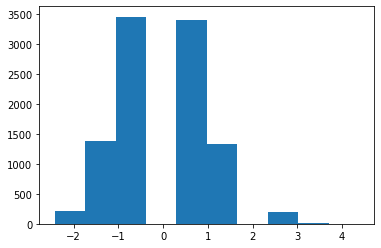

In [258]:
# Check it on the histogram
plt.hist(df1['Z_item8'])
plt.show()

In [259]:
# Check how many instances are greater than 3
df1[df1['Z_item8']>3]

Population      Area  Children  Age    Income        Marital  Gender  \
578      21763.0  Suburban       8.0   35  21801.03  Never Married    Male   
919        447.0  Suburban       0.0   76   8716.12       Divorced    Male   
1802       533.0  Suburban       1.0   68  28837.52      Separated  Female   
2043     25827.0     Urban       0.0   34  37794.12        Widowed  Female   
2072      6257.0  Suburban       1.0   36  30575.77        Married    Male   
2185      5060.0     Urban       4.0   75  36649.03       Divorced    Male   
2366     11294.0     Urban       0.0   29  38009.71      Separated  Female   
2964     22254.0  Suburban       1.0   27  49071.14        Widowed  Female   
3107       218.0  Suburban       2.0   31  80392.41        Married  Female   
4486     13981.0  Suburban       0.0   28  93909.59        Married  Female   
5336       870.0  Suburban       2.0   37  52076.30        Widowed  Female   
5574     17052.0     Rural       1.0   87  98072.18  Never Married    Male   
7017     13168.0  Suburban       1.0   80  49761.98  Never Married    Male   
7840       613.0  Suburban       3.0   33  39381.88        Widowed  Female   
9160      2515.0  Suburban       1.0   77  24997.36  Never Married    Male   

     Churn  Outage_sec_perweek  Email  ...  Z_monthly_charge  \
578     No           12.478106    9.0  ...         -1.866975   
919    Yes           10.525453   10.0  ...         -0.294839   
1802    No           12.171821   13.0  ...         -1.517033   
2043   Yes            7.365321   12.0  ...         -0.294805   
2072   Yes           11.585510   10.0  ...         -0.062575   
2185    No           11.829500   14.0  ...          0.287283   
2366   Yes            6.933869   15.0  ...          0.054612   
2964    No           10.577500   14.0  ...         -0.062575   
3107    No            9.736413    9.0  ...         -0.528331   
4486    No            9.472208    8.0  ...          0.694407   
5336    No           10.053720    7.0  ...         -0.528170   
5574    No            3.737016   11.0  ...         -0.236539   
7017    No            7.917411   11.0  ...         -1.109587   
7840    No            4.575053   15.0  ...          0.752773   
9160    No            7.471035   18.0  ...         -1.400538   

      Z_bandwidth_gb_year   Z_item1   Z_item2   Z_item3   Z_item4   Z_item5  \
578             -1.006208  1.454307  1.444922  1.471896  0.489878 -1.456817   
919             -1.201948  2.417934  2.411489  1.471896  0.489878  0.494844   
1802            -1.231801  2.417934  1.444922  1.471896 -0.485004 -0.480987   
2043            -1.147509  0.490679  1.444922 -0.473770  1.464761 -1.456817   
2072            -1.110643  1.454307  0.478354  0.499063  0.489878 -1.456817   
2185            -0.712543  2.417934  1.444922  1.471896  0.489878 -2.432648   
2366            -1.117342  1.454307  2.411489  0.499063  0.489878 -0.480987   
2964            -1.206034  1.454307  0.478354  0.499063  0.489878 -0.480987   
3107            -0.909995  2.417934  0.478354  2.444730  0.489878 -1.456817   
4486            -0.894193  1.454307  0.478354  0.499063  0.489878 -0.480987   
5336             1.006138  1.454307  1.444922  0.499063  0.489878  0.494844   
5574             1.109067  1.454307  0.478354  1.471896  0.489878 -0.480987   
7017             0.745739  1.454307  0.478354  0.499063  2.439643 -2.432648   
7840             0.208121  1.454307  2.411489  1.471896  1.464761 -0.480987   
9160            -0.020600  1.454307  1.444922  0.499063  1.464761  0.494844   

       Z_item6   Z_item7   Z_item8  
578   0.486389  1.449268  3.407021  
919   1.453943 -0.495406  3.407021  
1802  1.453943  0.476931  3.407021  
2043  0.486389  0.476931  3.407021  
2072  0.486389  1.449268  3.407021  
2185  2.421497  2.421605  4.379233  
2366  2.421497  1.449268  3.407021  
2964  1.453943  0.476931  3.407021  
3107  1.453943  0.476931  3.407021  
4486  0.486389  2.421605  3.407021  
5336  0.486389  1.449268  3.407021  
5574  0.486389  1.44926

In [260]:
# Make a new df for imputation
df_i8 = df1[['Item8', 'Z_item8']]

In [261]:
# Make the outliers equal to Nan
df_i8[(df_i8.Z_item8 > 3)] = np.nan

In [262]:
# Check before replacement
df_i8['Item8'].describe()

count    9985.000000
mean        3.490235
std         1.019997
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: Item8, dtype: float64

In [263]:
# Replace with values
df_i8['Item8'].fillna(df_i8['Item8'].median(), inplace=True)

In [264]:
# Check stats
df_i8['Item8'].describe()

count    10000.000000
mean         3.489500
std          1.019408
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: Item8, dtype: float64

In [265]:
# Replace with no outliers
df1['Item8'] = df_i8['Item8']

In [266]:
# Check stats after median imputation
df1['Item8'].describe()

count    10000.000000
mean         3.489500
std          1.019408
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: Item8, dtype: float64

In [267]:
# Check df info
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            10000 non-null  float64
 1   Area                  10000 non-null  object 
 2   Children              10000 non-null  float64
 3   Age                   10000 non-null  int64  
 4   Income                10000 non-null  float64
 5   Marital               10000 non-null  object 
 6   Gender                10000 non-null  object 
 7   Churn                 10000 non-null  object 
 8   Outage_sec_perweek    10000 non-null  float64
 9   Email                 10000 non-null  float64
 10  Contacts              10000 non-null  float64
 11  Yearly_equip_failure  10000 non-null  float64
 12  Techie                10000 non-null  object 
 13  Contract              10000 non-null  object 
 14  Port_modem            10000 non-null  object 
 15  Tablet              

In [268]:
df1.shape

(10000, 57)

In [269]:
df2 = df1[['Population', 'Area', 'Children', 'Age', 'Income', 'Marital', 
           'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 
           'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem',
           'Tablet', 'InternetService', 'Phone', 'Multiple', 
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport', 'StreamingTV', 'StreamingMovies', 
           'PaperlessBilling', 'PaymentMethod', 'Tenure', 
           'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 
           'Item3', 'Item4', 'Item5', 'Item6', 
           'Item7', 'Item8']]

In [270]:
df2.shape

(10000, 38)

### Univariate and Bivariate visualizations

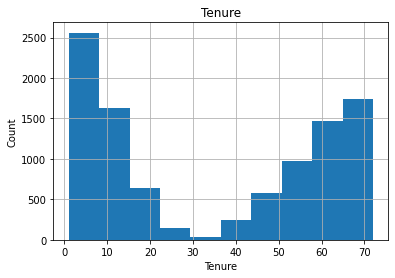

In [271]:
# Show it on the histogram
df2['Tenure'].hist()
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Tenure')
plt.show()

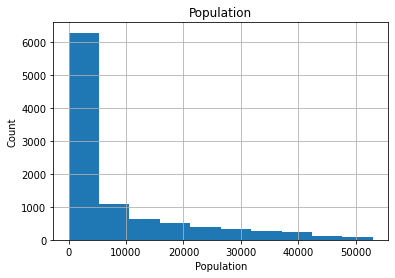

In [272]:
# Show it on the histogram
df2['Population'].hist()
plt.xlabel('Population')
plt.ylabel('Count')
plt.title('Population')
plt.show()

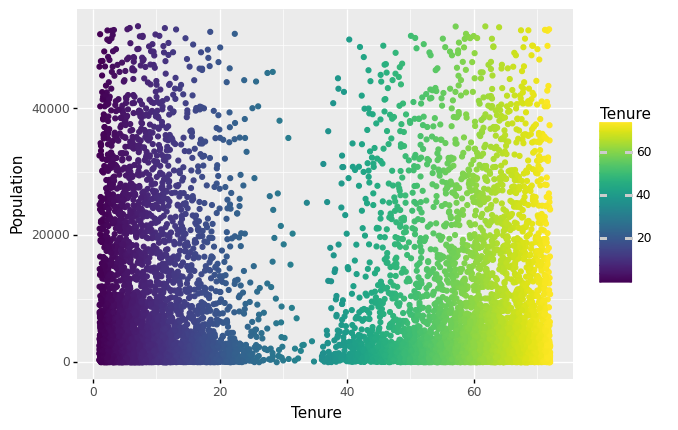

In [273]:
print(p9.ggplot(df2) + p9.aes(x='Tenure', y='Population', color='Tenure')
     + p9.geom_point())

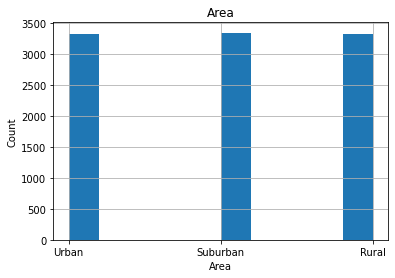

In [274]:
# Show it on the histogram
df2['Area'].hist()
plt.xlabel('Area')
plt.ylabel('Count')
plt.title('Area')
plt.show()

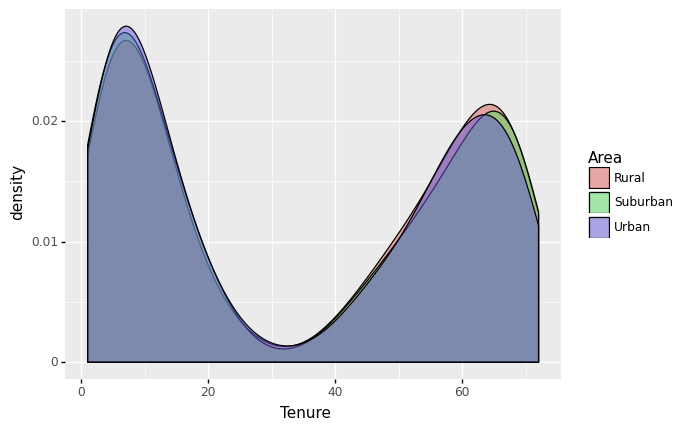

In [275]:
print(p9.ggplot(df2) + p9.aes(x='Tenure', fill='Area')
     + p9.geom_density(alpha=0.5))

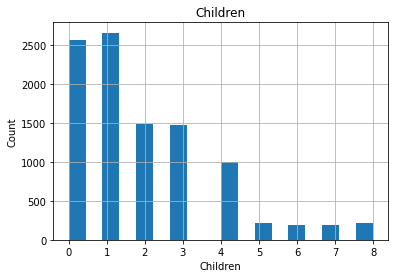

In [276]:
# Show it on the histogram
df2['Children'].hist(bins=18)
plt.xlabel('Children')
plt.ylabel('Count')
plt.title('Children')
plt.show()

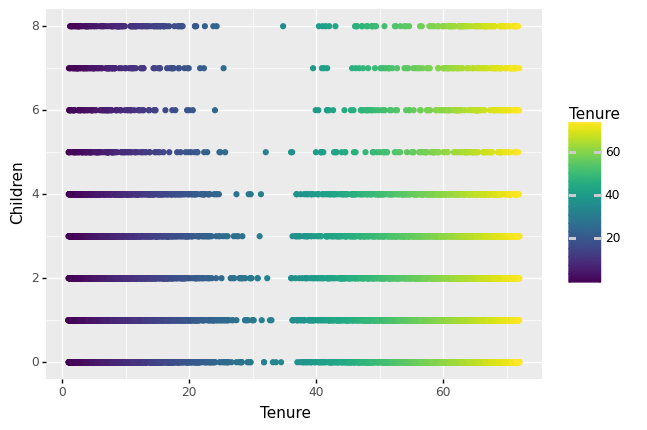

In [277]:
print(p9.ggplot(df2) + p9.aes(x='Tenure', y='Children', color='Tenure')
     + p9.geom_point())

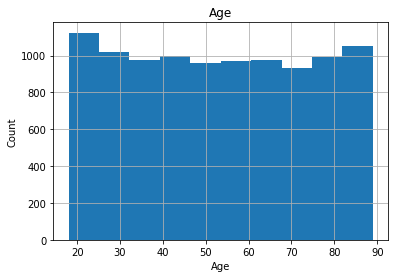

In [278]:
# Show it on the histogram
df2['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age')
plt.show()

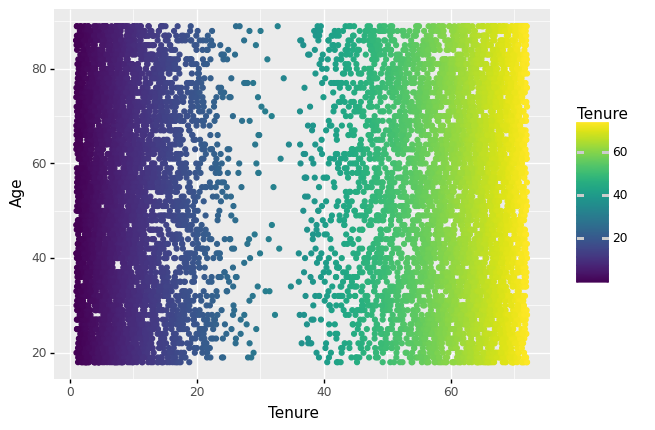

In [279]:
print(p9.ggplot(df2) + p9.aes(x='Tenure', y='Age', color='Tenure')
     + p9.geom_point())

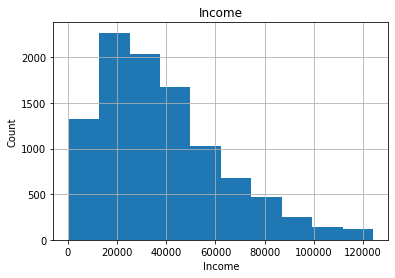

In [280]:
# Show it on the histogram
df2['Income'].hist()
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Income')
plt.show()

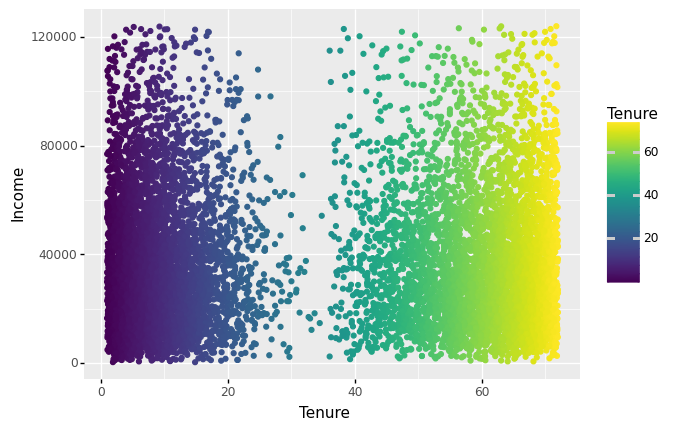

In [281]:
print(p9.ggplot(df2) + p9.aes(x='Tenure', y='Income', color='Tenure')
     + p9.geom_point())

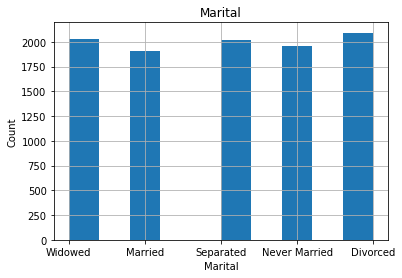

In [282]:
# Show it on the histogram
df2['Marital'].hist()
plt.xlabel('Marital')
plt.ylabel('Count')
plt.title('Marital')
plt.show()

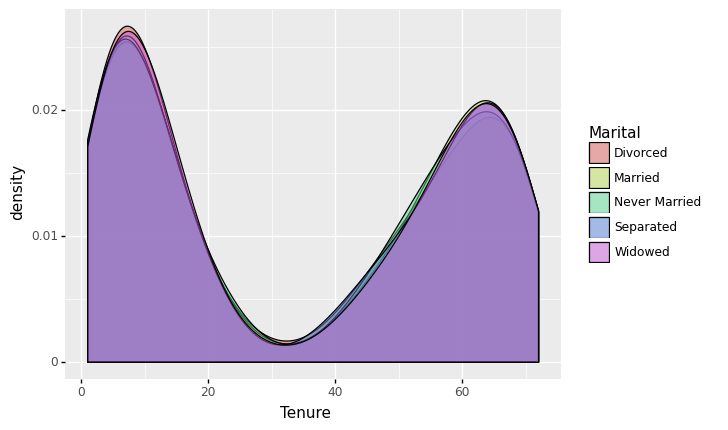

In [283]:
print(p9.ggplot(df2) + p9.aes(x='Tenure', fill='Marital')
     + p9.geom_density(alpha=0.5))

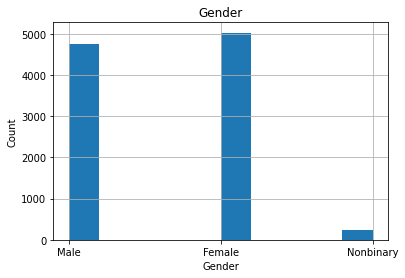

In [284]:
# Show it on the histogram
df2['Gender'].hist()
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender')
plt.show()

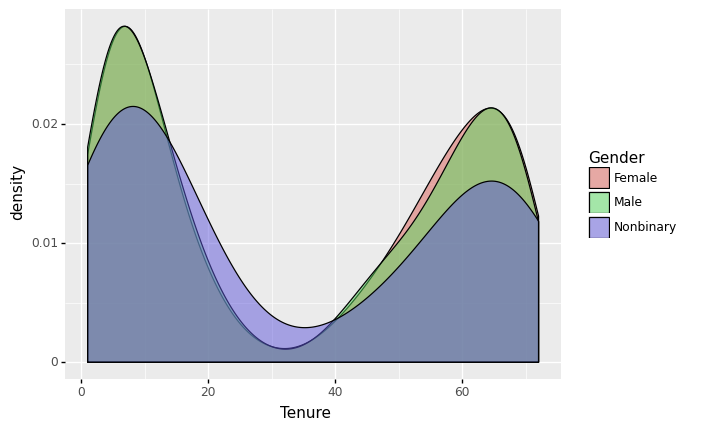

In [285]:
print(p9.ggplot(df2) + p9.aes(x='Tenure', fill='Gender')
     + p9.geom_density(alpha=0.5))

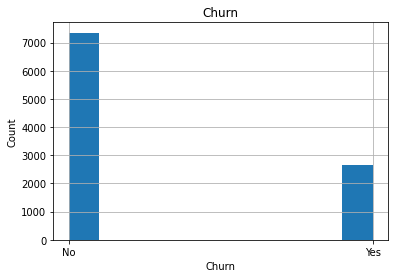

In [286]:
# Show it on the histogram
df2['Churn'].hist()
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn')
plt.show()

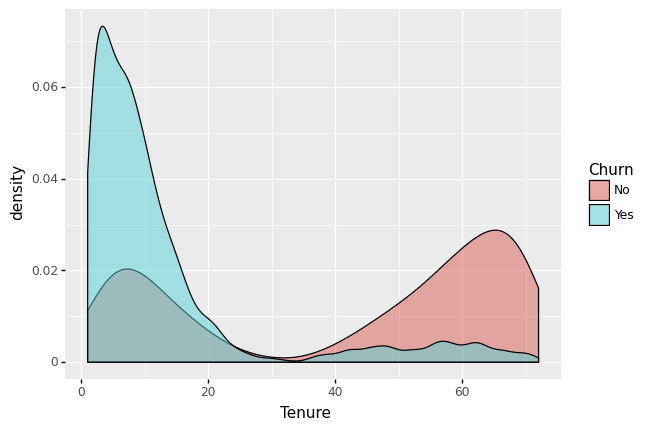

In [287]:
print(p9.ggplot(df2) + p9.aes(x='Tenure', fill='Churn')
     + p9.geom_density(alpha=0.5))

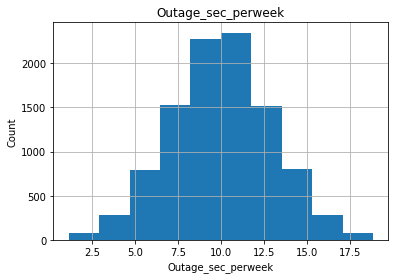

In [288]:
# Show it on the histogram
df2['Outage_sec_perweek'].hist()
plt.xlabel('Outage_sec_perweek')
plt.ylabel('Count')
plt.title('Outage_sec_perweek')
plt.show()

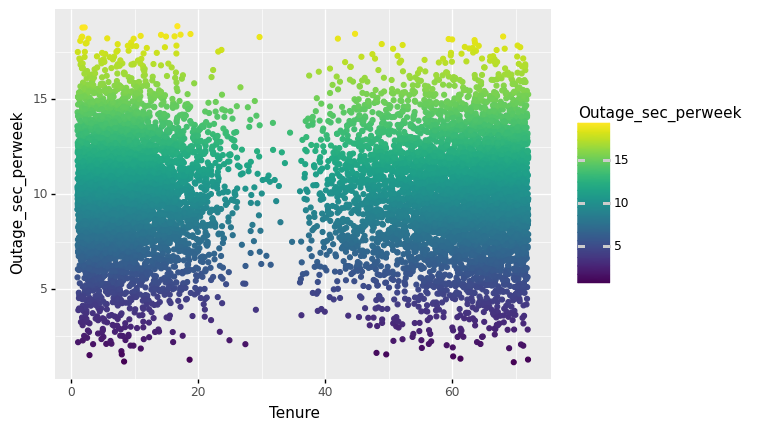

In [289]:
print(p9.ggplot(df2) + p9.aes(x='Tenure', y='Outage_sec_perweek', color='Outage_sec_perweek')
     + p9.geom_point())

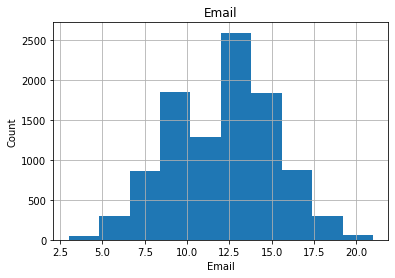

In [290]:
# Show it on the histogram
df2['Email'].hist()
plt.xlabel('Email')
plt.ylabel('Count')
plt.title('Email')
plt.show()

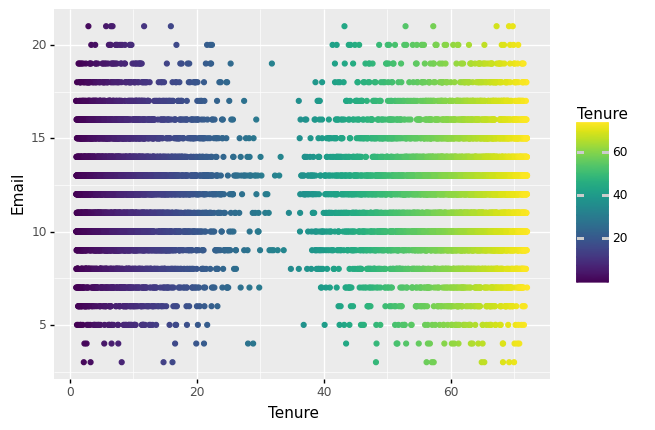

In [291]:
print(p9.ggplot(df2) + p9.aes(x='Tenure', y='Email', color='Tenure')
     + p9.geom_point())

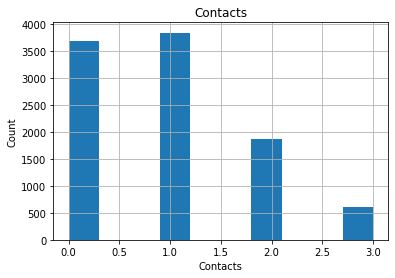

In [292]:
# Show it on the histogram
df2['Contacts'].hist()
plt.xlabel('Contacts')
plt.ylabel('Count')
plt.title('Contacts')
plt.show()

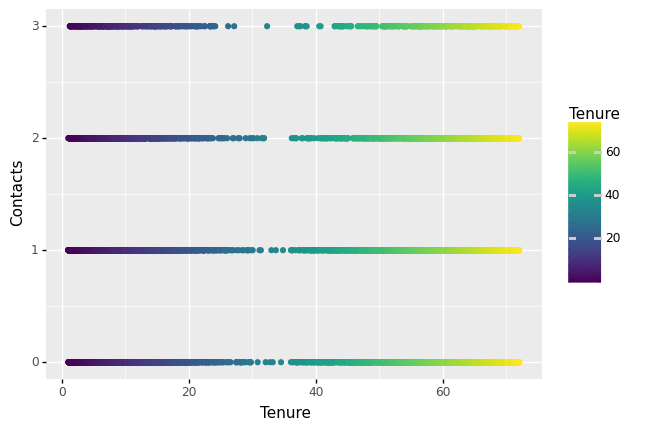

In [293]:
print(p9.ggplot(df2) + p9.aes(x='Tenure', y='Contacts', color='Tenure')
     + p9.geom_point())

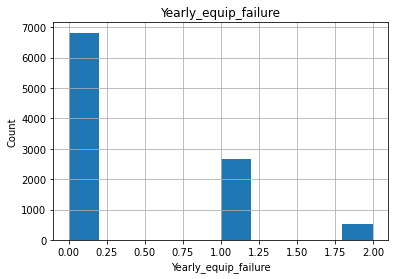

In [294]:
# Show it on the histogram
df2['Yearly_equip_failure'].hist()
plt.xlabel('Yearly_equip_failure')
plt.ylabel('Count')
plt.title('Yearly_equip_failure')
plt.show()

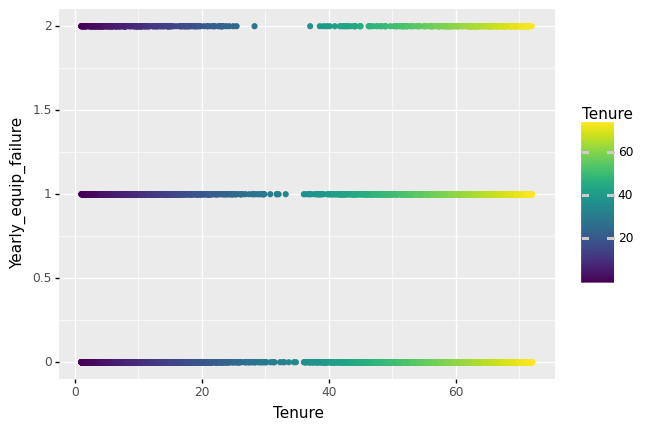

In [295]:
print(p9.ggplot(df2) + p9.aes(x='Tenure', y='Yearly_equip_failure', color='Tenure')
     + p9.geom_point())

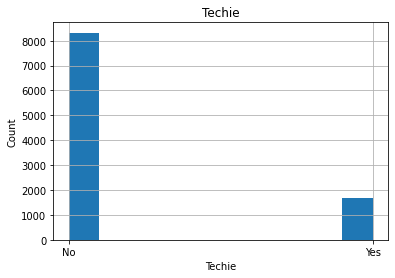

In [296]:
# Show it on the histogram
df2['Techie'].hist()
plt.xlabel('Techie')
plt.ylabel('Count')
plt.title('Techie')
plt.show()

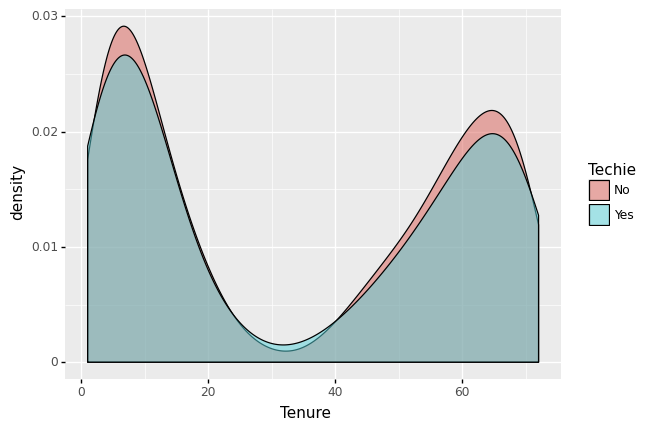

In [297]:
print(p9.ggplot(df2) + p9.aes(x='Tenure', fill='Techie')
     + p9.geom_density(alpha=0.5))

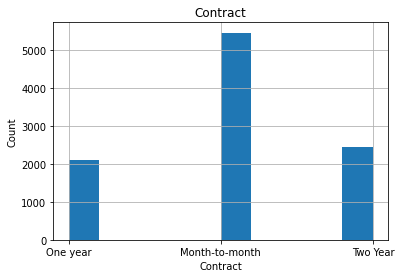

In [298]:
# Show it on the histogram
df2['Contract'].hist()
plt.xlabel('Contract')
plt.ylabel('Count')
plt.title('Contract')
plt.show()

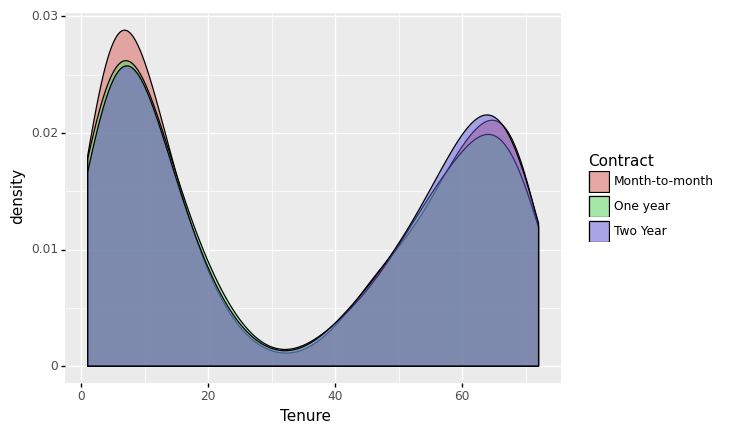

In [299]:
print(p9.ggplot(df2) + p9.aes(x='Tenure', fill='Contract')
     + p9.geom_density(alpha=0.5))

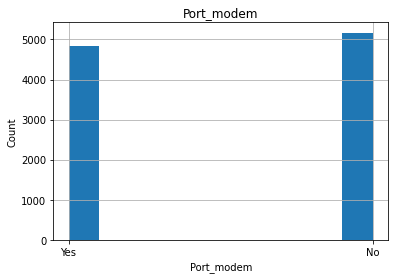

In [300]:
# Show it on the histogram
df2['Port_modem'].hist()
plt.xlabel('Port_modem')
plt.ylabel('Count')
plt.title('Port_modem')
plt.show()

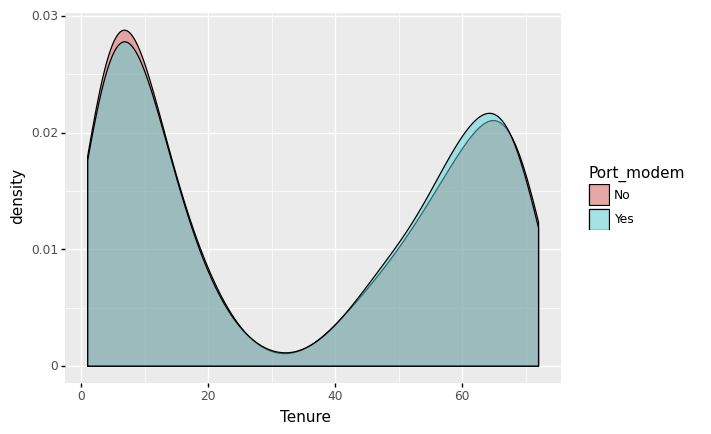

In [301]:
print(p9.ggplot(df2) + p9.aes(x='Tenure', fill='Port_modem')
     + p9.geom_density(alpha=0.5))

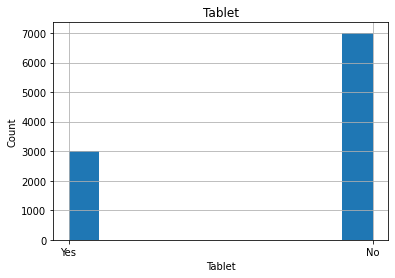

In [302]:
# Show it on the histogram
df2['Tablet'].hist()
plt.xlabel('Tablet')
plt.ylabel('Count')
plt.title('Tablet')
plt.show()

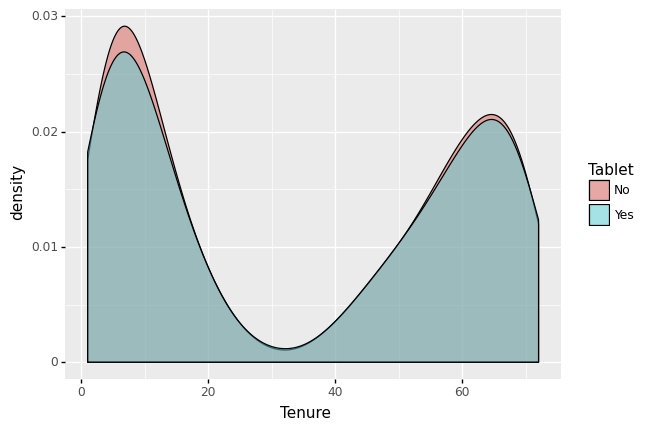

In [303]:
print(p9.ggplot(df2) + p9.aes(x='Tenure', fill='Tablet')
     + p9.geom_density(alpha=0.5))

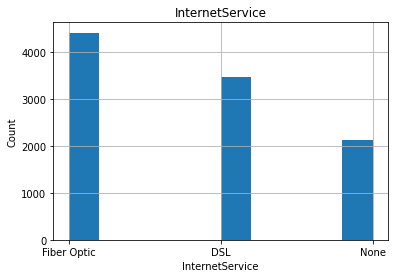

In [304]:
# Show it on the histogram
df2['InternetService'].hist()
plt.xlabel('InternetService')
plt.ylabel('Count')
plt.title('InternetService')
plt.show()

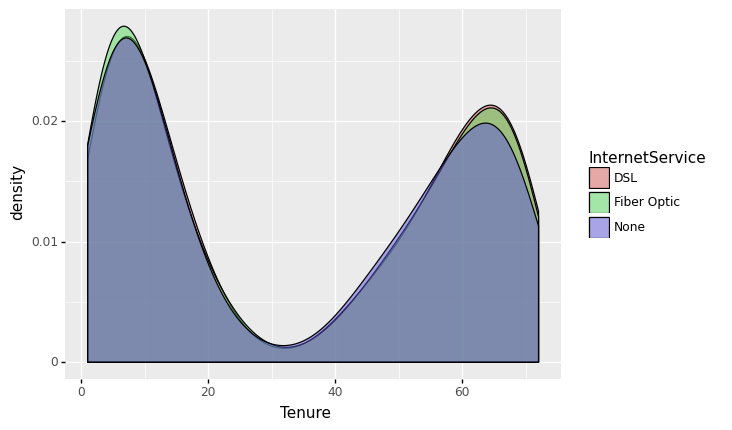

In [305]:
print(p9.ggplot(df2) + p9.aes(x='Tenure', fill='InternetService')
     + p9.geom_density(alpha=0.5))

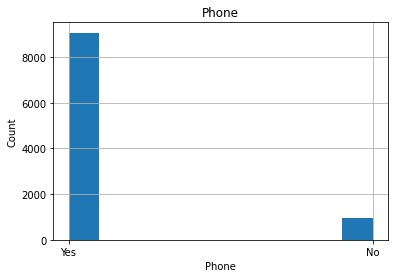

In [306]:
# Show it on the histogram
df2['Phone'].hist()
plt.xlabel('Phone')
plt.ylabel('Count')
plt.title('Phone')
plt.show()

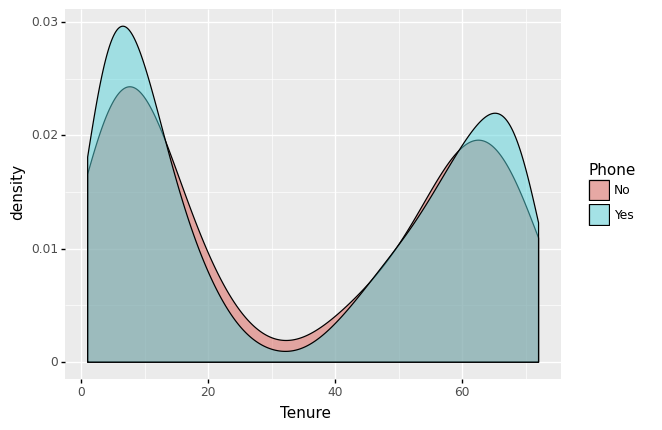

In [307]:
print(p9.ggplot(df2) + p9.aes(x='Tenure', fill='Phone')
     + p9.geom_density(alpha=0.5))

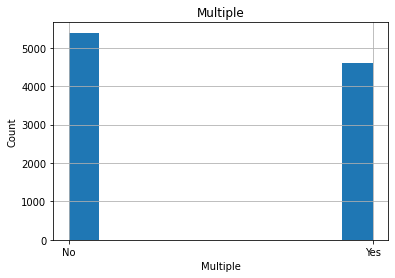

In [308]:
# Show it on the histogram
df2['Multiple'].hist()
plt.xlabel('Multiple')
plt.ylabel('Count')
plt.title('Multiple')
plt.show()

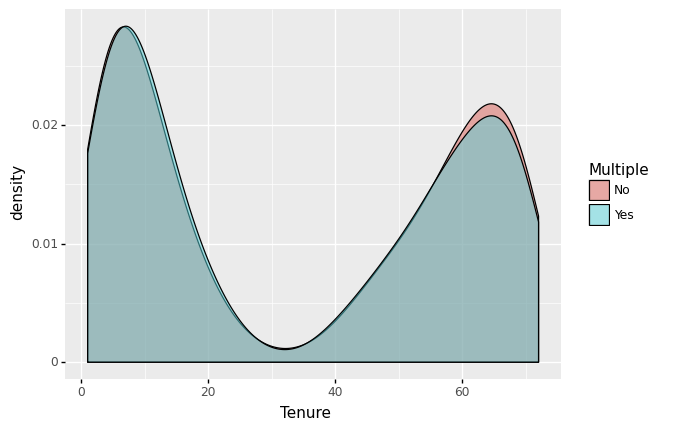

In [309]:
print(p9.ggplot(df2) + p9.aes(x='Tenure', fill='Multiple')
     + p9.geom_density(alpha=0.5))

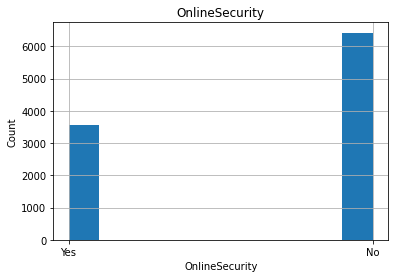

In [310]:
# Show it on the histogram
df2['OnlineSecurity'].hist()
plt.xlabel('OnlineSecurity')
plt.ylabel('Count')
plt.title('OnlineSecurity')
plt.show()

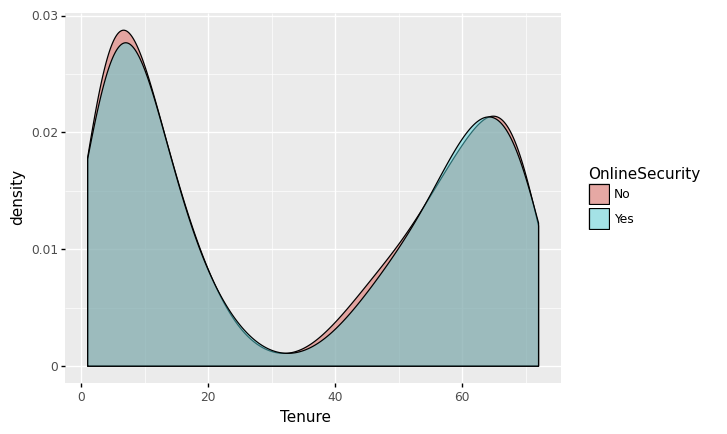

In [311]:
print(p9.ggplot(df2) + p9.aes(x='Tenure', fill='OnlineSecurity')
     + p9.geom_density(alpha=0.5))

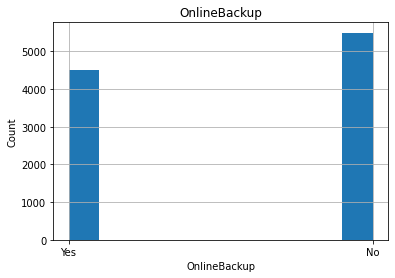

In [312]:
# Show it on the histogram
df2['OnlineBackup'].hist()
plt.xlabel('OnlineBackup')
plt.ylabel('Count')
plt.title('OnlineBackup')
plt.show()

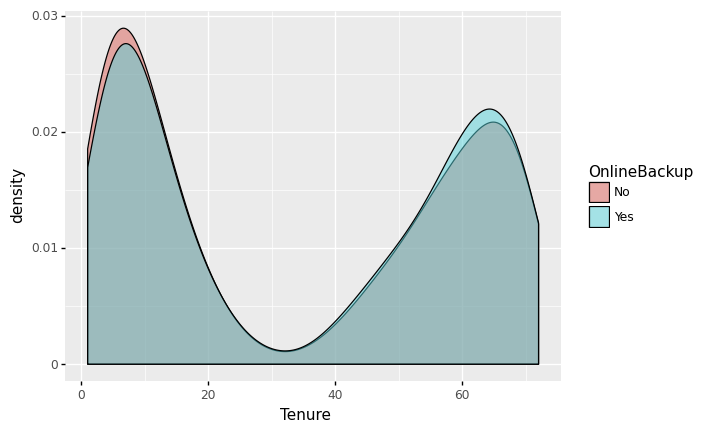

In [313]:
print(p9.ggplot(df2) + p9.aes(x='Tenure', fill='OnlineBackup')
     + p9.geom_density(alpha=0.5))

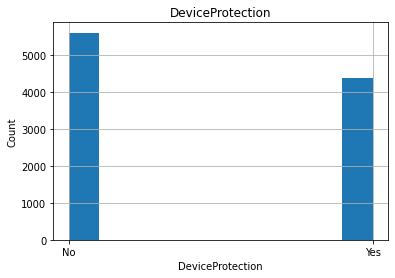

In [314]:
# Show it on the histogram
df2['DeviceProtection'].hist()
plt.xlabel('DeviceProtection')
plt.ylabel('Count')
plt.title('DeviceProtection')
plt.show()

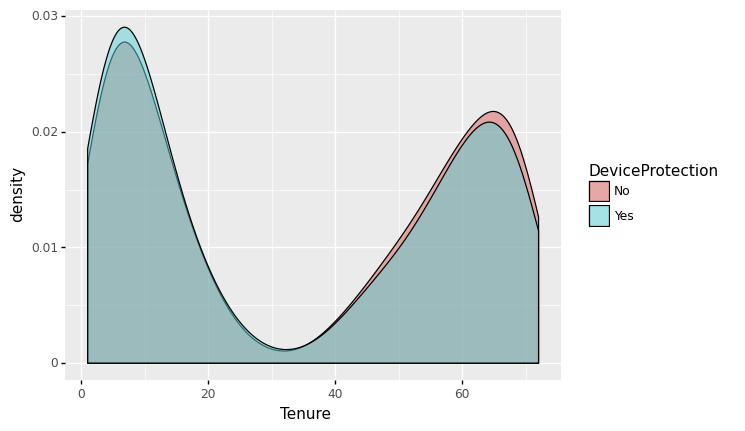

In [315]:
print(p9.ggplot(df2) + p9.aes(x='Tenure', fill='DeviceProtection')
     + p9.geom_density(alpha=0.5))

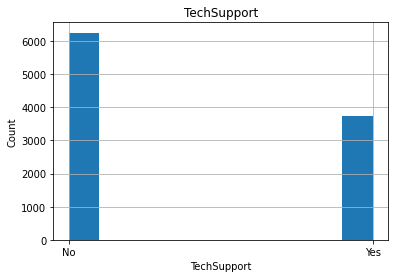

In [316]:
# Show it on the histogram
df2['TechSupport'].hist()
plt.xlabel('TechSupport')
plt.ylabel('Count')
plt.title('TechSupport')
plt.show()

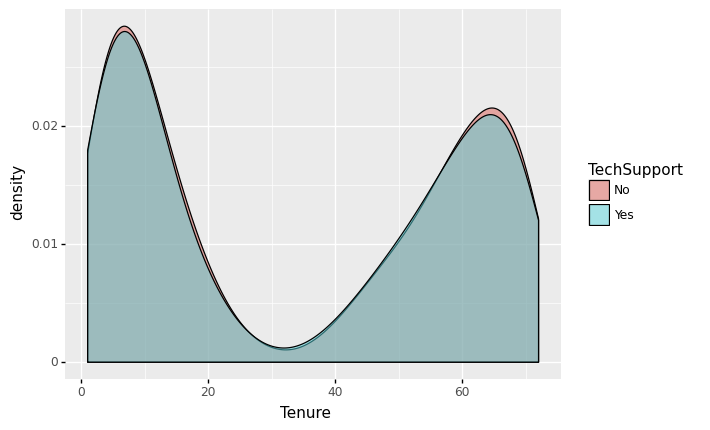

In [317]:
print(p9.ggplot(df2) + p9.aes(x='Tenure', fill='TechSupport')
     + p9.geom_density(alpha=0.5))

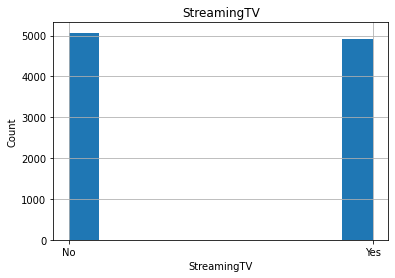

In [318]:
# Show it on the histogram
df2['StreamingTV'].hist()
plt.xlabel('StreamingTV')
plt.ylabel('Count')
plt.title('StreamingTV')
plt.show()

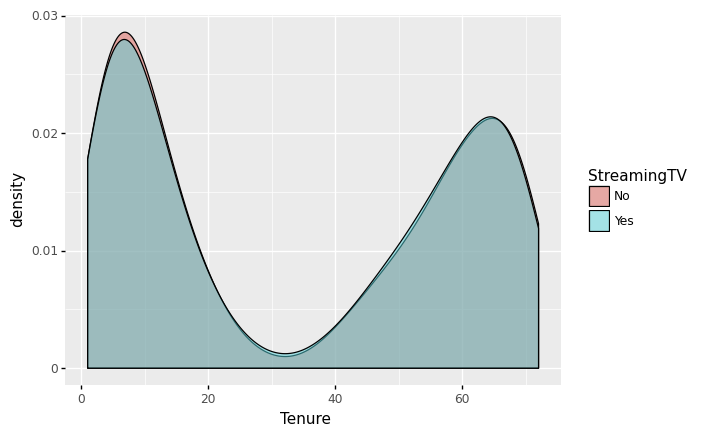

In [319]:
print(p9.ggplot(df2) + p9.aes(x='Tenure', fill='StreamingTV')
     + p9.geom_density(alpha=0.5))

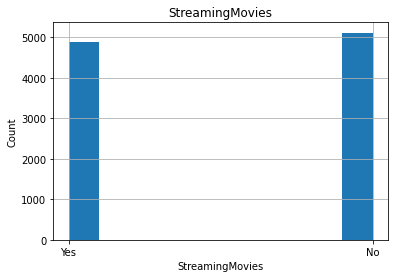

In [320]:
# Show it on the histogram
df2['StreamingMovies'].hist()
plt.xlabel('StreamingMovies')
plt.ylabel('Count')
plt.title('StreamingMovies')
plt.show()

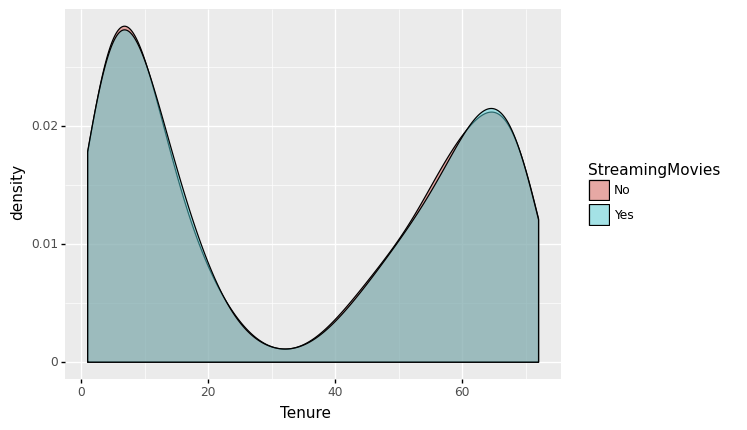

In [321]:
print(p9.ggplot(df2) + p9.aes(x='Tenure', fill='StreamingMovies')
     + p9.geom_density(alpha=0.5))

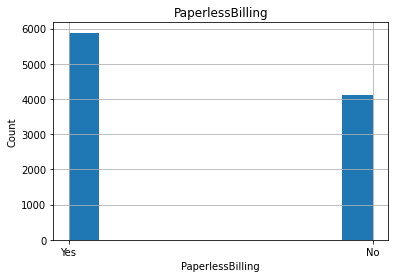

In [322]:
# Show it on the histogram
df2['PaperlessBilling'].hist()
plt.xlabel('PaperlessBilling')
plt.ylabel('Count')
plt.title('PaperlessBilling')
plt.show()

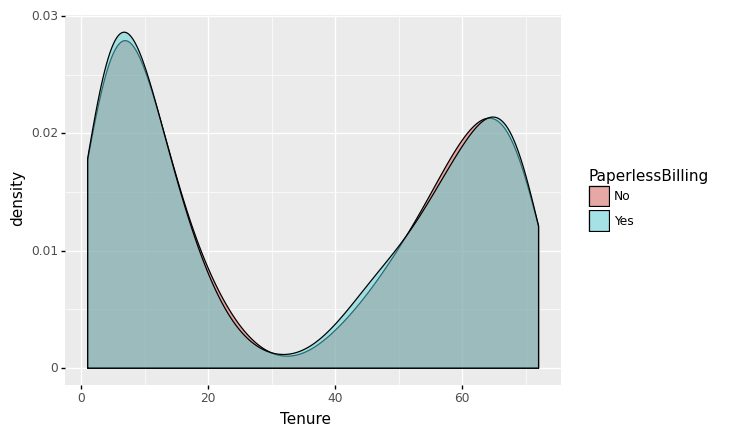

In [323]:
print(p9.ggplot(df2) + p9.aes(x='Tenure', fill='PaperlessBilling')
     + p9.geom_density(alpha=0.5))

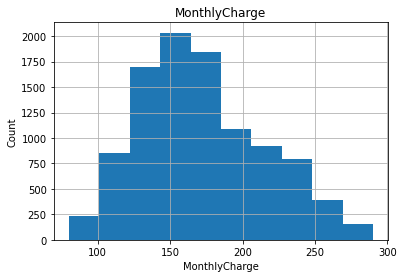

In [324]:
# Show it on the histogram
df2['MonthlyCharge'].hist()
plt.xlabel('MonthlyCharge')
plt.ylabel('Count')
plt.title('MonthlyCharge')
plt.show()

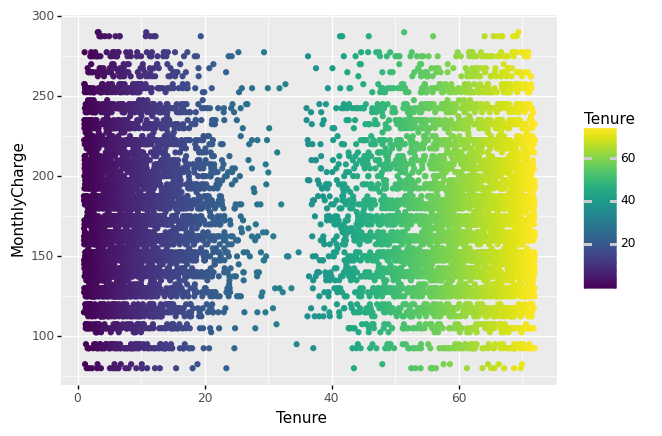

In [325]:
print(p9.ggplot(df2) + p9.aes(x='Tenure', y='MonthlyCharge', color='Tenure')
     + p9.geom_point())

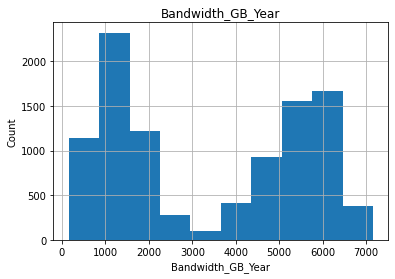

In [326]:
# Show it on the histogram
df2['Bandwidth_GB_Year'].hist()
plt.xlabel('Bandwidth_GB_Year')
plt.ylabel('Count')
plt.title('Bandwidth_GB_Year')
plt.show()

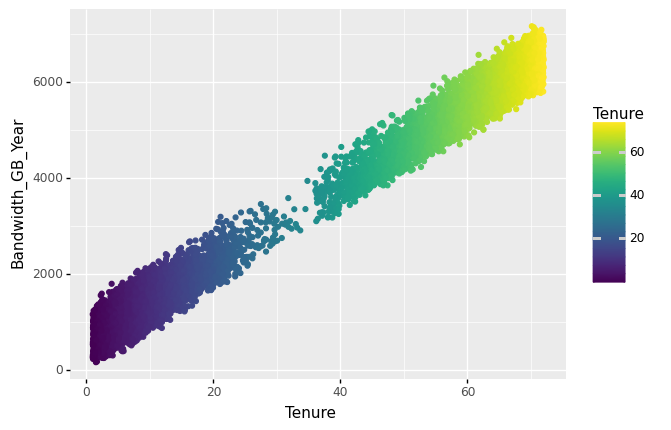

In [327]:
print(p9.ggplot(df2) + p9.aes(x='Tenure', y='Bandwidth_GB_Year', color='Tenure')
     + p9.geom_point())

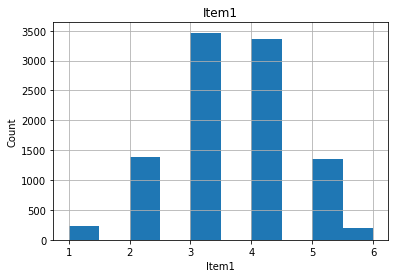

In [328]:
# Show it on the histogram
df2['Item1'].hist()
plt.xlabel('Item1')
plt.ylabel('Count')
plt.title('Item1')
plt.show()

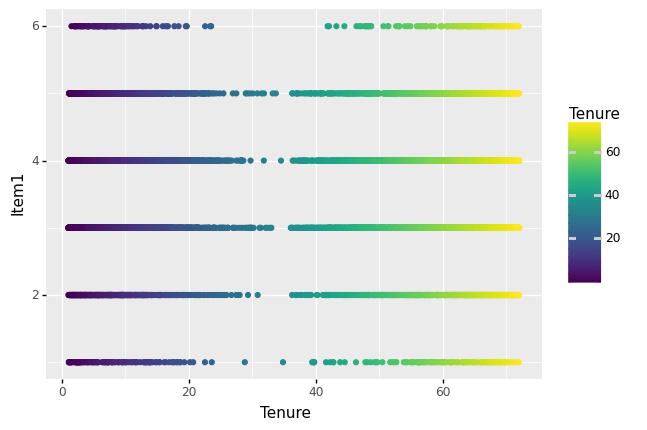

In [329]:
print(p9.ggplot(df2) + p9.aes(x='Tenure', y='Item1', color='Tenure')
     + p9.geom_point())

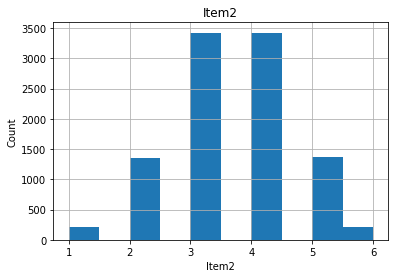

In [330]:
# Show it on the histogram
df2['Item2'].hist()
plt.xlabel('Item2')
plt.ylabel('Count')
plt.title('Item2')
plt.show()

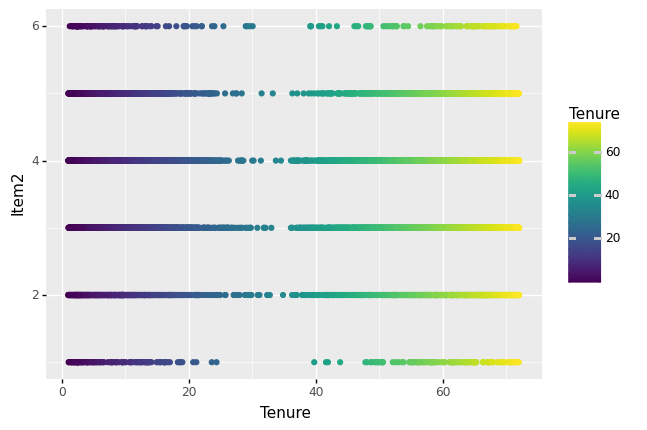

In [331]:
print(p9.ggplot(df2) + p9.aes(x='Tenure', y='Item2', color='Tenure')
     + p9.geom_point())

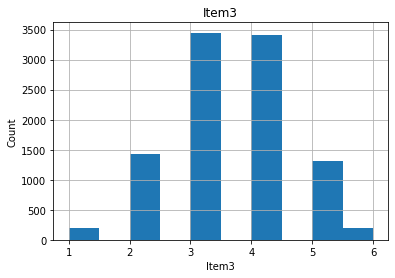

In [332]:
# Show it on the histogram
df2['Item3'].hist()
plt.xlabel('Item3')
plt.ylabel('Count')
plt.title('Item3')
plt.show()

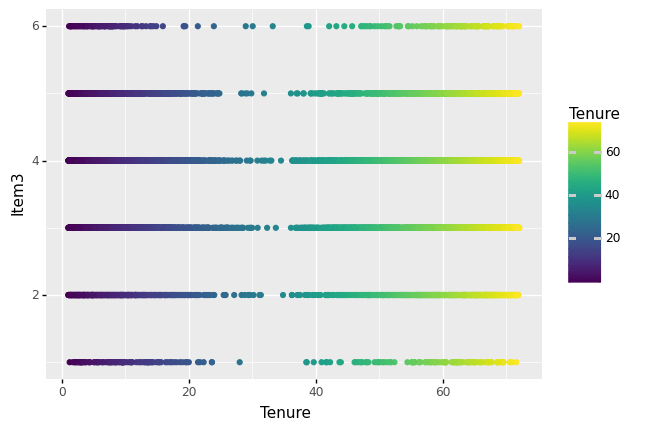

In [333]:
print(p9.ggplot(df2) + p9.aes(x='Tenure', y='Item3', color='Tenure')
     + p9.geom_point())

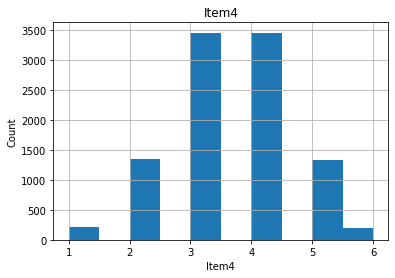

In [334]:
# Show it on the histogram
df2['Item4'].hist()
plt.xlabel('Item4')
plt.ylabel('Count')
plt.title('Item4')
plt.show()

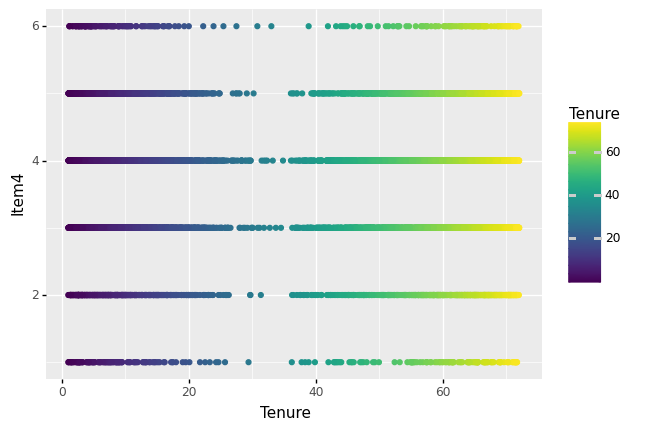

In [335]:
print(p9.ggplot(df2) + p9.aes(x='Tenure', y='Item4', color='Tenure')
     + p9.geom_point())

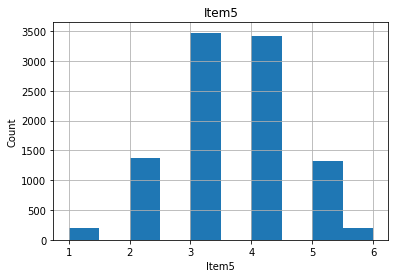

In [336]:
# Show it on the histogram
df2['Item5'].hist()
plt.xlabel('Item5')
plt.ylabel('Count')
plt.title('Item5')
plt.show()

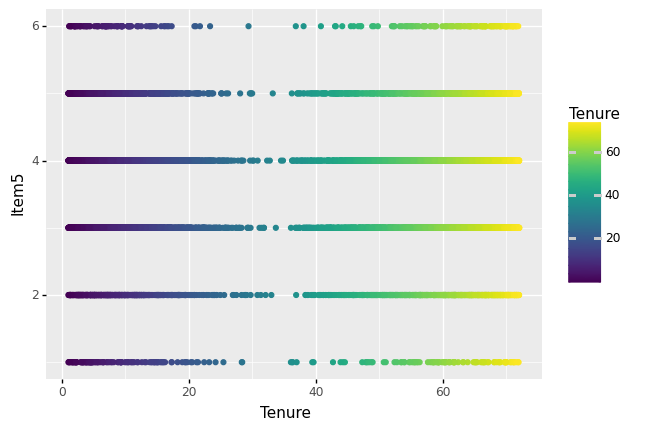

In [337]:
print(p9.ggplot(df2) + p9.aes(x='Tenure', y='Item5', color='Tenure')
     + p9.geom_point())

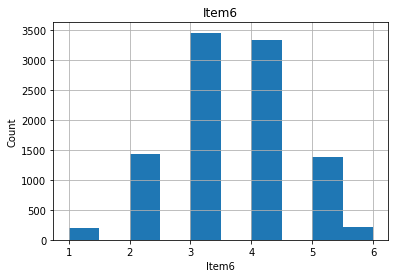

In [338]:
# Show it on the histogram
df2['Item6'].hist()
plt.xlabel('Item6')
plt.ylabel('Count')
plt.title('Item6')
plt.show()

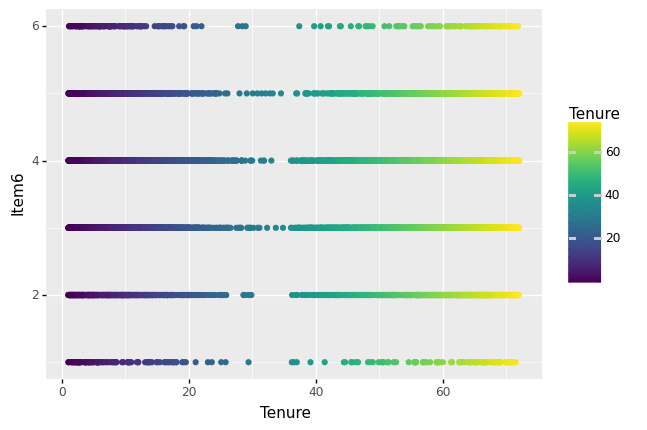

In [339]:
print(p9.ggplot(df2) + p9.aes(x='Tenure', y='Item6', color='Tenure')
     + p9.geom_point())

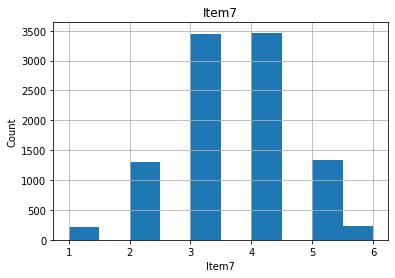

In [340]:
# Show it on the histogram
df2['Item7'].hist()
plt.xlabel('Item7')
plt.ylabel('Count')
plt.title('Item7')
plt.show()

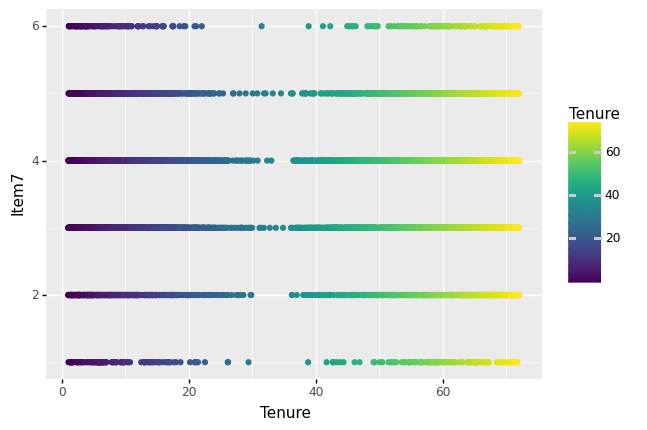

In [341]:
print(p9.ggplot(df2) + p9.aes(x='Tenure', y='Item7', color='Tenure')
     + p9.geom_point())

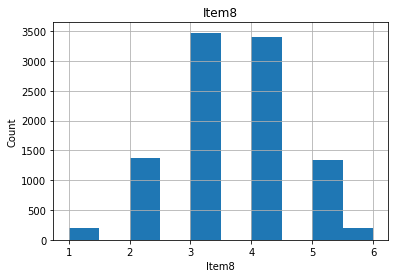

In [342]:
# Show it on the histogram
df2['Item8'].hist()
plt.xlabel('Item8')
plt.ylabel('Count')
plt.title('Item8')
plt.show()

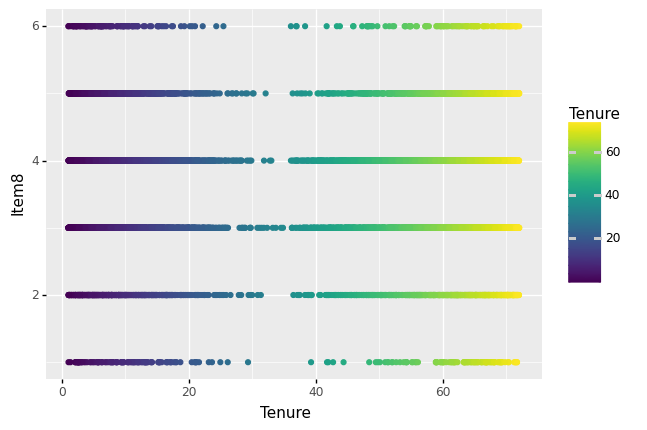

In [343]:
print(p9.ggplot(df2) + p9.aes(x='Tenure', y='Item8', color='Tenure')
     + p9.geom_point())

In [344]:
df2.shape

(10000, 38)

In [345]:
# Ordinal encoding all variables with Yes,No
df2['Churn'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['Techie'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['Port_modem'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['Tablet'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['Phone'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['Multiple'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['OnlineSecurity'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['OnlineBackup'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['DeviceProtection'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['TechSupport'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['StreamingTV'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['StreamingMovies'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['PaperlessBilling'].replace(['No', 'Yes'], [0,1], inplace=True)

In [346]:
# get_dummies encoding with K-1
x1 = ['Area', 'Marital', 'Gender', 'Contract', 
      'InternetService', 'PaymentMethod']
df2 = pd.get_dummies(df2, prefix=x1, prefix_sep='_', dummy_na=False,
                    columns=x1, drop_first=True)

In [347]:
# Check shape of df2...47 variables after encoding with get_dummies
print(df2.shape)

(10000, 47)


In [348]:
# Showing K-1 worked
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Population                             10000 non-null  float64
 1   Children                               10000 non-null  float64
 2   Age                                    10000 non-null  int64  
 3   Income                                 10000 non-null  float64
 4   Churn                                  10000 non-null  int64  
 5   Outage_sec_perweek                     10000 non-null  float64
 6   Email                                  10000 non-null  float64
 7   Contacts                               10000 non-null  float64
 8   Yearly_equip_failure                   10000 non-null  float64
 9   Techie                                 10000 non-null  int64  
 10  Port_modem                             10000 non-null  int64  
 11  Tab

In [349]:
# Make new clean_df
complete_df = df2[['Tenure', 'Population', 'Children', 'Age', 'Income', 'Churn', 
                   'Outage_sec_perweek', 'Email', 'Contacts', 
                   'Yearly_equip_failure', 'Techie', 'Port_modem', 
                   'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'MonthlyCharge', 'Bandwidth_GB_Year', 
                   'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 
                   'Item6', 'Item7', 'Item8', 'Area_Suburban', 
                   'Area_Urban', 'Marital_Married', 'Marital_Never Married', 
                   'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [350]:
# check shape of clean_df
complete_df.shape

(10000, 47)

In [351]:
# Extracting csv file of clean dataset
complete_df.to_csv(r'C:\\Users\\eric7\\OneDrive\\Desktop\\WGU\\D208_Predictive_Modeling\\Eric_Colwell_clean_dataset.csv')

In [352]:
# Looking for high correlation to Tenure
matrix = complete_df.corr()
print(matrix)

                                         Tenure  Population  Children  \
Tenure                                 1.000000   -0.014587 -0.004456   
Population                            -0.014587    1.000000  0.004705   
Children                              -0.004456    0.004705  1.000000   
Age                                    0.016979    0.012163 -0.022063   
Income                                -0.001726   -0.011508  0.006587   
Churn                                 -0.485475   -0.000200  0.001654   
Outage_sec_perweek                     0.002127    0.008814  0.015968   
Email                                 -0.013270    0.013048  0.001991   
Contacts                               0.001754    0.015006 -0.029564   
Yearly_equip_failure                   0.007721   -0.001869  0.013457   
Techie                                -0.010041   -0.010896 -0.008676   
Port_modem                             0.008764    0.014744  0.010046   
Tablet                                 0.000544   -

<AxesSubplot:>

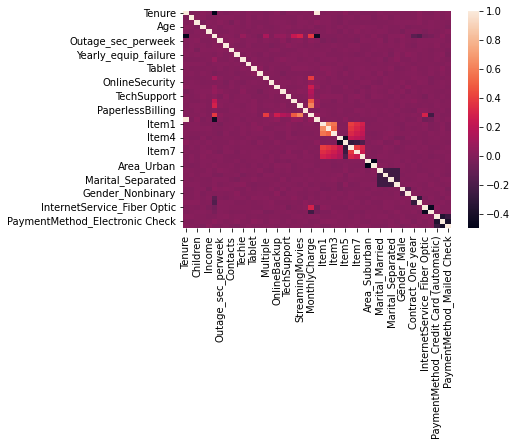

In [353]:
sns.heatmap(complete_df.corr())

<AxesSubplot:>

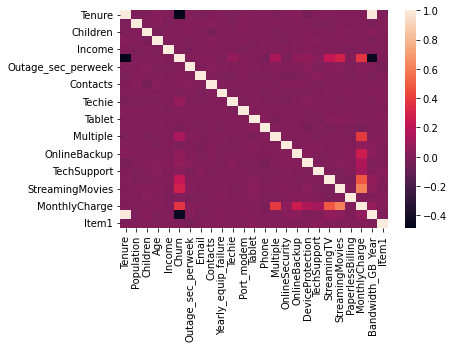

In [354]:
# Breaking heatmap in half to see better
sns.heatmap(complete_df.iloc[:,:25].corr())

<AxesSubplot:>

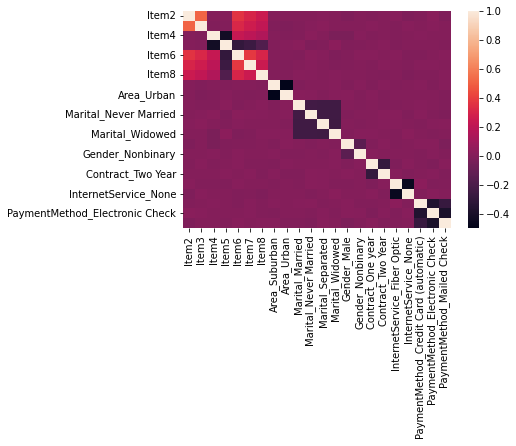

In [355]:
# Breaking heatmap in half to see better
sns.heatmap(complete_df.iloc[:,25:].corr())

In [356]:
# Bandwidth_GB_Year has high correlation
Bandwidth = complete_df[['Tenure', 'Bandwidth_GB_Year']]

In [357]:
# Looking for high correlation to Tenure--well above 0.75
matrix = Bandwidth.corr()
print(matrix)

                     Tenure  Bandwidth_GB_Year
Tenure             1.000000           0.991495
Bandwidth_GB_Year  0.991495           1.000000


<AxesSubplot:>

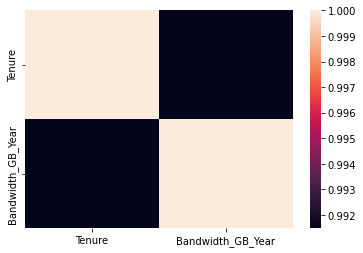

In [358]:
sns.heatmap(Bandwidth.corr())

In [359]:
# Initial model
# Make df for Feature reduction without Tenure
X = complete_df[['Population', 'Children', 'Age', 'Income', 'Churn', 
                   'Outage_sec_perweek', 'Email', 'Contacts', 
                   'Yearly_equip_failure', 'Techie', 'Port_modem', 
                   'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'MonthlyCharge', 'Bandwidth_GB_Year', 
                   'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 
                   'Item6', 'Item7', 'Item8', 'Area_Suburban', 
                   'Area_Urban', 'Marital_Married', 'Marital_Never Married', 
                   'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [360]:
# Set the target variable
y = complete_df['Tenure']

In [361]:
X.shape

(10000, 46)

In [362]:
regr = linear_model.LinearRegression()

In [363]:
# Fit the model
regr.fit(X, y)

LinearRegression()

In [364]:
# Run the initial model
# Note the high r-squared value
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

Y-Intercept: 
 -3.9042168638158117
X-Coefficients: 
 [ 5.15473858e-07 -3.59747368e-01  4.04144028e-02 -5.79402503e-08
 -9.94009609e-03  2.98160329e-03 -7.10756373e-04 -5.82024179e-04
  1.02481584e-03  5.07291490e-04 -2.50436518e-03 -4.66381046e-03
 -2.27747628e-03  3.07441412e-01 -8.36770707e-01 -3.33160946e-01
 -5.89610848e-01  3.90360713e-01 -1.27578857e+00 -6.85627002e-01
  6.51631870e-03 -3.56808253e-02  1.22008821e-02 -3.20156868e-03
  4.25979420e-03 -2.80043605e-03  3.22275730e-03  2.88522724e-03
 -2.05199279e-03 -4.07659898e-03 -9.67197091e-04 -1.65487998e-02
 -1.44712816e-02 -1.92629009e-02 -7.56750809e-03  3.90468784e-04
  8.07090222e-03 -7.92902671e-01  2.94568338e-01 -1.31494931e-02
 -1.23828150e-02  5.75669046e+00  4.58887948e+00 -1.47376026e-02
 -5.11679558e-03  2.32612889e-03]
                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       1.000
Model:                            OLS   

In [365]:
print(np.sqrt(model.mse_resid))

0.45021211455060767


In [366]:
# Checking for correlations above 0.75
matrix = complete_df.corr()
matrix = matrix.unstack()
matrix = matrix[abs(matrix) >= 0.75]
print(matrix)

Tenure                                 Tenure                                   1.000000
                                       Bandwidth_GB_Year                        0.991495
Population                             Population                               1.000000
Children                               Children                                 1.000000
Age                                    Age                                      1.000000
Income                                 Income                                   1.000000
Churn                                  Churn                                    1.000000
Outage_sec_perweek                     Outage_sec_perweek                       1.000000
Email                                  Email                                    1.000000
Contacts                               Contacts                                 1.000000
Yearly_equip_failure                   Yearly_equip_failure                     1.000000
Techie               

In [367]:
# Remove Bandwidth_GB_Year because of high correlation to Tenure
X = complete_df[['Population', 'Children', 'Age', 'Income', 'Churn', 
                   'Outage_sec_perweek', 'Email', 'Contacts', 
                   'Yearly_equip_failure', 'Techie', 'Port_modem', 
                   'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'MonthlyCharge', 'Item1', 'Item2', 'Item3', 'Item4', 
                   'Item5', 'Item6', 'Item7', 'Item8', 'Area_Suburban', 
                   'Area_Urban', 'Marital_Married', 'Marital_Never Married', 
                   'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [368]:
# Re-fit the model
regr.fit(X, y)

LinearRegression()

In [369]:
# Note the r-squared value dropped significantly
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

Y-Intercept: 
 21.62476199324199
X-Coefficients: 
 [-2.82280742e-05  9.66911354e-03  2.28058233e-02 -1.98206715e-06
 -3.88329216e+01 -9.44740405e-03 -6.01538775e-02  2.43038910e-01
  1.12419482e-01  2.21592797e+00  7.17215177e-01 -2.06282805e-01
 -7.74262740e-01 -1.58992743e+00 -8.11427452e-01 -1.10470353e+00
 -1.98699688e+00 -1.50727313e+00  9.70044156e-01  6.33025896e-01
  3.88302768e-01  1.74579361e-01 -3.50719648e-01 -6.79658383e-02
  2.07678771e-01 -2.53176582e-02  4.87694226e-01  1.16303750e-02
  2.14932301e-01 -2.41970635e-01 -7.82054419e-01 -5.66580600e-01
  7.01776595e-01  5.12416574e-01  1.24135878e+00  1.24065881e+00
  1.00193345e-01 -2.13461585e+00 -9.16194407e+00 -8.46951700e+00
 -7.39012573e+00 -2.08727168e+00  1.54640578e+00  1.86198342e+00
  1.32602868e+00]
                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:   

In [370]:
# Checking for correlations above 0.75
matrix = X.corr()
matrix = matrix.unstack()
matrix = matrix[abs(matrix) >= 0.75]
print(matrix)

Population                             Population                               1.0
Children                               Children                                 1.0
Age                                    Age                                      1.0
Income                                 Income                                   1.0
Churn                                  Churn                                    1.0
Outage_sec_perweek                     Outage_sec_perweek                       1.0
Email                                  Email                                    1.0
Contacts                               Contacts                                 1.0
Yearly_equip_failure                   Yearly_equip_failure                     1.0
Techie                                 Techie                                   1.0
Port_modem                             Port_modem                               1.0
Tablet                                 Tablet                               

In [371]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]
print(vif_data)

                                  Feature         VIF
0                                   const  239.564544
1                              Population    1.003641
2                                Children    1.004682
3                                     Age    1.004262
4                                  Income    1.004246
5                                   Churn    1.352386
6                      Outage_sec_perweek    1.005802
7                                   Email    1.004137
8                                Contacts    1.004221
9                    Yearly_equip_failure    1.005048
10                                 Techie    1.009289
11                             Port_modem    1.002084
12                                 Tablet    1.005983
13                                  Phone    1.006009
14                               Multiple    4.434837
15                         OnlineSecurity    1.026871
16                           OnlineBackup    2.644572
17                       Dev

In [372]:
# Remove MonthlyCharge due to high VIF above 10
X = complete_df[['Population', 'Children', 'Age', 'Income', 'Churn', 
                   'Outage_sec_perweek', 'Email', 'Contacts', 
                   'Yearly_equip_failure', 'Techie', 'Port_modem', 
                   'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Item1', 'Item2', 'Item3', 'Item4', 
                   'Item5', 'Item6', 'Item7', 'Item8', 'Area_Suburban', 
                   'Area_Urban', 'Marital_Married', 'Marital_Never Married', 
                   'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [373]:
# Re-fit model
regr.fit(X, y)

LinearRegression()

In [374]:
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

Y-Intercept: 
 36.27250687514174
X-Coefficients: 
 [-2.78682135e-05  5.61218095e-03  2.33704777e-02 -1.24192612e-06
 -3.83940029e+01 -1.14309193e-02 -6.18163430e-02  2.29585060e-01
  7.50040206e-02  2.25707483e+00  6.76400871e-01 -2.35860282e-01
 -8.61867974e-01  4.04986014e+00 -3.37199226e-01  2.81348732e+00
  1.75451038e-01  6.75669476e-01  8.24316558e+00  9.65713547e+00
  4.13638487e-01 -3.58401124e-01 -2.08007540e-02  1.91207140e-01
 -1.20957911e-02  5.01478791e-01 -8.07720064e-03  2.17156262e-01
 -2.47229867e-01 -7.73090799e-01 -5.73568792e-01  7.01587550e-01
  4.75053178e-01  1.22993904e+00  1.20561821e+00  5.24686710e-02
 -2.27082727e+00 -9.01776693e+00 -8.33282965e+00 -3.88732625e+00
 -4.29594562e+00  1.50186569e+00  1.83730445e+00  1.32199600e+00]
                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.

In [375]:
# Check VIF again--looks good now--nothing greater than 10
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]
print(vif_data)

                                  Feature         VIF
0                                   const  147.090098
1                              Population    1.003634
2                                Children    1.004657
3                                     Age    1.004203
4                                  Income    1.004100
5                                   Churn    1.336213
6                      Outage_sec_perweek    1.005787
7                                   Email    1.004126
8                                Contacts    1.004159
9                    Yearly_equip_failure    1.004846
10                                 Techie    1.009187
11                             Port_modem    1.001905
12                                 Tablet    1.005904
13                                  Phone    1.005729
14                               Multiple    1.028653
15                         OnlineSecurity    1.004605
16                           OnlineBackup    1.006507
17                       Dev

### Now using backward stepwise elimination with p-values > 0.05

In [376]:
# Removing Item6 p-value = 0.975
X = complete_df[['Population', 'Children', 'Age', 'Income', 'Churn', 
                   'Outage_sec_perweek', 'Email', 'Contacts', 
                   'Yearly_equip_failure', 'Techie', 'Port_modem', 
                   'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Item1', 'Item2', 'Item3', 'Item4', 
                   'Item5', 'Item7', 'Item8', 'Area_Suburban', 
                   'Area_Urban', 'Marital_Married', 'Marital_Never Married', 
                   'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [377]:
# Re-fit model
regr.fit(X, y)

LinearRegression()

In [378]:
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

Y-Intercept: 
 36.26042361667752
X-Coefficients: 
 [-2.78717411e-05  5.63656615e-03  2.33686982e-02 -1.24080800e-06
 -3.83941283e+01 -1.14321886e-02 -6.18430486e-02  2.29541645e-01
  7.50358938e-02  2.25707714e+00  6.76423213e-01 -2.35624317e-01
 -8.61716060e-01  4.05003653e+00 -3.37225615e-01  2.81353284e+00
  1.75389821e-01  6.75784673e-01  8.24315593e+00  9.65706605e+00
  4.13832836e-01 -3.59858690e-01 -2.18068992e-02  1.90555774e-01
 -1.29282548e-02  5.03045899e-01  2.15864067e-01 -2.48145331e-01
 -7.73078197e-01 -5.73617594e-01  7.01794834e-01  4.74913034e-01
  1.22993869e+00  1.20579661e+00  5.23835952e-02 -2.27157749e+00
 -9.01806578e+00 -8.33294237e+00 -3.88734083e+00 -4.29586205e+00
  1.50210036e+00  1.83740889e+00  1.32180111e+00]
                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.309
Method:     

In [379]:
# Removing Children p-value = 0.961
X = complete_df[['Population', 'Age', 'Income', 'Churn', 
                   'Outage_sec_perweek', 'Email', 'Contacts', 
                   'Yearly_equip_failure', 'Techie', 'Port_modem', 
                   'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Item1', 'Item2', 'Item3', 'Item4', 
                   'Item5', 'Item7', 'Item8', 'Area_Suburban', 
                   'Area_Urban', 'Marital_Married', 'Marital_Never Married', 
                   'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [380]:
# Re-fit model
regr.fit(X, y)

LinearRegression()

In [381]:
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

Y-Intercept: 
 36.272178148797884
X-Coefficients: 
 [-2.78680203e-05  2.33578450e-02 -1.23780548e-06 -3.83938818e+01
 -1.13746857e-02 -6.18337717e-02  2.29177671e-01  7.52638744e-02
  2.25681452e+00  6.76628653e-01 -2.35699136e-01 -8.61842824e-01
  4.04978070e+00 -3.37153642e-01  2.81367848e+00  1.75538068e-01
  6.75784239e-01  8.24289808e+00  9.65723734e+00  4.14157259e-01
 -3.59800439e-01 -2.15937126e-02  1.90420217e-01 -1.31070169e-02
  5.02965714e-01  2.15780112e-01 -2.48252322e-01 -7.73445864e-01
 -5.74031942e-01  7.01688319e-01  4.74801642e-01  1.22993465e+00
  1.20594837e+00  5.25004666e-02 -2.27083102e+00 -9.01761472e+00
 -8.33238980e+00 -3.88739402e+00 -4.29566949e+00  1.50207857e+00
  1.83741087e+00  1.32171521e+00]
                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Lea

In [382]:
# Removing Item4 p-value = 0.956
X = complete_df[['Population', 'Age', 'Income', 'Churn', 
                   'Outage_sec_perweek', 'Email', 'Contacts', 
                   'Yearly_equip_failure', 'Techie', 'Port_modem', 
                   'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Item1', 'Item2', 'Item3',
                   'Item5', 'Item7', 'Item8', 'Area_Suburban', 
                   'Area_Urban', 'Marital_Married', 'Marital_Never Married', 
                   'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [383]:
# Re-fit model
regr.fit(X, y)

LinearRegression()

In [384]:
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

Y-Intercept: 
 36.21090807238311
X-Coefficients: 
 [-2.78494914e-05  2.33529067e-02 -1.22843851e-06 -3.83936364e+01
 -1.13326334e-02 -6.18176492e-02  2.29122254e-01  7.53254687e-02
  2.25689099e+00  6.76388503e-01 -2.35424163e-01 -8.61531662e-01
  4.05008838e+00 -3.37255267e-01  2.81382818e+00  1.75671754e-01
  6.75500261e-01  8.24269495e+00  9.65709945e+00  4.14072239e-01
 -3.59295005e-01 -2.14092289e-02  1.90717335e-01  5.08105090e-01
  2.14533621e-01 -2.49267078e-01 -7.73322630e-01 -5.73806854e-01
  7.01964537e-01  4.74925059e-01  1.23040435e+00  1.20688922e+00
  5.33680661e-02 -2.27071020e+00 -9.01745001e+00 -8.33248132e+00
 -3.88716186e+00 -4.29565874e+00  1.50179672e+00  1.83737041e+00
  1.32176942e+00]
                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-st

In [385]:
# Removing Item2 p-value = 0.942
X = complete_df[['Population', 'Age', 'Income', 'Churn', 
                   'Outage_sec_perweek', 'Email', 'Contacts', 
                   'Yearly_equip_failure', 'Techie', 'Port_modem', 
                   'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Item1', 'Item3',
                   'Item5', 'Item7', 'Item8', 'Area_Suburban', 
                   'Area_Urban', 'Marital_Married', 'Marital_Never Married', 
                   'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [386]:
# Re-fit the model
regr.fit(X, y)

LinearRegression()

In [387]:
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

Y-Intercept: 
 36.202920941819706
X-Coefficients: 
 [-2.78554965e-05  2.33422996e-02 -1.23847859e-06 -3.83931559e+01
 -1.13973128e-02 -6.18091069e-02  2.28925745e-01  7.55698228e-02
  2.25657120e+00  6.76123151e-01 -2.35726980e-01 -8.63414707e-01
  4.05098674e+00 -3.37068318e-01  2.81326307e+00  1.75317395e-01
  6.75589550e-01  8.24252162e+00  9.65701875e+00  4.14245839e-01
 -3.69960806e-01  1.86350902e-01  5.07438323e-01  2.12943295e-01
 -2.50425505e-01 -7.73700417e-01 -5.74056858e-01  7.02308280e-01
  4.75401442e-01  1.23077421e+00  1.20691896e+00  5.37196477e-02
 -2.26997762e+00 -9.01678581e+00 -8.33227774e+00 -3.88685389e+00
 -4.29499460e+00  1.50199293e+00  1.83715892e+00  1.32214057e+00]
                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:        

In [388]:
# Removing Gender_Male p-value = 0.905
X = complete_df[['Population', 'Age', 'Income', 'Churn', 
                   'Outage_sec_perweek', 'Email', 'Contacts', 
                   'Yearly_equip_failure', 'Techie', 'Port_modem', 
                   'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Item1', 'Item3',
                   'Item5', 'Item7', 'Item8', 'Area_Suburban', 
                   'Area_Urban', 'Marital_Married', 'Marital_Never Married', 
                   'Marital_Separated', 'Marital_Widowed', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [389]:
# Re-fit the model
regr.fit(X, y)

LinearRegression()

In [390]:
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

Y-Intercept: 
 36.22920535646595
X-Coefficients: 
 [-2.78794660e-05  2.33444286e-02 -1.26714133e-06 -3.83914668e+01
 -1.13065248e-02 -6.16866138e-02  2.29226882e-01  7.55293634e-02
  2.25563019e+00  6.76831702e-01 -2.36279439e-01 -8.63065839e-01
  4.05070749e+00 -3.36204568e-01  2.81295157e+00  1.76144215e-01
  6.74916718e-01  8.24302998e+00  9.65707154e+00  4.13828817e-01
 -3.70583395e-01  1.86723172e-01  5.07122965e-01  2.12931725e-01
 -2.50377789e-01 -7.74033611e-01 -5.73572171e-01  7.01686898e-01
  4.74000214e-01  1.23004606e+00  1.20578569e+00 -2.29591148e+00
 -9.01686962e+00 -8.33112559e+00 -3.88737568e+00 -4.29532236e+00
  1.50244093e+00  1.83758359e+00  1.32097775e+00]
                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     115.

In [391]:
# Removing Outage_sec_perweek p-value = 0.880
X = complete_df[['Population', 'Age', 'Income', 'Churn', 
                   'Email', 'Contacts', 
                   'Yearly_equip_failure', 'Techie', 'Port_modem', 
                   'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Item1', 'Item3',
                   'Item5', 'Item7', 'Item8', 'Area_Suburban', 
                   'Area_Urban', 'Marital_Married', 'Marital_Never Married', 
                   'Marital_Separated', 'Marital_Widowed', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [392]:
# Re-fit the model
regr.fit(X, y)

LinearRegression()

In [393]:
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

Y-Intercept: 
 36.11278706154872
X-Coefficients: 
 [-2.79026601e-05  2.33606938e-02 -1.25491476e-06 -3.83907637e+01
 -6.16832548e-02  2.28613532e-01  7.50944103e-02  2.25597262e+00
  6.76332646e-01 -2.36606243e-01 -8.61988211e-01  4.04988137e+00
 -3.36027139e-01  2.81314729e+00  1.74715712e-01  6.75739253e-01
  8.24220243e+00  9.65575505e+00  4.14522969e-01 -3.69845331e-01
  1.87042770e-01  5.07401825e-01  2.13490402e-01 -2.51141438e-01
 -7.74615857e-01 -5.73919577e-01  7.01112298e-01  4.76123088e-01
  1.23009296e+00  1.20712836e+00 -2.29605195e+00 -9.01663893e+00
 -8.33204940e+00 -3.88807615e+00 -4.29603023e+00  1.50127375e+00
  1.83696759e+00  1.32137081e+00]
                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     119.0
Date:         

In [394]:
# Removing Income p-value = 0.856
X = complete_df[['Population', 'Age', 'Churn', 
                   'Email', 'Contacts', 
                   'Yearly_equip_failure', 'Techie', 'Port_modem', 
                   'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Item1', 'Item3',
                   'Item5', 'Item7', 'Item8', 'Area_Suburban', 
                   'Area_Urban', 'Marital_Married', 'Marital_Never Married', 
                   'Marital_Separated', 'Marital_Widowed', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [395]:
# Re-fit model
regr.fit(X, y)

LinearRegression()

In [396]:
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

Y-Intercept: 
 36.06724660243693
X-Coefficients: 
 [-2.78730230e-05  2.33668290e-02 -3.83909218e+01 -6.16481689e-02
  2.28361454e-01  7.51257445e-02  2.25596064e+00  6.76989521e-01
 -2.36579543e-01 -8.62136194e-01  4.05005285e+00 -3.35844228e-01
  2.81330516e+00  1.73984141e-01  6.75713160e-01  8.24244033e+00
  9.65629213e+00  4.15206864e-01 -3.69519297e-01  1.86952473e-01
  5.06912145e-01  2.12794094e-01 -2.51096048e-01 -7.75387114e-01
 -5.74274346e-01  6.99711372e-01  4.75132553e-01  1.23033681e+00
  1.20688381e+00 -2.29665827e+00 -9.01720292e+00 -8.33237952e+00
 -3.88660703e+00 -4.29545359e+00  1.50122128e+00  1.83640721e+00
  1.31979600e+00]
                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     122.2
Date:                Mon, 05 S

In [397]:
# Removing Yearly_equip_failure p-value = 0.844
X = complete_df[['Population', 'Age', 'Churn', 
                   'Email', 'Contacts', 'Techie', 'Port_modem', 
                   'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Item1', 'Item3',
                   'Item5', 'Item7', 'Item8', 'Area_Suburban', 
                   'Area_Urban', 'Marital_Married', 'Marital_Never Married', 
                   'Marital_Separated', 'Marital_Widowed', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [398]:
# Re-fit model
regr.fit(X, y)

LinearRegression()

In [399]:
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

Y-Intercept: 
 36.103342937412464
X-Coefficients: 
 [-2.78814912e-05  2.33656728e-02 -3.83922183e+01 -6.18370919e-02
  2.28479208e-01  2.25498403e+00  6.77539978e-01 -2.36908687e-01
 -8.64327392e-01  4.05070241e+00 -3.37084898e-01  2.81264239e+00
  1.73253311e-01  6.75841896e-01  8.24315218e+00  9.65687915e+00
  4.16195738e-01 -3.68236713e-01  1.86229893e-01  5.06608805e-01
  2.11910345e-01 -2.51586311e-01 -7.75524190e-01 -5.75258579e-01
  6.99002280e-01  4.75647861e-01  1.22843453e+00  1.20825739e+00
 -2.28957587e+00 -9.01591451e+00 -8.33261924e+00 -3.88711368e+00
 -4.29616800e+00  1.50209248e+00  1.83766445e+00  1.31780710e+00]
                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     125.6
Date:                Mon, 05 Sep 2022   Prob (

In [400]:
# Removing DeviceProtection p-value = 0.697
X = complete_df[['Population', 'Age', 'Churn', 
                   'Email', 'Contacts', 'Techie', 'Port_modem', 
                   'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
                   'OnlineBackup', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Item1', 'Item3',
                   'Item5', 'Item7', 'Item8', 'Area_Suburban', 
                   'Area_Urban', 'Marital_Married', 'Marital_Never Married', 
                   'Marital_Separated', 'Marital_Widowed', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [401]:
# Re-fit model
regr.fit(X, y)

LinearRegression()

In [402]:
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

Y-Intercept: 
 36.17974121462145
X-Coefficients: 
 [-2.79157244e-05  2.34257064e-02 -3.83797536e+01 -6.18105936e-02
  2.28075653e-01  2.25893580e+00  6.76798644e-01 -2.38002534e-01
 -8.72781644e-01  4.04981022e+00 -3.34554976e-01  2.81379976e+00
  6.74791039e-01  8.24088763e+00  9.65698638e+00  4.18245709e-01
 -3.67142067e-01  1.85142655e-01  5.06601174e-01  2.09964027e-01
 -2.50341839e-01 -7.75774871e-01 -5.73463446e-01  7.00209386e-01
  4.75646351e-01  1.23281380e+00  1.20934508e+00 -2.29858819e+00
 -9.01152392e+00 -8.33016540e+00 -3.88440129e+00 -4.29327335e+00
  1.49951798e+00  1.83442613e+00  1.31570556e+00]
                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     129.2
Date:                Mon, 05 Sep 2022   Prob (F-statistic):    

In [403]:
# Removing Tablet p-value = 0.621
X = complete_df[['Population', 'Age', 'Churn', 
                   'Email', 'Contacts', 'Techie', 'Port_modem', 
                   'Phone', 'Multiple', 'OnlineSecurity',
                   'OnlineBackup', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Item1', 'Item3',
                   'Item5', 'Item7', 'Item8', 'Area_Suburban', 
                   'Area_Urban', 'Marital_Married', 'Marital_Never Married', 
                   'Marital_Separated', 'Marital_Widowed', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [404]:
# Re-fit model
regr.fit(X, y)

LinearRegression()

In [405]:
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

Y-Intercept: 
 36.12209470857841
X-Coefficients: 
 [-2.78335913e-05  2.34485769e-02 -3.83770466e+01 -6.15314537e-02
  2.28089780e-01  2.25546055e+00  6.76474464e-01 -8.82160543e-01
  4.05392891e+00 -3.36402868e-01  2.81438638e+00  6.77251751e-01
  8.23638369e+00  9.65177093e+00  4.14040315e-01 -3.69961663e-01
  1.86135785e-01  5.08580336e-01  2.10616109e-01 -2.51060341e-01
 -7.77559333e-01 -5.76604871e-01  7.00486956e-01  4.75405221e-01
  1.22848846e+00  1.21295176e+00 -2.29969144e+00 -9.01585125e+00
 -8.33008430e+00 -3.88307312e+00 -4.29387657e+00  1.49619817e+00
  1.82753776e+00  1.31344709e+00]
                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     133.0
Date:                Mon, 05 Sep 2022   Prob (F-statistic):               0.00


In [406]:
# Removing Marital_Never Married p-value = 0.492
X = complete_df[['Population', 'Age', 'Churn', 
                   'Email', 'Contacts', 'Techie', 'Port_modem', 
                   'Phone', 'Multiple', 'OnlineSecurity',
                   'OnlineBackup', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Item1', 'Item3',
                   'Item5', 'Item7', 'Item8', 'Area_Suburban', 
                   'Area_Urban', 'Marital_Married', 
                   'Marital_Separated', 'Marital_Widowed', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [407]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]
print(vif_data)

                                  Feature        VIF
0                              Population   1.514493
1                                     Age   7.106759
2                                   Churn   1.808921
3                                   Email  14.256795
4                                Contacts   2.098074
5                                  Techie   1.208898
6                              Port_modem   1.921819
7                                   Phone   9.732143
8                                Multiple   1.886971
9                          OnlineSecurity   1.550817
10                           OnlineBackup   1.817652
11                            TechSupport   1.600843
12                            StreamingTV   2.102990
13                        StreamingMovies   2.161903
14                       PaperlessBilling   2.401644
15                                  Item1  20.090382
16                                  Item3  18.524769
17                                  Item5  11.

In [408]:
# Removing Email, Item1, Item3, Item5, Item7, and Item8 VIF > 10
X = complete_df[['Population', 'Age', 'Churn', 
                   'Contacts', 'Techie', 'Port_modem', 
                   'Phone', 'Multiple', 'OnlineSecurity',
                   'OnlineBackup', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Area_Suburban', 'Area_Urban', 'Marital_Married', 
                   'Marital_Separated', 'Marital_Widowed', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [409]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]
print(vif_data)

                                  Feature       VIF
0                              Population  1.501101
1                                     Age  6.235976
2                                   Churn  1.806614
3                                Contacts  2.054965
4                                  Techie  1.203929
5                              Port_modem  1.889593
6                                   Phone  7.862227
7                                Multiple  1.856993
8                          OnlineSecurity  1.538091
9                            OnlineBackup  1.793205
10                            TechSupport  1.575790
11                            StreamingTV  2.069194
12                        StreamingMovies  2.138132
13                       PaperlessBilling  2.340099
14                          Area_Suburban  1.921513
15                             Area_Urban  1.917274
16                        Marital_Married  1.446068
17                      Marital_Separated  1.467907
18          

In [410]:
# Re-fit the model
regr.fit(X, y)

LinearRegression()

In [411]:
# Re-run after reduction
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

Y-Intercept: 
 36.609047929968895
X-Coefficients: 
 [-2.87295032e-05  2.31577791e-02 -3.83951934e+01  2.33212731e-01
  2.26473985e+00  6.69204138e-01 -8.57731919e-01  4.05655657e+00
 -3.43722824e-01  2.84229905e+00  6.47777130e-01  8.20333015e+00
  9.65854481e+00  4.13046465e-01 -7.78467538e-01 -5.73070977e-01
  4.81217246e-01  9.98636497e-01  1.01524607e+00 -2.31927886e+00
 -8.99914519e+00 -8.29894787e+00 -3.90788053e+00 -4.27867693e+00
  1.50583282e+00  1.82829965e+00  1.31532488e+00]
                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     167.0
Date:                Mon, 05 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:45:59   Log-Likelihood:                -45073.
No. Observations:               10

In [412]:
# Removing OnlineSecurity p-value = 0.454
X = complete_df[['Population', 'Age', 'Churn', 
                   'Contacts', 'Techie', 'Port_modem', 
                   'Phone', 'Multiple', 'OnlineBackup', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Area_Suburban', 'Area_Urban', 'Marital_Married', 
                   'Marital_Separated', 'Marital_Widowed', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [413]:
# Re-fit the model
regr.fit(X, y)

LinearRegression()

In [414]:
# Re-run after reduction
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

Y-Intercept: 
 36.49030809273647
X-Coefficients: 
 [-2.87855885e-05  2.32516049e-02 -3.83889652e+01  2.31483866e-01
  2.27092182e+00  6.68270436e-01 -8.58511016e-01  4.05683249e+00
  2.83838949e+00  6.43481434e-01  8.20149316e+00  9.65348872e+00
  4.13422995e-01 -7.81714666e-01 -5.71089856e-01  4.90742943e-01
  1.00150327e+00  1.01811027e+00 -2.31293358e+00 -8.99999484e+00
 -8.30441871e+00 -3.91005861e+00 -4.27222806e+00  1.50247013e+00
  1.82199071e+00  1.31122192e+00]
                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     173.4
Date:                Mon, 05 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:46:00   Log-Likelihood:                -45074.
No. Observations:               10000   AIC:       

In [415]:
# Removing Marital_Married p-value = 0.421
X = complete_df[['Population', 'Age', 'Churn', 
                   'Contacts', 'Techie', 'Port_modem', 
                   'Phone', 'Multiple', 'OnlineBackup', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                   'Area_Suburban', 'Area_Urban', 
                   'Marital_Separated', 'Marital_Widowed', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [416]:
# Checking for correlations above 0.75
matrix = X.corr()
matrix = matrix.unstack()
matrix = matrix[abs(matrix) >= 0.75]
print(matrix)

Population                             Population                               1.0
Age                                    Age                                      1.0
Churn                                  Churn                                    1.0
Contacts                               Contacts                                 1.0
Techie                                 Techie                                   1.0
Port_modem                             Port_modem                               1.0
Phone                                  Phone                                    1.0
Multiple                               Multiple                                 1.0
OnlineBackup                           OnlineBackup                             1.0
TechSupport                            TechSupport                              1.0
StreamingTV                            StreamingTV                              1.0
StreamingMovies                        StreamingMovies                      

In [417]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]
print(vif_data)

                                  Feature       VIF
0                              Population  1.500236
1                                     Age  6.206192
2                                   Churn  1.806369
3                                Contacts  2.051571
4                                  Techie  1.203138
5                              Port_modem  1.887628
6                                   Phone  7.721266
7                                Multiple  1.856214
8                            OnlineBackup  1.790138
9                             TechSupport  1.572974
10                            StreamingTV  2.067323
11                        StreamingMovies  2.135386
12                       PaperlessBilling  2.335885
13                          Area_Suburban  1.917515
14                             Area_Urban  1.912964
15                      Marital_Separated  1.324604
16                        Marital_Widowed  1.329502
17                       Gender_Nonbinary  1.024554
18          

In [418]:
# Fit the model
regr.fit(X, y)

LinearRegression()

In [419]:
# Re-run after reduction
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

Y-Intercept: 
 36.636512902637065
X-Coefficients: 
 [-2.87772822e-05  2.31583686e-02 -3.83885224e+01  2.31822865e-01
  2.27769386e+00  6.68531636e-01 -8.45458515e-01  4.05223766e+00
  2.84144682e+00  6.47383162e-01  8.19904316e+00  9.65275815e+00
  4.15969384e-01 -7.81551752e-01 -5.65770076e-01  8.44226009e-01
  8.60402243e-01 -2.31534884e+00 -9.00092877e+00 -8.30901171e+00
 -3.91025676e+00 -4.27000494e+00  1.50595697e+00  1.82342662e+00
  1.31059703e+00]
                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     180.4
Date:                Mon, 05 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:46:01   Log-Likelihood:                -45074.
No. Observations:               10000   AIC:                      

In [420]:
# Removing PaperlessBilling p-value = 0.352
X = complete_df[['Population', 'Age', 'Churn', 
                   'Contacts', 'Techie', 'Port_modem', 
                   'Phone', 'Multiple', 'OnlineBackup', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies',
                   'Area_Suburban', 'Area_Urban', 
                   'Marital_Separated', 'Marital_Widowed', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [421]:
# Fit the model
regr.fit(X, y)

LinearRegression()

In [422]:
# Re-run after reduction
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

Y-Intercept: 
 36.87816563142659
X-Coefficients: 
 [-2.88486651e-05  2.31754209e-02 -3.83801291e+01  2.32658710e-01
  2.27755096e+00  6.70311283e-01 -8.51573219e-01  4.04936819e+00
  2.84513222e+00  6.47717945e-01  8.19070098e+00  9.65089645e+00
 -7.79391849e-01 -5.60183798e-01  8.44800634e-01  8.66683267e-01
 -2.32819272e+00 -9.00315023e+00 -8.29800081e+00 -3.90054731e+00
 -4.26446703e+00  1.50419971e+00  1.82200272e+00  1.30389230e+00]
                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     187.8
Date:                Mon, 05 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:46:02   Log-Likelihood:                -45074.
No. Observations:               10000   AIC:                         9.020e+04
Df Re

In [423]:
# Removing Contacts p-value = 0.346
X = complete_df[['Population', 'Age', 'Churn', 
                   'Techie', 'Port_modem', 
                   'Phone', 'Multiple', 'OnlineBackup', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies',
                   'Area_Suburban', 'Area_Urban', 
                   'Marital_Separated', 'Marital_Widowed', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [424]:
# Fit the model
regr.fit(X, y)

LinearRegression()

In [425]:
# Re-run after reduction
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

Y-Intercept: 
 37.09437048617607
X-Coefficients: 
 [-2.85928957e-05  2.33094442e-02 -3.83740528e+01  2.28061781e+00
  6.69502538e-01 -8.51013483e-01  4.04638482e+00  2.84888401e+00
  6.42232822e-01  8.18837134e+00  9.65208869e+00 -7.80191478e-01
 -5.58047063e-01  8.39096694e-01  8.69597877e-01 -2.32736817e+00
 -8.99899427e+00 -8.29153748e+00 -3.90212111e+00 -4.27041126e+00
  1.49718326e+00  1.81480875e+00  1.29078045e+00]
                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     196.0
Date:                Mon, 05 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:46:02   Log-Likelihood:                -45075.
No. Observations:               10000   AIC:                         9.020e+04
Df Residuals:        

In [426]:
# Removing Area_Urban p-value = 0.301
X = complete_df[['Population', 'Age', 'Churn', 
                   'Techie', 'Port_modem', 
                   'Phone', 'Multiple', 'OnlineBackup', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies',
                   'Area_Suburban', 'Marital_Separated', 'Marital_Widowed', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [427]:
# Fit the model
regr.fit(X, y)

LinearRegression()

In [428]:
# Re-run after reduction
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

Y-Intercept: 
 36.8053339673211
X-Coefficients: 
 [-2.83411261e-05  2.31845117e-02 -3.83828798e+01  2.28254802e+00
  6.73695237e-01 -8.40760197e-01  4.04526967e+00  2.84377135e+00
  6.38463487e-01  8.19389109e+00  9.65356606e+00 -5.01393430e-01
  8.42008286e-01  8.63229076e-01 -2.31942573e+00 -9.00043134e+00
 -8.29102887e+00 -3.90151784e+00 -4.27082435e+00  1.50271453e+00
  1.82374563e+00  1.30135666e+00]
                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     204.8
Date:                Mon, 05 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:46:03   Log-Likelihood:                -45075.
No. Observations:               10000   AIC:                         9.020e+04
Df Residuals:                    9977 

In [429]:
# Removing Area_Suburban p-value = 0.282
X = complete_df[['Population', 'Age', 'Churn', 'Techie', 'Port_modem', 
                   'Phone', 'Multiple', 'OnlineBackup', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies',
                   'Marital_Separated', 'Marital_Widowed', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [430]:
# Fit the model
regr.fit(X, y)

LinearRegression()

In [431]:
# Re-run after reduction
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

Y-Intercept: 
 36.63743337374657
X-Coefficients: 
 [-2.84972594e-05  2.31234129e-02 -3.83776914e+01  2.28722854e+00
  6.72902486e-01 -8.43680191e-01  4.04534306e+00  2.85066864e+00
  6.46027255e-01  8.19122949e+00  9.64953343e+00  8.41806519e-01
  8.58863009e-01 -2.32863422e+00 -8.99514619e+00 -8.29312690e+00
 -3.89797480e+00 -4.26826664e+00  1.50236873e+00  1.82860981e+00
  1.30010717e+00]
                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     214.5
Date:                Mon, 05 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:46:03   Log-Likelihood:                -45076.
No. Observations:               10000   AIC:                         9.020e+04
Df Residuals:                    9978   BIC:         

In [432]:
# Removing Phone p-value = 0.264
X = complete_df[['Population', 'Age', 'Churn', 'Techie', 'Port_modem', 
                   'Multiple', 'OnlineBackup', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies',
                   'Marital_Separated', 'Marital_Widowed', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [433]:
# Fit the model
regr.fit(X, y)

LinearRegression()

In [434]:
# Re-run after reduction
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

Y-Intercept: 
 35.877262339482584
X-Coefficients: 
 [-2.86067851e-05  2.30082587e-02 -3.83630944e+01  2.28785162e+00
  6.71767910e-01  4.04189888e+00  2.85167991e+00  6.48505903e-01
  8.19443254e+00  9.64719916e+00  8.42441387e-01  8.60340255e-01
 -2.33472357e+00 -9.00062431e+00 -8.29282031e+00 -3.89447830e+00
 -4.27150235e+00  1.50398885e+00  1.82284804e+00  1.30069352e+00]
                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     225.2
Date:                Mon, 05 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:46:04   Log-Likelihood:                -45077.
No. Observations:               10000   AIC:                         9.020e+04
Df Residuals:                    9979   BIC:                         

In [435]:
# Removing TechSupport p-value = 0.154
X = complete_df[['Population', 'Age', 'Churn', 'Techie', 'Port_modem', 
                   'Multiple', 'OnlineBackup',
                   'StreamingTV', 'StreamingMovies',
                   'Marital_Separated', 'Marital_Widowed', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [436]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]
print(vif_data)

                                  Feature       VIF
0                              Population  1.484106
1                                     Age  5.010885
2                                   Churn  1.801329
3                                  Techie  1.197455
4                              Port_modem  1.849056
5                                Multiple  1.821056
6                            OnlineBackup  1.757631
7                             StreamingTV  2.036775
8                         StreamingMovies  2.103500
9                       Marital_Separated  1.314861
10                        Marital_Widowed  1.315972
11                       Gender_Nonbinary  1.023427
12                      Contract_One year  1.425081
13                      Contract_Two Year  1.502217
14            InternetService_Fiber Optic  2.113433
15                   InternetService_None  1.540130
16  PaymentMethod_Credit Card (automatic)  1.725393
17         PaymentMethod_Electronic Check  2.168001
18          

In [437]:
# Fit the model
regr.fit(X, y)

LinearRegression()

In [438]:
# Re-run after reduction
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

Y-Intercept: 
 36.128285722337026
X-Coefficients: 
 [-2.89158842e-05  2.32706215e-02 -3.83429714e+01  2.29252054e+00
  6.75844080e-01  4.03310624e+00  2.84880228e+00  8.18808709e+00
  9.63368585e+00  8.35709399e-01  8.60915796e-01 -2.31857814e+00
 -8.99722430e+00 -8.29056438e+00 -3.91193015e+00 -4.27707630e+00
  1.49755071e+00  1.82098980e+00  1.29318245e+00]
                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     236.9
Date:                Mon, 05 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:46:05   Log-Likelihood:                -45078.
No. Observations:               10000   AIC:                         9.020e+04
Df Residuals:                    9980   BIC:                         9.034e+04
Df Mod

In [439]:
# Removing Marital_Separated p-value = 0.140
X = complete_df[['Population', 'Age', 'Churn', 'Techie', 'Port_modem', 
                   'Multiple', 'OnlineBackup', 'StreamingTV', 
                   'StreamingMovies', 'Marital_Widowed', 
                   'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [440]:
# Fit the model
regr.fit(X, y)

LinearRegression()

In [441]:
# Re-run after reduction
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

Y-Intercept: 
 36.32569458804925
X-Coefficients: 
 [-2.92191751e-05  2.31532195e-02 -3.83255986e+01  2.29672365e+00
  6.77060912e-01  4.02916015e+00  2.84635811e+00  8.19099902e+00
  9.63275378e+00  6.49311479e-01 -2.31911049e+00 -8.98980248e+00
 -8.27819954e+00 -3.90203139e+00 -4.26711871e+00  1.50073563e+00
  1.82978376e+00  1.31024843e+00]
                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     249.9
Date:                Mon, 05 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:46:05   Log-Likelihood:                -45079.
No. Observations:               10000   AIC:                         9.020e+04
Df Residuals:                    9981   BIC:                         9.033e+04
Df Model:              

In [442]:
# Removing Marital_Widowed p-value = 0.235
X = complete_df[['Population', 'Age', 'Churn', 'Techie', 'Port_modem', 
                   'Multiple', 'OnlineBackup', 'StreamingTV', 
                   'StreamingMovies', 'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [443]:
# Fit the model
regr.fit(X, y)

LinearRegression()

In [444]:
# Re-run after reduction
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

Y-Intercept: 
 36.454425581369065
X-Coefficients: 
 [-2.91156242e-05  2.30890185e-02 -3.83132855e+01  2.31093884e+00
  6.74379962e-01  4.02421318e+00  2.85108858e+00  8.18974429e+00
  9.62326479e+00 -2.30473596e+00 -8.98124554e+00 -8.27337144e+00
 -3.89780061e+00 -4.25139335e+00  1.49833834e+00  1.82576115e+00
  1.30946683e+00]
                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     264.5
Date:                Mon, 05 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:46:06   Log-Likelihood:                -45079.
No. Observations:               10000   AIC:                         9.019e+04
Df Residuals:                    9982   BIC:                         9.032e+04
Df Model:                          17 

In [445]:
# Removing Port_modem p-value = 0.125
X = complete_df[['Population', 'Age', 'Churn', 'Techie', 
                   'Multiple', 'OnlineBackup', 'StreamingTV', 
                   'StreamingMovies', 'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [446]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]
print(vif_data)

                                  Feature       VIF
0                              Population  1.479653
1                                     Age  4.800387
2                                   Churn  1.798162
3                                  Techie  1.195636
4                                Multiple  1.816354
5                            OnlineBackup  1.751632
6                             StreamingTV  2.029638
7                         StreamingMovies  2.098094
8                        Gender_Nonbinary  1.023121
9                       Contract_One year  1.420913
10                      Contract_Two Year  1.495988
11            InternetService_Fiber Optic  2.092682
12                   InternetService_None  1.528295
13  PaymentMethod_Credit Card (automatic)  1.708982
14         PaymentMethod_Electronic Check  2.137282
15             PaymentMethod_Mailed Check  1.753531


In [447]:
# Checking for correlations above 0.75
matrix = X.corr()
matrix = matrix.unstack()
matrix = matrix[abs(matrix) >= 0.75]
print(matrix)

Population                             Population                               1.0
Age                                    Age                                      1.0
Churn                                  Churn                                    1.0
Techie                                 Techie                                   1.0
Multiple                               Multiple                                 1.0
OnlineBackup                           OnlineBackup                             1.0
StreamingTV                            StreamingTV                              1.0
StreamingMovies                        StreamingMovies                          1.0
Gender_Nonbinary                       Gender_Nonbinary                         1.0
Contract_One year                      Contract_One year                        1.0
Contract_Two Year                      Contract_Two Year                        1.0
InternetService_Fiber Optic            InternetService_Fiber Optic          

In [448]:
# Fit the model
regr.fit(X, y)

LinearRegression()

In [449]:
# Re-run after reduction
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

Y-Intercept: 
 36.77461298098881
X-Coefficients: 
 [-2.86976933e-05  2.31826294e-02 -3.83070118e+01  2.29796456e+00
  4.02151740e+00  2.84937573e+00  8.18861964e+00  9.62535838e+00
 -2.30626770e+00 -8.99000107e+00 -8.27349277e+00 -3.89448163e+00
 -4.24940055e+00  1.49380958e+00  1.82356548e+00  1.31429465e+00]
                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     280.9
Date:                Mon, 05 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:46:07   Log-Likelihood:                -45080.
No. Observations:               10000   AIC:                         9.019e+04
Df Residuals:                    9983   BIC:                         9.032e+04
Df Model:                          16                   

In [450]:
# Removing Population p-value = 0.128
X = complete_df[['Age', 'Churn', 'Techie', 
                   'Multiple', 'OnlineBackup', 'StreamingTV', 
                   'StreamingMovies', 'Gender_Nonbinary', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [451]:
# Fit the model
regr.fit(X, y)

LinearRegression()

In [452]:
# Re-run after reduction
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

Y-Intercept: 
 36.54603983177366
X-Coefficients: 
 [ 2.29892089e-02 -3.83113805e+01  2.30798065e+00  4.02414802e+00
  2.84611374e+00  8.19684932e+00  9.62045096e+00 -2.29909324e+00
 -8.99210596e+00 -8.28785267e+00 -3.89587486e+00 -4.25316147e+00
  1.48692644e+00  1.83156634e+00  1.31598234e+00]
                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     299.4
Date:                Mon, 05 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:46:07   Log-Likelihood:                -45082.
No. Observations:               10000   AIC:                         9.020e+04
Df Residuals:                    9984   BIC:                         9.031e+04
Df Model:                          15                                   

In [453]:
# Removing Gender_Nonbinary p-value = 0.116
X = complete_df[['Age', 'Churn', 'Techie', 
                   'Multiple', 'OnlineBackup', 'StreamingTV', 
                   'StreamingMovies', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [454]:
# Fit the model
regr.fit(X, y)

LinearRegression()

In [455]:
# Re-run after reduction
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

Y-Intercept: 
 36.47815663956179
X-Coefficients: 
 [ 2.33139554e-02 -3.83081342e+01  2.31756400e+00  4.02333963e+00
  2.82549115e+00  8.19135785e+00  9.62486762e+00 -8.99425162e+00
 -8.28596817e+00 -3.89603100e+00 -4.25561542e+00  1.49722455e+00
  1.83567906e+00  1.32611047e+00]
                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     320.6
Date:                Mon, 05 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:46:08   Log-Likelihood:                -45083.
No. Observations:               10000   AIC:                         9.020e+04
Df Residuals:                    9985   BIC:                         9.030e+04
Df Model:                          14                                         
Covarianc

In [456]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]
print(vif_data)

                                  Feature        VIF
0                                   const  17.861309
1                                     Age   1.001007
2                                   Churn   1.326295
3                                  Techie   1.006429
4                                Multiple   1.025551
5                            OnlineBackup   1.003547
6                             StreamingTV   1.076086
7                         StreamingMovies   1.111497
8                       Contract_One year   1.158022
9                       Contract_Two Year   1.171912
10            InternetService_Fiber Optic   1.284187
11                   InternetService_None   1.280301
12  PaymentMethod_Credit Card (automatic)   1.533219
13         PaymentMethod_Electronic Check   1.669809
14             PaymentMethod_Mailed Check   1.564701


In [457]:
X.shape

(10000, 15)

In [458]:
# Checking heatmap with Tenure added
X2 = complete_df[['Tenure', 'Age', 'Churn', 'Techie', 
                   'Multiple', 'OnlineBackup', 'StreamingTV', 
                   'StreamingMovies', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

<AxesSubplot:>

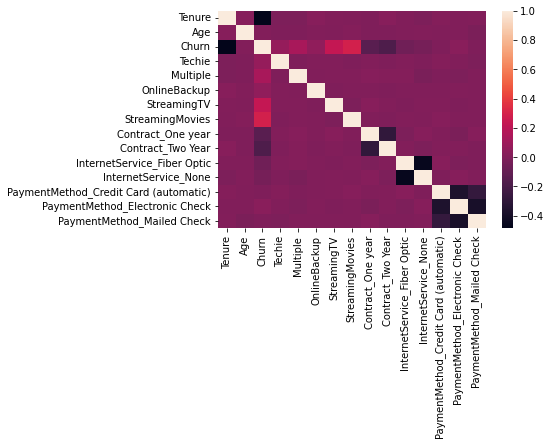

In [459]:
sns.heatmap(X2.corr())

In [460]:
# Looking for high correlation to Tenure--well above 0.75
matrix = X2.corr()
print(matrix)

                                         Tenure       Age     Churn    Techie  \
Tenure                                 1.000000  0.016979 -0.485475 -0.010041   
Age                                    0.016979  1.000000  0.005630 -0.007531   
Churn                                 -0.485475  0.005630  1.000000  0.066722   
Techie                                -0.010041 -0.007531  0.066722  1.000000   
Multiple                              -0.010422 -0.004674  0.131771 -0.004661   
OnlineBackup                           0.020802  0.003309  0.050508  0.004540   
StreamingTV                            0.002440 -0.000197  0.230151  0.003436   
StreamingMovies                       -0.002574  0.010125  0.289262 -0.004298   
Contract_One year                     -0.006127 -0.005215 -0.139043  0.005302   
Contract_Two Year                      0.019495 -0.007326 -0.178337 -0.006235   
InternetService_Fiber Optic           -0.003820  0.001240 -0.058472  0.002100   
InternetService_None        

In [461]:
# Checking for correlations above 0.75
matrix = X2.corr()
matrix = matrix.unstack()
matrix = matrix[abs(matrix) >= 0.1]
print(matrix)

Tenure                                 Tenure                                   1.000000
                                       Churn                                   -0.485475
Age                                    Age                                      1.000000
Churn                                  Tenure                                  -0.485475
                                       Churn                                    1.000000
                                       Multiple                                 0.131771
                                       StreamingTV                              0.230151
                                       StreamingMovies                          0.289262
                                       Contract_One year                       -0.139043
                                       Contract_Two Year                       -0.178337
Techie                                 Techie                                   1.000000
Multiple             

In [462]:
print(predictions)

0       39.120806
1       19.060597
2       46.820882
3       41.146291
4        5.726518
          ...    
9995    45.698887
9996    42.291095
9997    40.550026
9998    48.542191
9999    51.544294
Length: 10000, dtype: float64


In [463]:
# Final reduced model
X = complete_df[['Age', 'Churn', 'Techie', 
                   'Multiple', 'OnlineBackup', 'StreamingTV', 
                   'StreamingMovies', 'Contract_One year', 
                   'Contract_Two Year', 'InternetService_Fiber Optic', 
                   'InternetService_None', 
                   'PaymentMethod_Credit Card (automatic)', 
                   'PaymentMethod_Electronic Check', 
                   'PaymentMethod_Mailed Check']]

In [464]:
X.shape

(10000, 14)

In [465]:
# Fit the model
regr.fit(X, y)

LinearRegression()

In [466]:
# Re-run after reduction
print('Y-Intercept: \n', regr.intercept_)
print('X-Coefficients: \n', regr.coef_)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

Y-Intercept: 
 36.47815663956179
X-Coefficients: 
 [ 2.33139554e-02 -3.83081342e+01  2.31756400e+00  4.02333963e+00
  2.82549115e+00  8.19135785e+00  9.62486762e+00 -8.99425162e+00
 -8.28596817e+00 -3.89603100e+00 -4.25561542e+00  1.49722455e+00
  1.83567906e+00  1.32611047e+00]
                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     320.6
Date:                Mon, 05 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:46:10   Log-Likelihood:                -45083.
No. Observations:               10000   AIC:                         9.020e+04
Df Residuals:                    9985   BIC:                         9.030e+04
Df Model:                          14                                         
Covarianc

In [467]:
# Checking the residuals
model.resid

0      -32.325293
1      -17.903916
2      -31.066738
3      -24.059064
4       -4.055546
          ...    
9995    22.498243
9996    18.749275
9997     6.866864
9998    22.553409
9999    11.806566
Length: 10000, dtype: float64

In [468]:
# Checking sum of residuals
model.resid.sum()

1.7920683603733778e-08

In [469]:
# Checking mean of residuals
model.resid.mean()

1.7954008058040928e-12

In [470]:
# Sorting residuals out of curiosity
model.resid.sort_values()

3203   -51.852704
4791   -51.434613
3999   -50.671324
2821   -48.748305
1541   -48.580714
          ...    
8174    53.991997
7958    55.076908
7444    55.841208
9549    57.074244
6357    59.849680
Length: 10000, dtype: float64

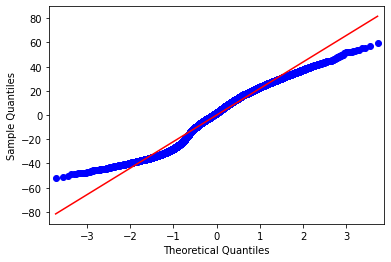

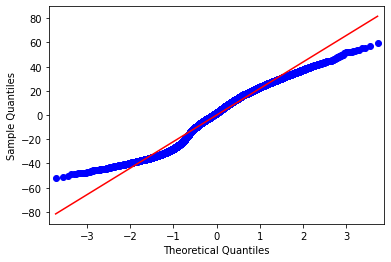

In [471]:
sm.qqplot(model.resid, line='s')

In [472]:
plot = pd.DataFrame()
plot['predicted'] = model.predict(X)
plot['residuals'] = model.resid

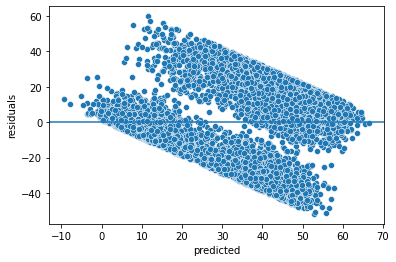

In [473]:
sns.scatterplot(data=plot, x='predicted', y='residuals')
plt.axhline(y=0)

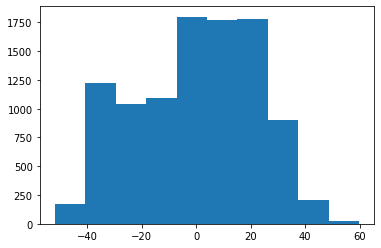

In [474]:
plt.hist(plot['residuals'])
plt.show()

In [475]:
print(model.params)

const                                    36.478157
Age                                       0.023314
Churn                                   -38.308134
Techie                                    2.317564
Multiple                                  4.023340
OnlineBackup                              2.825491
StreamingTV                               8.191358
StreamingMovies                           9.624868
Contract_One year                        -8.994252
Contract_Two Year                        -8.285968
InternetService_Fiber Optic              -3.896031
InternetService_None                     -4.255615
PaymentMethod_Credit Card (automatic)     1.497225
PaymentMethod_Electronic Check            1.835679
PaymentMethod_Mailed Check                1.326110
dtype: float64


In [476]:
# R-squared value
print(model.rsquared)

0.31008544108567604


In [477]:
# Residual calculation
model.resid.std(ddof=X.shape[1])

21.97928994062106

In [478]:
# Residual calculation
print(np.sqrt(model.mse_resid))

21.979289940621097


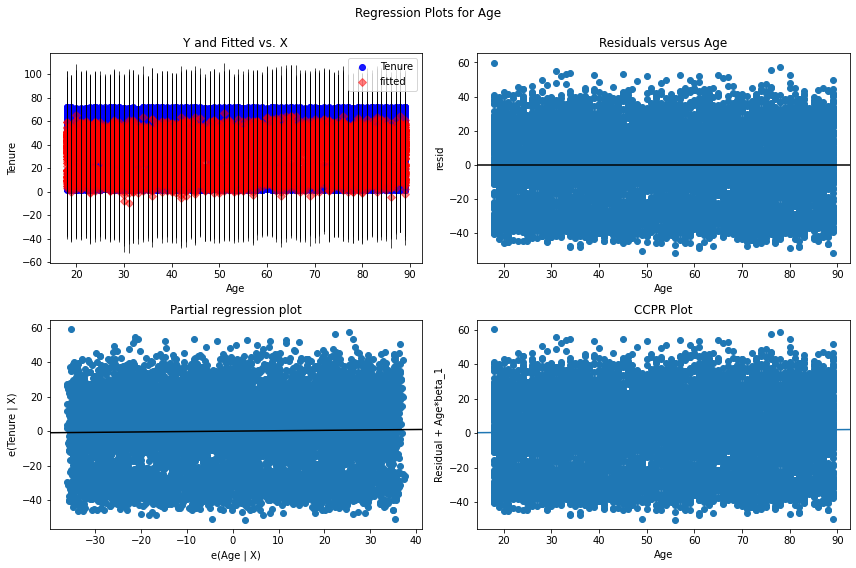

In [479]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'Age', fig=fig)

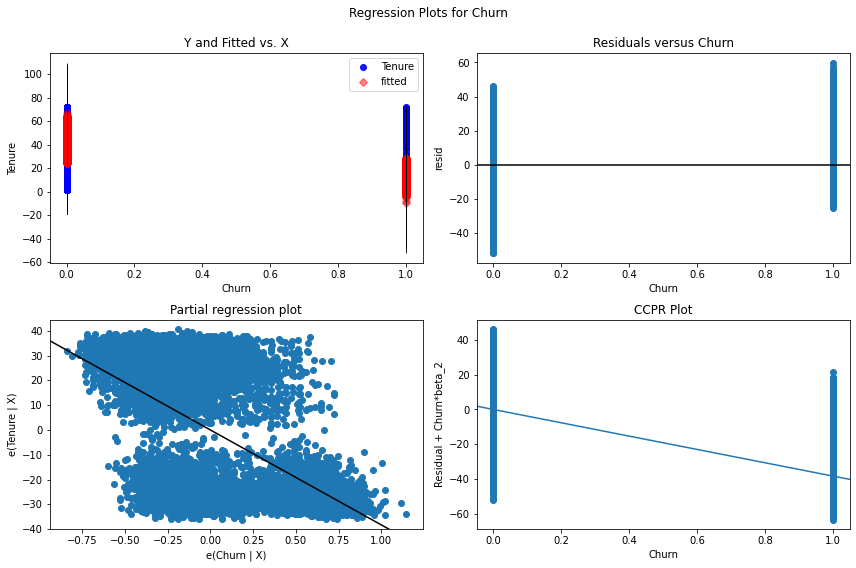

In [480]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'Churn', fig=fig)

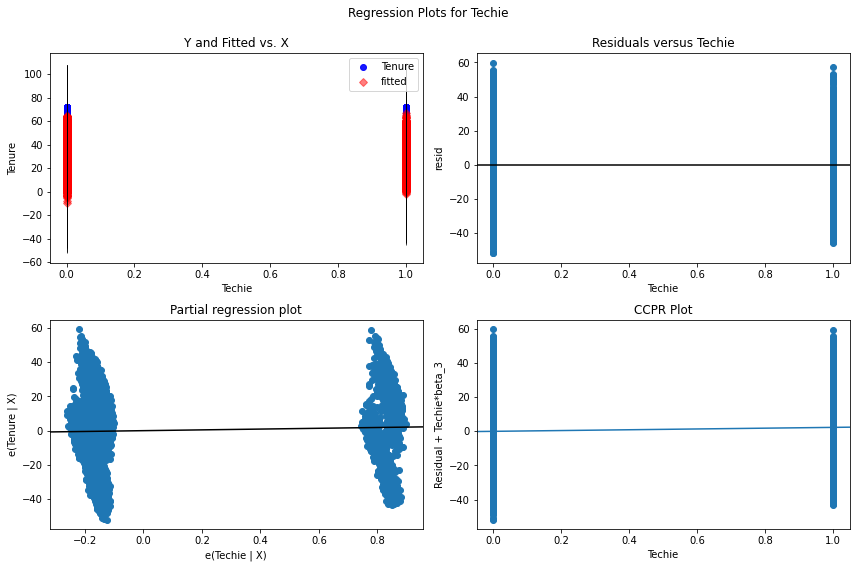

In [481]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'Techie', fig=fig)

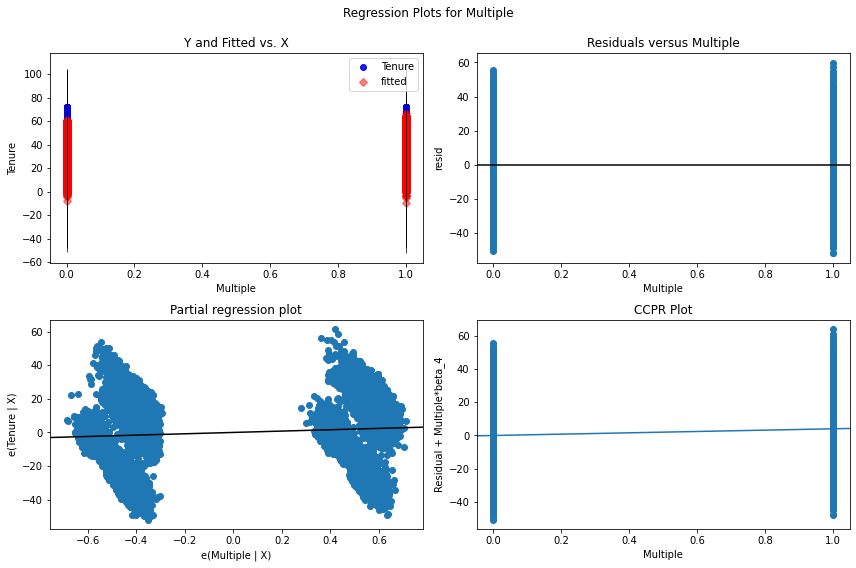

In [482]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'Multiple', fig=fig)

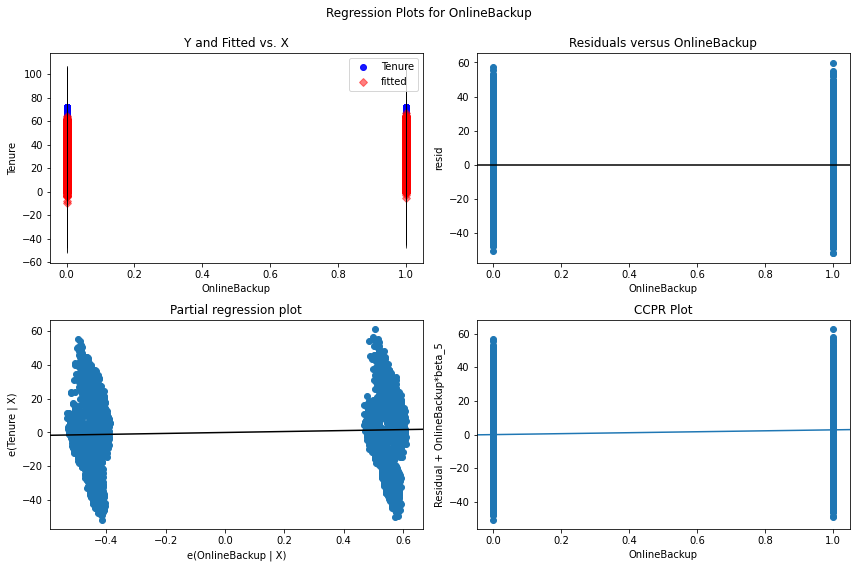

In [483]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'OnlineBackup', fig=fig)

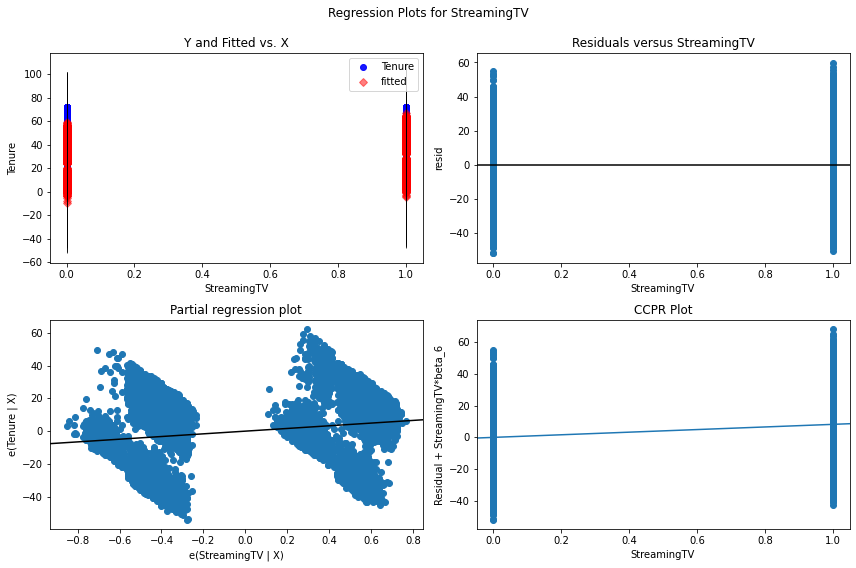

In [484]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'StreamingTV', fig=fig)

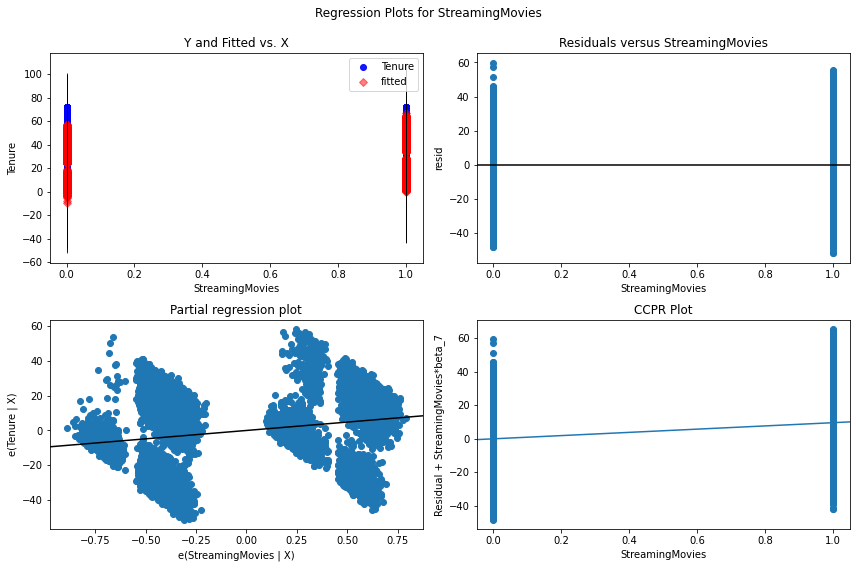

In [485]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'StreamingMovies', fig=fig)

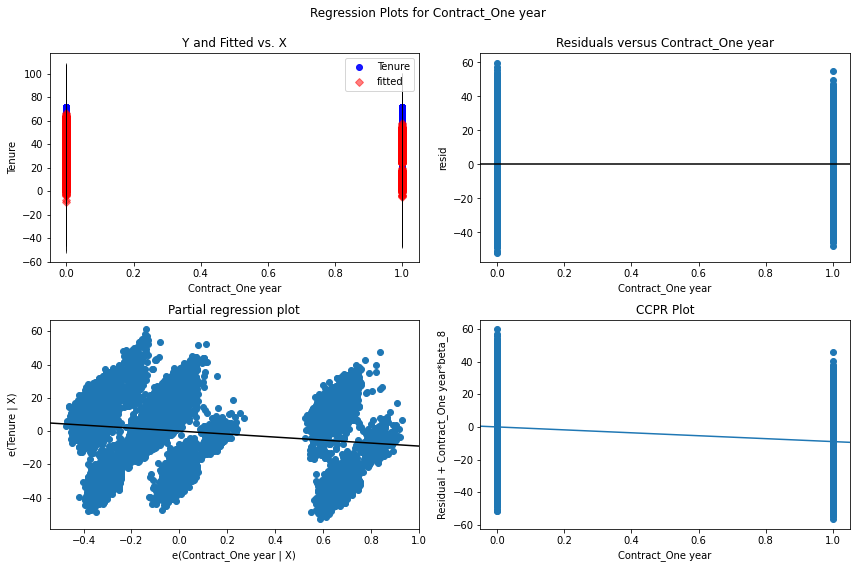

In [486]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'Contract_One year', fig=fig)

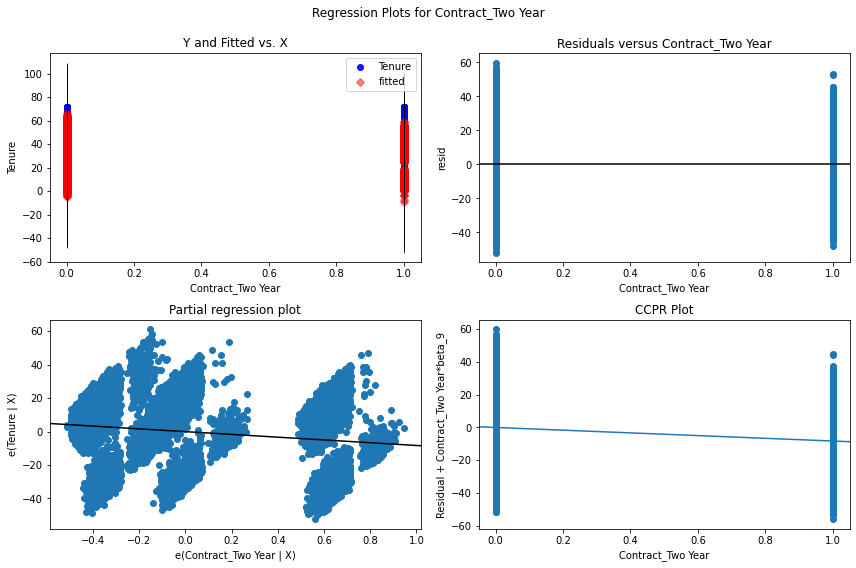

In [487]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'Contract_Two Year', fig=fig)

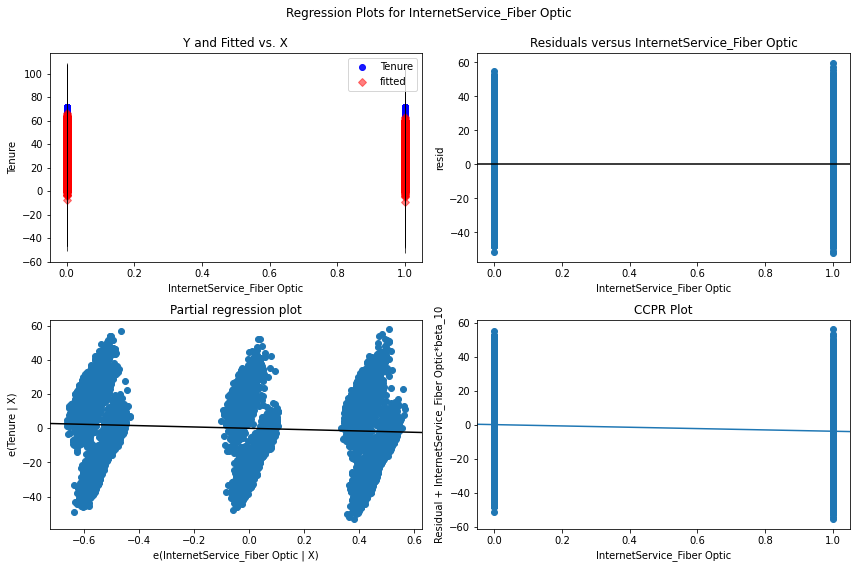

In [488]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'InternetService_Fiber Optic', fig=fig)

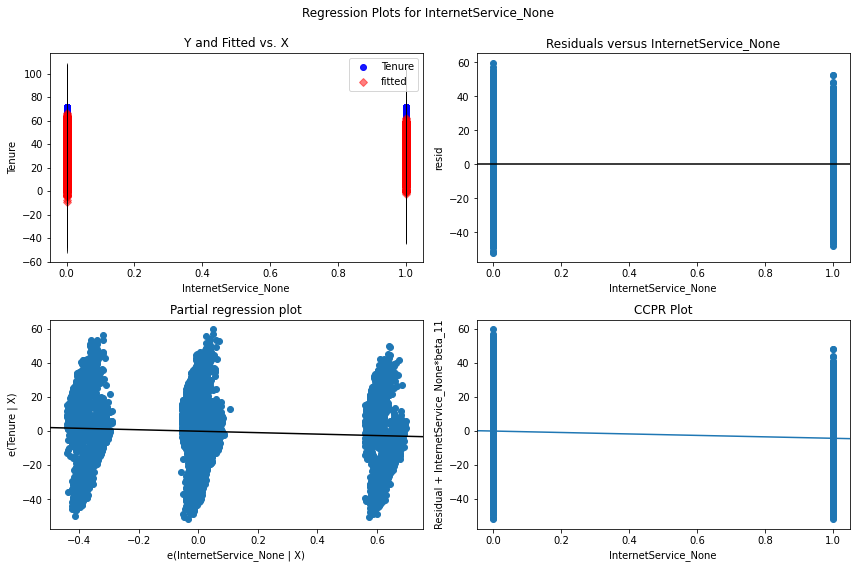

In [489]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'InternetService_None', fig=fig)

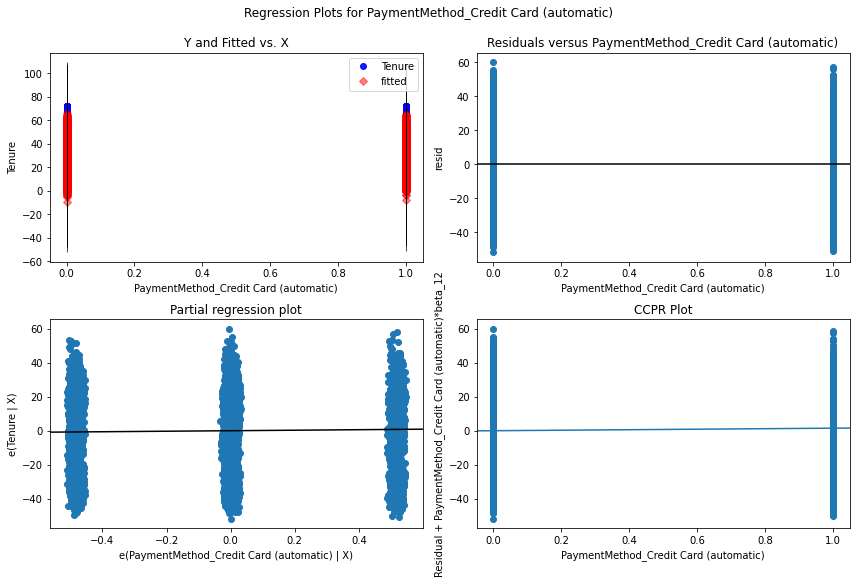

In [490]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'PaymentMethod_Credit Card (automatic)', fig=fig)

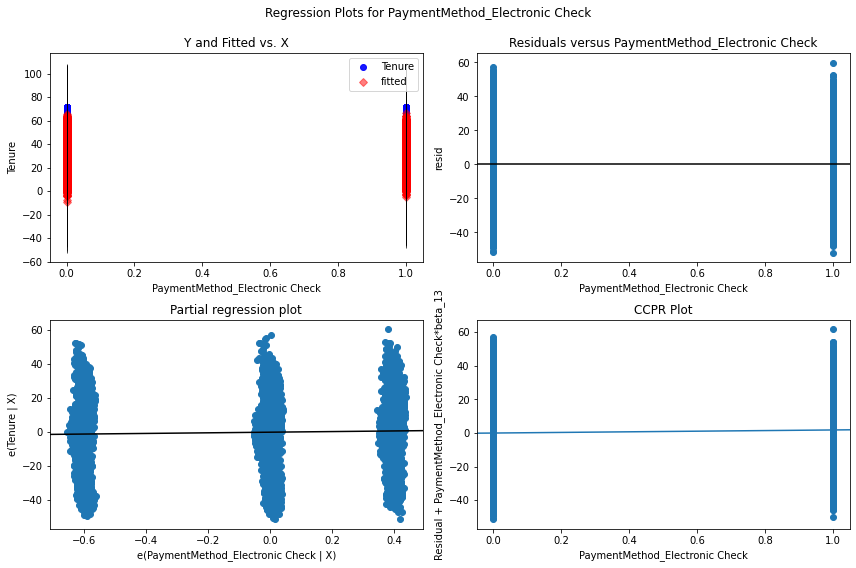

In [491]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'PaymentMethod_Electronic Check', fig=fig)

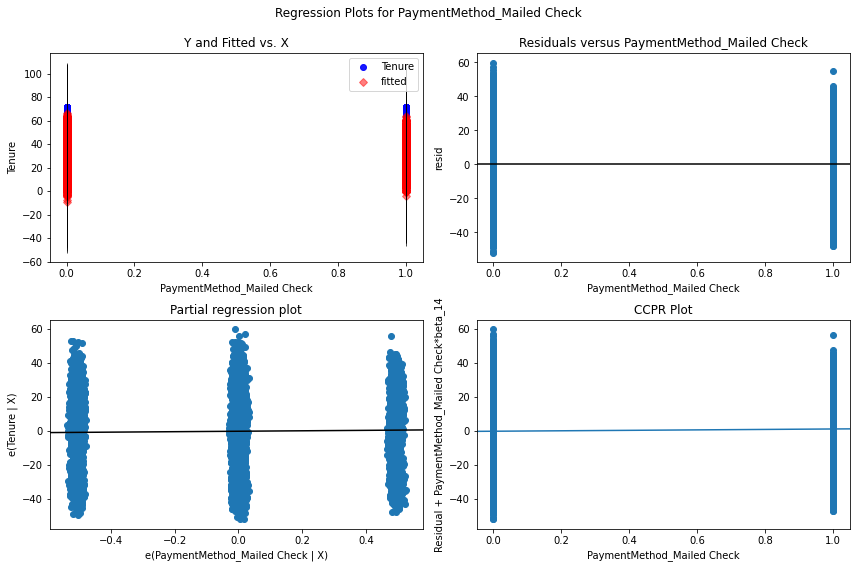

In [492]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'PaymentMethod_Mailed Check', fig=fig)

In [493]:
print(model.params)

const                                    36.478157
Age                                       0.023314
Churn                                   -38.308134
Techie                                    2.317564
Multiple                                  4.023340
OnlineBackup                              2.825491
StreamingTV                               8.191358
StreamingMovies                           9.624868
Contract_One year                        -8.994252
Contract_Two Year                        -8.285968
InternetService_Fiber Optic              -3.896031
InternetService_None                     -4.255615
PaymentMethod_Credit Card (automatic)     1.497225
PaymentMethod_Electronic Check            1.835679
PaymentMethod_Mailed Check                1.326110
dtype: float64


In [494]:
print(model.fittedvalues)

0       39.120806
1       19.060597
2       46.820882
3       41.146291
4        5.726518
          ...    
9995    45.698887
9996    42.291095
9997    40.550026
9998    48.542191
9999    51.544294
Length: 10000, dtype: float64


In [495]:
print(model.resid)

0      -32.325293
1      -17.903916
2      -31.066738
3      -24.059064
4       -4.055546
          ...    
9995    22.498243
9996    18.749275
9997     6.866864
9998    22.553409
9999    11.806566
Length: 10000, dtype: float64


In [496]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     320.6
Date:                Mon, 05 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:46:43   Log-Likelihood:                -45083.
No. Observations:               10000   AIC:                         9.020e+04
Df Residuals:                    9985   BIC:                         9.030e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [497]:
model.predict()

array([39.1208063 , 19.0605973 , 46.82088204, ..., 40.55002629,
       48.54219138, 51.54429386])

In [498]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)

In [499]:
model = LinearRegression()

In [500]:
model.fit(x_train, y_train)

LinearRegression()

In [501]:
print(model.coef_)

[ 0.00000000e+00  1.92050500e-02 -3.80260780e+01  2.28430395e+00
  4.00974609e+00  2.47856468e+00  8.19788044e+00  9.56246380e+00
 -9.42909180e+00 -8.25397659e+00 -3.68193369e+00 -4.46901946e+00
  2.20654838e+00  1.75850544e+00  1.96285569e+00]


In [502]:
print(model.intercept_)

36.38024688270232


In [503]:
predictions = model.predict(x_test)

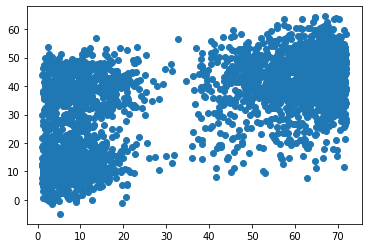

In [504]:
plt.scatter(y_test, predictions)

(array([ 61., 347., 285., 381., 512., 537., 527., 264.,  77.,   9.]),
 array([-51.23961827, -40.11999972, -29.00038117, -17.88076262,
         -6.76114408,   4.35847447,  15.47809302,  26.59771157,
         37.71733012,  48.83694867,  59.95656721]),
 <BarContainer object of 10 artists>)

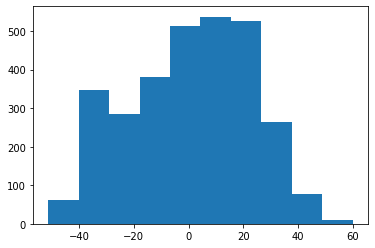

In [505]:
plt.hist(y_test - predictions)

In [506]:
metrics.mean_absolute_error(y_test, predictions)

18.419478022036703

In [507]:
metrics.mean_squared_error(y_test, predictions)

481.9693544735736

In [508]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

21.953800456266645

In [509]:
print(predictions)

[45.74782534 40.62279378 38.35969359 ... 15.29839381 37.20890958
 43.59574652]


(array([ 31., 180., 347., 237., 190., 391., 710., 620., 245.,  49.]),
 array([-4.90734181,  2.03594184,  8.97922549, 15.92250914, 22.86579279,
        29.80907644, 36.75236009, 43.69564374, 50.63892739, 57.58221104,
        64.52549469]),
 <BarContainer object of 10 artists>)

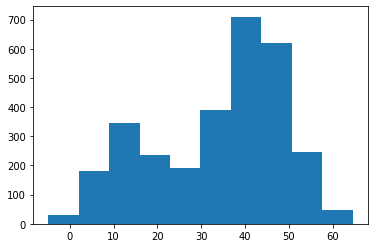

In [510]:
plt.hist(predictions)